# 1. Selección del dataset

# Para el trabajo decidimos identificar los portafolios de grandes inversores que identificamos en CoinMarketCap

Para ello haremos Web scraping en donde se logrará:


*   Inspeccionar cada url que te redireccione a los Portfolios
*   Resumir los portafolios y sus ganancias o pérdidas
*   Determinar que tokens tienen cada portafolio




### 1.1. Inspección de una url de uno de los portafolios

In [3]:
import sys
print(sys.executable)


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\python.exe


In [2]:
import sys
!{sys.executable} -m pip install beautifulsoup4 requests
!{sys.executable} -m pip install selenium
!{sys.executable} -m pip install webdriver-manager
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from bs4 import BeautifulSoup
import requests

url = "https://coinmarketcap.com/es/view/defiance-capital-portfolio/"

headers = {
    "User-Agent": "Mozilla/5.0" #para evitar bloqueo
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

page_title = soup.title.string

#resumen del contenido
all_text_snippet = soup.get_text(separator="\n").strip().split("\n")[0:40]

(page_title, all_text_snippet)

('Principales Tokens DeFiance Capital Portfolio por Capitalización de Mercado | CoinMarketCap',
 ['Principales Tokens DeFiance Capital Portfolio por Capitalización de Mercado | CoinMarketCap',
  'Criptomonedas',
  'Criptomonedas',
  'Ranking',
  'Categorías',
  'Imágenes antiguas',
  'Token Unlocks',
  'Rendimientos',
  'Tablas de clasificación',
  'Titulares',
  'Próximos',
  'Añadidos recientemente',
  'Ganadores y perdedores',
  'Más visitados',
  'Sentimiento de la comunidad',
  'Clasificación de cadenas',
  'Visión general del mercado',
  'Visión general del mercado',
  'Índice CoinMarketCap 100',
  'Índice de Miedo y Codicia.',
  'Índice de temporada de Altcoins',
  'Dominio de Bitcoin',
  'ETF de criptomonedas',
  'NFT',
  'Estadísticas generales de NFT',
  'Próximas ventas',
  'DexScan',
  'Signals',
  'New',
  'Nuevos pares',
  'Trending Pairs',
  'Explorador de memes',
  'Ganadores y perdedores',
  'Votos de la comunidad',
  'Los mejores traders',
  'Exchanges',
  'Exchanges 

A primera instancia se esta viendo en texto visible del html pero no se esta viendo lo que hay en las tablas que es info dinámica.

Ahora se tratará de usar Selenium para visibilizar las tablas

In [49]:
#config
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = Options()
options.add_argument("--start-maximized")
# options.add_argument("--headless")
service = Service("C:/Users/marsi/Downloads/chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)


In [50]:
#para acceder a la pagina
url = "https://coinmarketcap.com/es/view/defiance-capital-portfolio/"
driver.get(url)
wait = WebDriverWait(driver, 15)


In [ ]:
#extraer datos basicos
from selenium.webdriver.support import expected_conditions as EC

info_boxes = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "sc-71024e3e-0")))

print(f"Elementos encontrados: {len(info_boxes)}")
for i, box in enumerate(info_boxes):
    print(f"\nBox {i}:\n{box.text}")


🔍 Elementos encontrados: 70

Box 0:
Capitalización de mercado

Box 1:
$8,919,469,648

Box 2:
3.26%

Box 3:
3.26%

Box 4:
Volumen de Comercio

Box 5:
$757,834,349

Box 6:
27.03%

Box 7:
27.03%

Box 8:
Nombre

Box 9:
Alertas

Box 10:
Porcentaje en 1h

Box 11:
24 h %

Box 12:
7 d %

Box 13:
Capitalización de mercado

Box 14:
Volumen (24h)

Box 15:
Suministro circulante

Box 16:
Últimos 7 días

Box 17:
29

Box 18:
$4,403,040,265

Box 19:
$329,402,394

Box 20:
47.27M UNI

Box 21:
33

Box 22:
$3,355,658,100

Box 23:
$262,808,686

Box 24:
1.18M AAVE

Box 25:
123

Box 26:
$508,390,149

Box 27:
$38,759,475

Box 28:
12.29M AXS

Box 29:
170

Box 30:
$296,875,537

Box 31:
$33,667,595

Box 32:
38.60M SNX

Box 33:
229

Box 34:
$222,931,122

Box 35:
$50,853,529

Box 36:
61.68M SUSHI

Box 37:
416

Box 38:
$89,483,589

Box 39:
$17,371,108

Box 40:
101.68M BB

Box 41:
614

Box 42:
$43,762,250

Box 43:
$11,075,267

Box 44:
183.65M DODO

Box 45:
768

Box 46:
$28,350,971

Box 47:
$12,470,883

Box 48:
405.5

In [86]:
def extract_trend_percent(container):
    try:
        span = container.find_element(By.TAG_NAME, "span")
        percent_text = span.text.strip().replace("%", "")
        color = span.get_attribute("color")
        value = float(percent_text.replace(",", "."))
        return -abs(value) if color == "red" else abs(value)
    except:
        return None
    
def extract_percent(col):
    try:
        spans = col.find_elements(By.TAG_NAME, "span")
        raw = None
        direction = "up"

        for span in spans:
            cls = span.get_attribute("class")
            txt = span.text.strip()
            if "icon-Caret-down" in cls:
                direction = "down"
            if "%" in txt:
                raw = txt.replace("%", "").replace(",", ".").strip()

        if raw in ["", "--", None]:
            return None

        value = float(raw)
        return -abs(value) if direction == "down" else abs(value)

    except:
        return None


In [ ]:
from datetime import datetime

#nombre de portafolio
portfolio_name = wait.until(EC.presence_of_element_located((By.TAG_NAME, "h1"))).text

#contenedores basicos
containers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "sc-71024e3e-0")))

market_cap = containers[1].text.split('\n')[-1]
market_cap_change_val = extract_trend_percent(containers[2])
market_cap_trend = "ganancia" if market_cap_change_val > 0 else "pérdida"

volume = containers[5].text.split('\n')[-1]
volume_change_val = extract_trend_percent(containers[6])
volume_trend = "ganancia" if volume_change_val > 0 else "pérdida"

stats = {
    "1h": {"ganadores": 0, "perdedores": 0, "neutros": 0},
    "24h": {"ganadores": 0, "perdedores": 0, "neutros": 0},
    "7d": {"ganadores": 0, "perdedores": 0, "neutros": 0},
}
total_tokens = 0

#tabla de tokens
table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "tbody")))
rows = table.find_elements(By.TAG_NAME, "tr")

for row in rows:
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) >= 7:
        total_tokens += 1

        for key, col in zip(["1h", "24h", "7d"], [cols[4], cols[5], cols[6]]):
            val = extract_percent(col)
            if val is None or val == 0:
                stats[key]["neutros"] += 1
            elif val > 0:
                stats[key]["ganadores"] += 1
            else:
                stats[key]["perdedores"] += 1


fecha = datetime.today().strftime("%d/%m/%Y")

print("Fecha:", fecha)
print("Portafolio:", portfolio_name)
print("Capitalización de mercado:", market_cap)
print("Variación capitalización:", f"{market_cap_change_val}% ({market_cap_trend})")
print("Volumen de Comercio:", volume)
print("Variación volumen:", f"{volume_change_val}% ({volume_trend})")
print("Total de tokens analizados:", total_tokens)

print("Tokens en 1h:")
print("  Ganadores:", stats["1h"]["ganadores"])
print("  Perdedores:", stats["1h"]["perdedores"])
print("  Neutros o sin datos:", stats["1h"]["neutros"])

print("Tokens en 24h:")
print("  Ganadores:", stats["24h"]["ganadores"])
print("  Perdedores:", stats["24h"]["perdedores"])
print("  Neutros o sin datos:", stats["24h"]["neutros"])

print("Tokens en 7d:")
print("  Ganadores:", stats["7d"]["ganadores"])
print("  Perdedores:", stats["7d"]["perdedores"])
print("  Neutros o sin datos:", stats["7d"]["neutros"])


Fecha: 11/05/2025
Portafolio: Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado
Capitalización de mercado: $7,912,220,743
Variación capitalización: -5.13% (pérdida)
Volumen de Comercio: $536,235,661
Variación volumen: -27.91% (pérdida)
Total de tokens analizados: 13
Tokens en 1h:
  Ganadores: 5
  Perdedores: 3
  Neutros o sin datos: 5
Tokens en 24h:
  Ganadores: 3
  Perdedores: 6
  Neutros o sin datos: 4
Tokens en 7d:
  Ganadores: 10
  Perdedores: 0
  Neutros o sin datos: 3


Extraer datos de la tabla

In [68]:
import sys
import pandas as pd

pd.set_option('display.max_rows', 500)       
pd.set_option('display.max_columns', 20)     
pd.set_option('display.max_colwidth', None)  

In [ ]:
table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "tbody")))
rows = table.find_elements(By.TAG_NAME, "tr")

for row in rows:
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) >= 11:
        name = cols[2].text.split("\n")[0]
        symbol = cols[2].text.split("\n")[1]
        price = cols[3].text

        change_1h = extract_percent(cols[4])
        change_24h = extract_percent(cols[5])
        change_7d = extract_percent(cols[6])

        market_cap = cols[7].text

        volume_lines = cols[8].text.split("\n")
        volume_usd = volume_lines[0]
        volume_tokens = volume_lines[1] if len(volume_lines) > 1 else None

        circulating_supply = cols[9].text

        try:
            graph_img = cols[10].find_element(By.TAG_NAME, "img")
            trend_class = graph_img.get_attribute("class")
            trend_7d = "positivo" if "isUp" in trend_class else "negativo"
        except:
            trend_7d = "desconocido"

        print(f"🔸 {name} ({symbol}) - Precio: {price}")
        print(f"   1h: {change_1h}%, 24h: {change_24h}%, 7d: {change_7d}% → tendencia: {trend_7d}")
        print(f"   MC: {market_cap}")
        print(f"   Volumen: {volume_usd} | Tokens movidos: {volume_tokens}")
        print(f"   Suministro circulante: {circulating_supply}\n")


🔸 Uniswap (UNI) - Precio: 6,91 US$
   1h: -0.96%, 24h: -4.78%, 7d: 38.86% → tendencia: positivo
   MC: $4,349,520,062
   Volumen: $328,201,489 | Tokens movidos: 47.10M UNI
   Suministro circulante: 628.68M UNI

🔸 Aave (AAVE) - Precio: 219,26 US$
   1h: -1.5%, 24h: -2.56%, 7d: 28.21% → tendencia: positivo
   MC: $3,314,115,964
   Volumen: $259,511,755 | Tokens movidos: 1.17M AAVE
   Suministro circulante: 15.11M AAVE

🔸 Axie Infinity (AXS) - Precio: 3,11 US$
   1h: -1.3%, 24h: -1.01%, 7d: 34.72% → tendencia: positivo
   MC: $502,867,661
   Volumen: $39,162,046 | Tokens movidos: 12.41M AXS
   Suministro circulante: 161.3M AXS

🔸 Synthetix (SNX) - Precio: 0,8662 US$
   1h: -0.73%, 24h: -0.49%, 7d: 32.3% → tendencia: positivo
   MC: $294,068,635
   Volumen: $30,839,261 | Tokens movidos: 35.36M SNX
   Suministro circulante: 339.46M SNX

🔸 SushiSwap (SUSHI) - Precio: 0,8193 US$
   1h: -0.52%, 24h: -3.87%, 7d: 35.24% → tendencia: positivo
   MC: $220,161,990
   Volumen: $50,360,383 | Tokens m

In [78]:
driver.quit()

### 1.2. Dataframe de la información general de todos los portafolios

In [103]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import pandas as pd
import time

def extract_trend_percent(container):
    try:
        span = container.find_element(By.TAG_NAME, "span")
        percent_text = span.text.strip().replace("%", "")
        color = span.get_attribute("color")
        value = float(percent_text.replace(",", "."))
        return -abs(value) if color == "red" else abs(value)
    except:
        return None

def extract_percent(col):
    try:
        spans = col.find_elements(By.TAG_NAME, "span")
        raw = None
        direction = "up"

        for span in spans:
            cls = span.get_attribute("class")
            txt = span.text.strip()
            if "icon-Caret-down" in cls:
                direction = "down"
            if "%" in txt:
                raw = txt.replace("%", "").replace(",", ".").strip()

        if raw in ["", "--", None]:
            return None

        value = float(raw)
        return -abs(value) if direction == "down" else abs(value)

    except:
        return None

#son las url que contienen portfolio
urls = [
    "https://coinmarketcap.com/es/view/exnetwork-capital-portfolio/",
    "https://coinmarketcap.com/es/view/cms-holdings-portfolio/",
    "https://coinmarketcap.com/es/view/galaxy-digital-portfolio/",
    "https://coinmarketcap.com/es/view/okx-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/framework-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/alameda-research-portfolio/",
    "https://coinmarketcap.com/es/view/kenetic-capital-portfolio/",
    "https://coinmarketcap.com/es/view/hashkey-capital-portfolio/",
    "https://coinmarketcap.com/es/view/petrock-capital-portfolio/",
    "https://coinmarketcap.com/es/view/binance-labs-portfolio/",
    "https://coinmarketcap.com/es/view/ledgerprime-portfolio/",
    "https://coinmarketcap.com/es/view/pantera-capital-portfolio/",
    "https://coinmarketcap.com/es/view/1confirmation-portfolio/",
    "https://coinmarketcap.com/es/view/polygon-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/defiance-capital-portfolio/",
    "https://coinmarketcap.com/es/view/polychain-capital-portfolio/",
    "https://coinmarketcap.com/es/view/animoca-brands-portfolio/",
    "https://coinmarketcap.com/es/view/fenbushi-capital-portfolio/",
    "https://coinmarketcap.com/es/view/dwf-labs-portfolio/",
    "https://coinmarketcap.com/es/view/egirl-capital-portfolio/",
    "https://coinmarketcap.com/es/view/coinbase-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/electric-capital-portfolio/",
    "https://coinmarketcap.com/es/view/dragonfly-capital-portfolio/",
    "https://coinmarketcap.com/es/view/three-arrows-capital-portfolio/",
    "https://coinmarketcap.com/es/view/standard-crypto-portfolio/",
    "https://coinmarketcap.com/es/view/multicoin-capital-portfolio/",
    "https://coinmarketcap.com/es/view/coinfund-portfolio/",
    "https://coinmarketcap.com/es/view/winklevoss-capital-portfolio/",
    "https://coinmarketcap.com/es/view/huobi-capital-portfolio/",
    "https://coinmarketcap.com/es/view/vbc-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/paradigm-portfolio/",
    "https://coinmarketcap.com/es/view/blockchain-capital-portfolio/",
    "https://coinmarketcap.com/es/view/world-liberty-financial-portfolio/",
    "https://coinmarketcap.com/es/view/placeholder-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/a16z-portfolio/",
    "https://coinmarketcap.com/es/view/arrington-xrp-capital-portfolio/",
    "https://coinmarketcap.com/es/view/boostvc-portfolio/",
    "https://coinmarketcap.com/es/view/fabric-ventures-portfolio/",
    "https://coinmarketcap.com/es/view/poolz-finance-portfolio/",
    "https://coinmarketcap.com/es/view/dcg-portfolio/",
    "https://coinmarketcap.com/es/view/usv-portfolio/",
    "https://coinmarketcap.com/es/view/circle-ventures-portfolio/"
]

options = Options()
options.add_argument("--start-maximized")
# options.add_argument("--headless")
service = Service("C:/Users/marsi/Downloads/chromedriver-win64/chromedriver.exe")
driver = webdriver.Chrome(service=service, options=options)
data = []
token_info = []


In [98]:
from datetime import datetime
import pandas as pd

#recolectar datos de cada portafolio
for url in urls:
    try:
        driver.get(url)
        wait = WebDriverWait(driver, 15)
        portfolio_name = wait.until(EC.presence_of_element_located((By.TAG_NAME, "h1"))).text

        containers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "sc-71024e3e-0")))
        market_cap = containers[1].text.split('\n')[-1]
        market_cap_change_val = extract_trend_percent(containers[2])
        market_cap_trend = "ganancia" if market_cap_change_val and market_cap_change_val > 0 else "pérdida" if market_cap_change_val else "sin datos"

        volume = containers[5].text.split('\n')[-1]
        volume_change_val = extract_trend_percent(containers[6])
        volume_trend = "ganancia" if volume_change_val and volume_change_val > 0 else "pérdida" if volume_change_val else "sin datos"

        stats = {
            "1h": {"ganadores": 0, "perdedores": 0, "neutros": 0},
            "24h": {"ganadores": 0, "perdedores": 0, "neutros": 0},
            "7d": {"ganadores": 0, "perdedores": 0, "neutros": 0},
        }
        total_tokens = 0

        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "tbody")))
        rows = table.find_elements(By.TAG_NAME, "tr")

        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 7:
                total_tokens += 1
                for key, col in zip(["1h", "24h", "7d"], [cols[4], cols[5], cols[6]]):
                    val = extract_percent(col)
                    if val is None or val == 0:
                        stats[key]["neutros"] += 1
                    elif val > 0:
                        stats[key]["ganadores"] += 1
                    else:
                        stats[key]["perdedores"] += 1

        fecha_hora = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

        data.append({
            "fecha_hora": fecha_hora,
            "portafolio": portfolio_name,
            "market_cap": market_cap,
            "market_cap_change": market_cap_change_val,
            "market_cap_trend": market_cap_trend,
            "volume": volume,
            "volume_change": volume_change_val,
            "volume_trend": volume_trend,
            "tokens_totales": total_tokens,
            "1h_ganadores": stats["1h"]["ganadores"],
            "1h_perdedores": stats["1h"]["perdedores"],
            "1h_neutros": stats["1h"]["neutros"],
            "24h_ganadores": stats["24h"]["ganadores"],
            "24h_perdedores": stats["24h"]["perdedores"],
            "24h_neutros": stats["24h"]["neutros"],
            "7d_ganadores": stats["7d"]["ganadores"],
            "7d_perdedores": stats["7d"]["perdedores"],
            "7d_neutros": stats["7d"]["neutros"]
        })

    except Exception as e:
        print(f"Error en {url}: {e}")
        continue

df = pd.DataFrame(data)
df


fecha_hora  \
0   11/05/2025 22:46:09   
1   11/05/2025 22:46:13   
2   11/05/2025 22:46:16   
3   11/05/2025 22:46:21   
4   11/05/2025 22:46:24   
5   11/05/2025 22:46:28   
6   11/05/2025 22:46:31   
7   11/05/2025 22:46:35   
8   11/05/2025 22:46:39   
9   11/05/2025 22:46:43   
10  11/05/2025 22:46:47   
11  11/05/2025 22:46:51   
12  11/05/2025 22:46:55   
13  11/05/2025 22:46:58   
14  11/05/2025 22:47:01   
15  11/05/2025 22:47:05   
16  11/05/2025 22:47:09   
17  11/05/2025 22:47:13   
18  11/05/2025 22:47:19   
19  11/05/2025 22:47:23   
20  11/05/2025 22:47:27   
21  11/05/2025 22:47:32   
22  11/05/2025 22:47:36   
23  11/05/2025 22:47:40   
24  11/05/2025 22:47:44   
25  11/05/2025 22:47:48   
26  11/05/2025 22:47:52   
27  11/05/2025 22:47:55   
28  11/05/2025 22:47:59   
29  11/05/2025 22:48:03   
30  11/05/2025 22:48:07   
31  11/05/2025 22:48:12   
32  11/05/2025 22:48:15   
33  11/05/2025 22:48:18   
34  11/05/2025 22:48:22   
35  11/05/2025 22:48:25   
36  11/05/2025 22:48:28   
37  11/05/2025 22:48:30   
38  11/05/2025 22:48:33   
39  11/05/2025 22:48:37   
40  11/05/2025 22:48:38   
41  11/05/2025 22:48:40   

                                                                            portafolio  \
0         Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
1              Principales Tokens CMS Holdings Portfolio por Capitalización de Mercado   
2            Principales Tokens Galaxy Digital Portfolio por Capitalización de Mercado   
3              Principales Tokens OKX Ventures Portfolio por Capitalización de Mercado   
4        Principales Tokens Framework Ventures Portfolio por Capitalización de Mercado   
5          Principales Tokens Alameda Research Portfolio por Capitalización de Mercado   
6           Principales Tokens Kenetic Capital Portfolio por Capitalización de Mercado   
7           Principales Tokens Hashkey Capital Portfolio por Capitalización de Mercado   
8           Principales Tokens PetRock Capital Portfolio por Capitalización de Mercado   
9                  Principales Tokens YZi Labs Portfolio por Capitalización de Mercado   
10              Principales Tokens LedgerPrime Portfolio por Capitalización de Mercado   
11          Principales Tokens Pantera Capital Portfolio por Capitalización de Mercado   
12            Principales Tokens 1Confirmation Portfolio por Capitalización de Mercado   
13         Principales Tokens Polygon Ventures Portfolio por Capitalización de Mercado   
14         Principales Tokens DeFiance Capital Portfolio por Capitalización de Mercado   
15        Principales Tokens Polychain Capital Portfolio por Capitalización de Mercado   
16           Principales Tokens Animoca Brands Portfolio por Capitalización de Mercado   
17         Principales Tokens Fenbushi Capital Portfolio por Capitalización de Mercado   
18                 Principales Tokens DWF Labs Portfolio por Capitalización de Mercado   
19            Principales Tokens eGirl Capital Portfolio por Capitalización de Mercado   
20        Principales Tokens Coinbase Ventures Portfolio por Capitalización de Mercado   
21         Principales Tokens Electric Capital Portfolio por Capitalización de Mercado   
22        Principales Tokens DragonFly Capital Portfolio por Capitalización de Mercado   
23     Principales Tokens Three Arrows Capital Portfolio por Capitalización de Mercado   
24          Principales Tokens Standard Crypto Portfolio por Capitalización de Mercado   
25        Principales Tokens Multicoin Capital Portfolio por Capitalización de Mercado   
26                 Principales Tokens Coinfund Portfolio por Capitalización de Mercado   
27       Principales Tokens Winklevoss Capital Portfolio por Capitalización de Mercado   
28            Principales Tokens Huobi Capital Portfolio por Capitalización de Mercado   
29             Principales Tokens VBC Ventures Portfolio por Capitalización de Mercado   
30                 Principales Tokens Paradigm Portfolio por 

In [99]:
df.to_csv("datos_portafolios.csv", index=False)

In [ ]:
# driver.quit()

### 1.3 Determinar los tokens de cada portafolio

In [105]:
for url in urls:
    try:
        driver.get(url)
        wait = WebDriverWait(driver, 15)
        portfolio_name = wait.until(EC.presence_of_element_located((By.TAG_NAME, "h1"))).text
        table = wait.until(EC.presence_of_element_located((By.TAG_NAME, "tbody")))
        rows = table.find_elements(By.TAG_NAME, "tr")
        for row in rows:
            cols = row.find_elements(By.TAG_NAME, "td")
            if len(cols) >= 11:
                name = cols[2].text.split("\n")[0]
                symbol = cols[2].text.split("\n")[1]
                price = cols[3].text
                change_1h = extract_percent(cols[4])
                change_24h = extract_percent(cols[5])
                change_7d = extract_percent(cols[6])
                market_cap = cols[7].text
                volume_lines = cols[8].text.split("\n")
                volume_usd = volume_lines[0]
                volume_tokens = volume_lines[1] if len(volume_lines) > 1 else None
                circulating_supply = cols[9].text
                try:
                    graph_img = cols[10].find_element(By.TAG_NAME, "img")
                    trend_class = graph_img.get_attribute("class")
                    trend_7d = "positivo" if "isUp" in trend_class else "negativo"
                except:
                    trend_7d = "desconocido"

                token_info.append({
                    "fecha": datetime.today().strftime("%d/%m/%Y"),
                    "hora": datetime.today().strftime("%H:%M:%S"),
                    "portafolio": portfolio_name,
                    "token": name,
                    "symbol": symbol,
                    "precio": price,
                    "1h": change_1h,
                    "24h": change_24h,
                    "7d": change_7d,
                    "tendencia_7d": trend_7d,
                    "market_cap": market_cap,
                    "volumen_usd": volume_usd,
                    "tokens_movidos": volume_tokens,
                    "suministro_circulante": circulating_supply
                })
    except Exception as e:
        print(f"Error en {url}: {e}")
        continue
    
df_tokens = pd.DataFrame(token_info)

df_tokens

fecha      hora  \
0    11/05/2025  22:58:29   
1    11/05/2025  22:58:29   
2    11/05/2025  22:58:29   
3    11/05/2025  22:58:29   
4    11/05/2025  22:58:29   
..          ...       ...   
749  11/05/2025  23:01:38   
750  11/05/2025  23:01:38   
751  11/05/2025  23:01:38   
752  11/05/2025  23:01:38   
753  11/05/2025  23:01:38   

                                                                       portafolio  \
0    Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
1    Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
2    Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
3    Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
4    Principales Tokens Exnetwork Capital Portfolio por Capitalización de Mercado   
..                                                                            ...   
749    Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
750    Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
751    Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
752    Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
753    Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   

                 token symbol         precio    1h   24h     7d tendencia_7d  \
0             Polkadot    DOT       5,13 US$  0.69 -0.58  28.98     positivo   
1    Internet Computer    ICP       5,78 US$ -0.13 -2.43  25.50     positivo   
2               Cosmos   ATOM       5,32 US$ -0.09 -0.37  28.04     positivo   
3             Algorand   ALGO     0,2416 US$ -0.06 -4.02  19.70     positivo   
4            THORChain   RUNE       1,78 US$  0.84  1.10  42.31     positivo   
..                 ...    ...            ...   ...   ...    ...          ...   
749      Ratio Finance  RATIO  0,0004029 US$ -0.06  5.40   0.21     positivo   
750       KaraStar UMY    UMY  0,0008700 US$  0.00 -1.01  12.18     positivo   
751              Maple    MPL             --   NaN   NaN    NaN  desconocido   
752         XY Finance     XY             --   NaN   NaN    NaN  desconocido   
753              Zebec    ZBC             --   NaN   NaN    NaN  desconocido   

         market_cap   volumen_usd tokens_movidos suministro_circulante  
0    $8,099,355,545  $267,722,087     52.10M DOT             1.57B DOT  
1    $3,084,681,241   $97,818,642     16.89M ICP            532.8M ICP  
2    $2,080,977,115  $117,742,582    22.11M ATOM          390.93M ATOM  
3    $2,077,641,492   $96,472,762   399.27M ALGO            8.59B ALGO  
4      $628,614,599  $214,510,329   119.96M RUNE          351.53M RUNE  
..              ...           ...            ...                   ...  
749            $847       $18,566   46.07M RATIO            2.1M RATIO  
750              --            --           None                    --  
751              --            --           None                    --  
752              --            --           None                    --  
753              --            --           None                    --  

[754 rows x 14 columns]

In [107]:
df_tokens.tail(15)

fecha      hora  \
739  11/05/2025  23:01:35   
740  11/05/2025  23:01:36   
741  11/05/2025  23:01:37   
742  11/05/2025  23:01:37   
743  11/05/2025  23:01:37   
744  11/05/2025  23:01:37   
745  11/05/2025  23:01:37   
746  11/05/2025  23:01:38   
747  11/05/2025  23:01:38   
748  11/05/2025  23:01:38   
749  11/05/2025  23:01:38   
750  11/05/2025  23:01:38   
751  11/05/2025  23:01:38   
752  11/05/2025  23:01:38   
753  11/05/2025  23:01:38   

                                                                     portafolio  \
739              Principales Tokens USV Portfolio por Capitalización de Mercado   
740              Principales Tokens USV Portfolio por Capitalización de Mercado   
741  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
742  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
743  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
744  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
745  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
746  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
747  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
748  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
749  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
750  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
751  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
752  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   
753  Principales Tokens Circle Ventures Portfolio por Capitalización de Mercado   

                 token symbol         precio    1h   24h     7d tendencia_7d  \
739             Helium    HNT       4,00 US$ -0.25 -3.26   5.59     positivo   
740          Numeraire    NMR       9,51 US$  0.42 -3.51  11.21     positivo   
741      NEAR Protocol   NEAR       3,18 US$ -0.02 -3.72  36.24     positivo   
742              Aptos    APT       5,95 US$  0.40 -3.63  15.42     positivo   
743      Maple Finance  SYRUP     0,2667 US$ -2.05 -5.33  55.42     positivo   
744  Maverick Protocol    MAV    0,07863 US$  0.94  0.75  42.60     positivo   
745               XION   XION       1,06 US$ -0.01  1.37  15.72     positivo   
746         Multichain  MULTI     0,5863 US$  0.73 -1.88  13.08     positivo   
747     Tribal Finance  TRIBL    0,01110 US$  0.00  0.00  88.73     positivo   
748              Evmos  EVMOS   0,005149 US$  0.61 -5.89   9.59     positivo   
749      Ratio Finance  RATIO  0,0004029 US$ -0.06  5.40   0.21     positivo   
750       KaraStar UMY    UMY  0,0008700 US$  0.00 -1.01  12.18     positivo   
751              Maple    MPL             --   NaN   NaN    NaN  desconocido   
752         XY Finance     XY             --   NaN   NaN    NaN  desconocido   
753              Zebec    ZBC             --   NaN   NaN    NaN  desconocido   

         market_cap   volumen_usd tokens_movidos suministro_circulante  
739    $730,900,516    $7,724,789      1.93M HNT           182.38M HNT  
740     $76,419,082    $7,589,891    799.27K NMR             8.03M NMR  
741  $3,857,925,045  $228,091,682    72.01M NEAR            1.21B NEAR  
742  $3,701,699,140  $204,867,370     34.49M APT           621.21M APT  
743    $284,922,554   $76,599,941  287.08M SYRUP           1.06B SYRUP  
744     $46,899,701    $8,524,280    109.06M MAV           596.43M MAV  
745     $36,209,252    $8,733,100     8.25M XION           33.97M XION  
746      $8,526,087       $39,476   67.32K MULTI          14.54M MULTI  
747        $875,813            --           None          78.89M TRIBL  
748      $3,015,894    $4,361,654  846.95M EVMOS         585.63M EVMOS  
749            $847       $18,566   46.07M RATIO            2.1M RATIO  
750              --            --           None           

In [108]:
df_tokens.to_csv("portafolios_tokens.csv", index=False)

In [109]:
driver.quit()

## Tokens que mas se repiten

In [110]:
df_tokens['token'].value_counts().head(10)


token
Ethereum          25
Bitcoin           23
Polkadot          16
Oasis             11
Zcash              9
Nervos Network     9
Maker              9
Uniswap            8
Compound           8
Filecoin           8
Name: count, dtype: int64

In [112]:
df_tokens.groupby(['token', 'symbol']).size().sort_values(ascending=False).head(10)


token              symbol
Ethereum           ETH       25
Bitcoin            BTC       23
Polkadot           DOT       16
Oasis              ROSE      11
Maker              MKR        9
Zcash              ZEC        9
Nervos Network     CKB        9
Uniswap            UNI        8
Internet Computer  ICP        8
Filecoin           FIL        8
dtype: int64

Ordenado por apariciones (las que mas se repiten)

In [124]:
top_n = 20  

conteo = (
    df_tokens.groupby(["symbol", "token"])
    .size()
    .reset_index(name="apariciones")
)

primeros = (
    df_tokens
    .drop_duplicates(subset=["symbol", "token"])[["symbol", "token", "precio"]]
)

df_top = (
    conteo
    .merge(primeros, on=["symbol", "token"])
    .sort_values(by="apariciones", ascending=False)
    .head(top_n)
)

print(df_top)


    symbol              token  apariciones          precio
93     ETH           Ethereum           25     2518,81 US$
48     BTC            Bitcoin           23  104.076,84 US$
82     DOT           Polkadot           16        5,13 US$
252   ROSE              Oasis           11     0,03844 US$
55     CKB     Nervos Network            9    0,005868 US$
342    ZEC              Zcash            9       44,80 US$
184    MKR              Maker            9     1818,25 US$
308    UNI            Uniswap            8        7,01 US$
136    ICP  Internet Computer            8        5,78 US$
59    COMP           Compound            8       48,25 US$
102    FIL           Filecoin            8        3,18 US$
197   NEAR      NEAR Protocol            8        3,16 US$
3     AAVE               Aave            8      221,06 US$
122    GRT          The Graph            7      0,1206 US$
349    ZRX        0x Protocol            7      0,3017 US$
23    ATOM             Cosmos            7        5,32 U

Ordenados por menor valor

In [126]:
df_top["precio_numerico"] = (
    df_top["precio"]
    .str.replace("US$", "", regex=False)
    .str.replace(".", "", regex=False)    
    .str.replace(",", ".", regex=False)  
    .str.strip()
    .astype(float)
)

df_top_ordenado = df_top.sort_values(by="precio_numerico")

print(df_top_ordenado[["symbol", "token", "apariciones", "precio"]])


    symbol              token  apariciones          precio
174   LUNC      Terra Classic            7  0,00007015 US$
55     CKB     Nervos Network            9    0,005868 US$
252   ROSE              Oasis           11     0,03844 US$
122    GRT          The Graph            7      0,1206 US$
8     ALGO           Algorand            7      0,2416 US$
349    ZRX        0x Protocol            7      0,3017 US$
273    SNX          Synthetix            7      0,8769 US$
284    STX             Stacks            7        1,00 US$
197   NEAR      NEAR Protocol            8        3,16 US$
102    FIL           Filecoin            8        3,18 US$
82     DOT           Polkadot           16        5,13 US$
23    ATOM             Cosmos            7        5,32 US$
136    ICP  Internet Computer            8        5,78 US$
308    UNI            Uniswap            8        7,01 US$
342    ZEC              Zcash            9       44,80 US$
59    COMP           Compound            8       48,25 U

# En base a esto nuestros objetivos serán: 
- Analizar los tokens en los que mas se invierten en los portafolios e identificar si tienen una alta probabilidad de incrementar su valorización actual
- Analizar los tokens de baja capitalización que se repiten con frecuencia en los diferentes portafolios y ver si tienen una alta probabilidad de incrementar su valorización actual

Para el primero objetivo tenemos que los tokens que mas se repiten son: Ethereum, Bitcoin, Polkadot, Oasis y Nervos Network

Por otro lado, los tokens de menos valor que más se repiten son: Terra Classic, Nervos Network, Oasis, The Graph y Algorand

### 1.4. Dataset de información de los tokens a traves del tiempo 

Con el fin de cumplir con los objetivos anteriores, se elaborará un dataset con información histórica sobre la evolución diaria de los tokens seleccionados: Ethereum, Bitcoin, Polkadot, Oasis, Nervos Network, Terra Classic, The Graph y Algorand.
La información será extraída de CoinMarketCap y abarcará un período de 5 años, desde el 1 de enero del 2020 hasta el 1 de enero del 2025.

Cada fila del dataset representará los datos diarios de un token e incluirá variables como:

- Precio de apertura (Open)

- Precio más alto y más bajo del día (High, Low)

- Precio de cierre (Close)

- Volumen transaccionado en USD

- Capitalización de mercado del día (Market Cap)

Lo primero que se hará será juntar todos los csv del folder de data histórica. Esta carpeta contiene 40 archivos, cinco de estos corresponde a un token distinto. Todos estos archivos serán combinados en un único dataset, que servirá como base para el posterior proceso de preprocesamiento y análisis exploratorio.

In [50]:
import pandas as pd
import os

folder_path = "data-historica-tokens/"

files = [
    "Algorand_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Algorand_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Algorand_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Algorand_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Algorand_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Bitcoin_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Bitcoin_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Bitcoin_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Bitcoin_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Bitcoin_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Ethereum_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Ethereum_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Ethereum_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Ethereum_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Ethereum_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Nervos Network_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Nervos Network_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Nervos Network_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Nervos Network_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Nervos Network_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Oasis_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Oasis_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Oasis_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Oasis_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Oasis_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Polkadot_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Polkadot_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Polkadot_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Polkadot_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Polkadot_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "Terra Classic_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "Terra Classic_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "Terra Classic_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "Terra Classic_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "Terra Classic_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv",

    "The Graph_1_1_2020-1_1_2021_historical_data_coinmarketcap.csv",
    "The Graph_1_1_2021-1_1_2022_historical_data_coinmarketcap.csv",
    "The Graph_1_1_2022-1_1_2023_historical_data_coinmarketcap.csv",
    "The Graph_1_1_2023-1_1_2024_historical_data_coinmarketcap.csv",
    "The Graph_1_1_2024-1_1_2025_historical_data_coinmarketcap.csv"
]

dfs = []
for file in files:
    df = pd.read_csv(os.path.join(folder_path, file), sep=";")
    token_name = file.split("_")[0]
    df["token"] = token_name
    dfs.append(df)

data_tokens = pd.concat(dfs, ignore_index=True)
data_tokens = data_tokens.drop(columns=["name"])

data_tokens.head()


timeOpen                 timeClose  \
0  2021-01-02T00:00:00.000Z  2021-01-02T23:59:59.999Z   
1  2021-01-01T00:00:00.000Z  2021-01-01T23:59:59.999Z   
2  2020-12-31T00:00:00.000Z  2020-12-31T23:59:59.999Z   
3  2020-12-30T00:00:00.000Z  2020-12-30T23:59:59.999Z   
4  2020-12-29T00:00:00.000Z  2020-12-29T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2021-01-02T06:14:07.000Z  2021-01-02T00:31:07.000Z  0.398641  0.460714   
1  2021-01-01T14:46:08.000Z  2021-01-01T00:35:08.000Z  0.334207  0.431286   
2  2020-12-31T00:38:08.000Z  2020-12-31T13:14:07.000Z  0.335543  0.336157   
3  2020-12-30T01:51:08.000Z  2020-12-30T12:17:08.000Z  0.345973  0.358485   
4  2020-12-29T00:07:07.000Z  2020-12-29T16:32:08.000Z  0.356529  0.360831   

        low     close        volume     marketCap                 timestamp  \
0  0.385091  0.408091  4.171487e+08  4.882141e+08  2021-01-02T23:59:59.999Z   
1  0.332387  0.398129  3.418857e+08  4.755064e+08  2021-01-01T23:59:59.999Z   
2  0.319227  0.334040  6.375345e+07  3.982962e+08  2020-12-31T23:59:59.999Z   
3  0.328187  0.335543  7.600792e+07  3.995275e+08  2020-12-30T23:59:59.999Z   
4  0.320894  0.345918  1.143950e+08  4.113032e+08  2020-12-29T23:59:59.999Z   

      token  
0  Algorand  
1  Algorand  
2  Algorand  
3  Algorand  
4  Algorand

In [51]:
data_tokens.to_csv("data_tokens_historico.csv", sep=";", index=False)

### Diccionario de columnas del dataset histórico de tokens

- **timeOpen**: Fecha y hora en que se abrió el mercado para ese token en un día específico.
- **timeClose**: Fecha y hora en que se cerró el mercado para ese token en ese día.
- **timeHigh**: Momento exacto del día en el que el token alcanzó su precio más alto.
- **timeLow**: Momento exacto del día en el que el token alcanzó su precio más bajo.
- **open**: Precio de apertura del token al inicio del día.
- **high**: Precio más alto que alcanzó el token durante ese día.
- **low**: Precio más bajo que alcanzó el token durante ese día.
- **close**: Precio de cierre del token al final del día.
- **volume**: Volumen total de la criptomoneda intercambiado durante ese día, en USD.
- **marketCap**: Capitalización de mercado del token durante ese día, en USD.
- **timestamp**: Fecha exacta del registro (normalmente solo contiene la fecha sin la hora).
- **token**: Nombre del token al que pertenece esa fila (añadido manualmente en el procesamiento).

Cada fila representa un día distinto para un token específico, cubriendo el periodo del 1 de enero del 2020 al 1 de enero del 2025.


# 2. Pre procesamiento de datos

### 2.1. Librerías Usadas

In [15]:
import sys
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install seaborn




[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     --- ------------------------------------ 0.6/8.1 MB 13.3 MB/s eta 0:00:01
     ------- -------------------------------- 1.5/8.1 MB 15.7 MB/s eta 0:00:01
     ------------ --------------------------- 2.4/8.1 MB 17.2 MB/s eta 0:00:01
     ----------------- ---------------------- 3.5/8.1 MB 20.5 MB/s eta 0:00:01
     ---------------------- ----------------- 4.6/8.1 MB 21.0 MB/s eta 0:00:01
     ---------------------------- ----------- 5.7/8.1 MB 21.5 MB/s eta 0:00:01
     ----------------------------------- ---- 7.1/8.1 MB 22.6 MB/s eta 0:00:01
     ---------------------------------------  8.0/8.1 MB 22.4 MB/s eta 0:00:01
     ---------------------------------------- 8.1/8.1 MB 21.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/111.1 kB ? eta -:--:--
     ---------------------------------------- 111.1/111.1 kB ? eta 0:00:00
     ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import datetime as dt
import math

### 2.2. Revisión general del dataset

In [4]:
data_tokens = pd.read_csv("data_tokens_historico.csv", sep=";")

In [5]:
data_tokens.shape

(13714, 12)

In [6]:
data_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   13714 non-null  object 
 1   timeClose  13714 non-null  object 
 2   timeHigh   13714 non-null  object 
 3   timeLow    13714 non-null  object 
 4   open       13714 non-null  float64
 5   high       13714 non-null  float64
 6   low        13714 non-null  float64
 7   close      13714 non-null  float64
 8   volume     13714 non-null  float64
 9   marketCap  13714 non-null  float64
 10  timestamp  13714 non-null  object 
 11  token      13714 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.3+ MB


In [7]:
data_tokens.head()

timeOpen                 timeClose  \
0  2021-01-02T00:00:00.000Z  2021-01-02T23:59:59.999Z   
1  2021-01-01T00:00:00.000Z  2021-01-01T23:59:59.999Z   
2  2020-12-31T00:00:00.000Z  2020-12-31T23:59:59.999Z   
3  2020-12-30T00:00:00.000Z  2020-12-30T23:59:59.999Z   
4  2020-12-29T00:00:00.000Z  2020-12-29T23:59:59.999Z   

                   timeHigh                   timeLow      open      high  \
0  2021-01-02T06:14:07.000Z  2021-01-02T00:31:07.000Z  0.398641  0.460714   
1  2021-01-01T14:46:08.000Z  2021-01-01T00:35:08.000Z  0.334207  0.431286   
2  2020-12-31T00:38:08.000Z  2020-12-31T13:14:07.000Z  0.335543  0.336157   
3  2020-12-30T01:51:08.000Z  2020-12-30T12:17:08.000Z  0.345973  0.358485   
4  2020-12-29T00:07:07.000Z  2020-12-29T16:32:08.000Z  0.356529  0.360831   

        low     close        volume     marketCap                 timestamp  \
0  0.385091  0.408091  4.171487e+08  4.882141e+08  2021-01-02T23:59:59.999Z   
1  0.332387  0.398129  3.418857e+08  4.755064e+08  2021-01-01T23:59:59.999Z   
2  0.319227  0.334040  6.375345e+07  3.982962e+08  2020-12-31T23:59:59.999Z   
3  0.328187  0.335543  7.600792e+07  3.995275e+08  2020-12-30T23:59:59.999Z   
4  0.320894  0.345918  1.143950e+08  4.113032e+08  2020-12-29T23:59:59.999Z   

      token  
0  Algorand  
1  Algorand  
2  Algorand  
3  Algorand  
4  Algorand

In [8]:
data_tokens.tail()

timeOpen                 timeClose  \
13709  2024-01-07T00:00:00.000Z  2024-01-07T23:59:59.999Z   
13710  2024-01-06T00:00:00.000Z  2024-01-06T23:59:59.999Z   
13711  2024-01-05T00:00:00.000Z  2024-01-05T23:59:59.999Z   
13712  2024-01-04T00:00:00.000Z  2024-01-04T23:59:59.999Z   
13713  2024-01-03T00:00:00.000Z  2024-01-03T23:59:59.999Z   

                       timeHigh                   timeLow      open      high  \
13709  2024-01-07T01:19:00.000Z  2024-01-07T15:52:00.000Z  0.171978  0.175730   
13710  2024-01-06T00:01:00.000Z  2024-01-06T07:07:00.000Z  0.184536  0.184615   
13711  2024-01-05T00:04:00.000Z  2024-01-05T17:11:00.000Z  0.198584  0.199055   
13712  2024-01-04T23:31:00.000Z  2024-01-04T10:27:00.000Z  0.189156  0.200274   
13713  2024-01-03T03:23:00.000Z  2024-01-03T12:13:00.000Z  0.207672  0.214076   

            low     close        volume     marketCap  \
13709  0.161522  0.163104  6.959441e+07  1.527332e+09   
13710  0.166629  0.171977  8.220131e+07  1.610422e+09   
13711  0.177807  0.184515  8.745122e+07  1.727802e+09   
13712  0.183367  0.198611  9.269788e+07  1.859803e+09   
13713  0.169551  0.189133  1.688719e+08  1.771040e+09   

                      timestamp      token  
13709  2024-01-07T23:59:59.999Z  The Graph  
13710  2024-01-06T23:59:59.999Z  The Graph  
13711  2024-01-05T23:59:59.999Z  The Graph  
13712  2024-01-04T23:59:59.999Z  The Graph  
13713  2024-01-03T23:59:59.999Z  The Graph

In [9]:
data_tokens.describe()

open           high            low          close  \
count   13714.000000   13714.000000   13714.000000   13714.000000   
mean     5112.253589    5226.267764    4994.022553    5118.685653   
std     14504.032414   14824.808937   14174.496501   14523.971484   
min         0.000048       0.000056       0.000017       0.000048   
25%         0.064121       0.066418       0.061572       0.064125   
50%         0.390451       0.414416       0.366306       0.390865   
75%       352.640331     358.926340     342.444556     352.649873   
max    106147.295260  108268.447080  105291.737868  106140.598238   

             volume     marketCap  
count  1.371400e+04  1.371400e+04  
mean   6.856018e+09  1.276009e+11  
std    1.424187e+10  2.870345e+11  
min    6.120251e+05  0.000000e+00  
25%    3.152142e+07  4.835802e+08  
50%    1.406746e+08  1.997093e+09  
75%    6.655288e+09  4.252451e+10  
max    3.509679e+11  2.101345e+12

Vista por cada Token

In [10]:
data_tokens["token"].unique()

array(['Algorand', 'Bitcoin', 'Ethereum', 'Nervos Network', 'Oasis',
       'Polkadot', 'Terra Classic', 'The Graph'], dtype=object)

In [11]:
data_tokens.groupby("token").describe()


open                                                         \
                 count          mean           std          min           25%   
token                                                                           
Algorand        1827.0      0.486723      0.479836     0.088549      0.178200   
Bitcoin         1827.0  36367.616773  21154.819712  5002.578138  19628.677568   
Ethereum        1827.0   1984.310339   1147.403903   110.406785   1251.688089   
Nervos Network  1827.0      0.009197      0.007060     0.002087      0.003757   
Oasis           1506.0      0.108481      0.083177     0.033932      0.054690   
Polkadot        1596.0     12.455776     11.105334     2.878570      5.258001   
Terra Classic   1827.0     10.370897     23.685967     0.000048      0.000104   
The Graph       1477.0      0.391620      0.438636     0.053858      0.117472   

                                                             high  \
                         50%           75%            max   count   
token                                                               
Algorand            0.279191      0.653891       2.381145  1827.0   
Bitcoin         32287.523211  50769.489500  106147.295260  1827.0   
Ethereum         1871.002074   2900.431365    4810.071533  1827.0   
Nervos Network      0.005527      0.013579       0.041800  1827.0   
Oasis               0.074052      0.127609       0.567817  1506.0   
Polkadot            6.925414     17.246723      53.877751  1596.0   
Terra Classic       0.000244      3.579371     116.419166  1827.0   
The Graph           0.184536      0.500902       2.343681  1477.0   

                              ...        volume               marketCap  \
                        mean  ...           75%           max     count   
token                         ...                                         
Algorand            0.511182  ...  2.025679e+08  4.812070e+09    1827.0   
Bitcoin         37169.231608  ...  4.019938e+10  3.509679e+11    1827.0   
Ethereum         2037.451041  ...  2.060607e+10  8.448291e+10    1827.0   
Nervos Network      0.009723  ...  2.372493e+07  8.440259e+08    1827.0   
Oasis               0.114882  ...  6.044358e+07  9.096584e+08    1506.0   
Polkadot           12.980534  ...  1.116803e+09  1.007000e+10    1596.0   
Terra Classic      10.931924  ...  3.263143e+08  1.734878e+10    1827.0   
The Graph           0.414800  ...  1.678271e+08  3.689284e+09    1477.0   

                                                                        \
                        mean           std           min           25%   
token                                                                    
Algorand        2.378559e+09  2.708441e+09  8.291759e+07  7.964645e+08   
Bitcoin         7.007442e+11  4.176012e+11  9.080461e+10  3.767312e+11   
Ethereum        2.368939e+11  1.371539e+11  1.218048e+10  1.517281e+11   
Nervos Network  2.996786e+08  2.487494e+08  0.000000e+00  1.132579e+08   
Oasis           4.508569e+08  3.100108e+08  5.288041e+07  2.599610e+08   
Polkadot        1.303825e+10  1.023692e+10  0.000000e+00  6.368802e+09   
Terra Classic   4.327410e+09  8.608641e+09  3.606703e+07  3.768769e+08   
The Graph       1.737303e+09  1.057878e+09  3.237356e+08  9.196227e+08   

                                                          
                         50%           75%           max  
token                                                     
Algorand        1.527828e+09  2.694945e+09  1.342783e+10  
Bitcoin         6.061693e+11  9.609758e+11  2.101345e+12  
Ethereum        2.242549e+11  3.460172e+11  5.690943e+11  
Nervos Network  1.587910e+08  4.630877e+08  1.418620e+09  
Oasis           3.324766e+08  6.172118e+08  1.983635e+09  
Polkadot        8.507626e+09  1.676801e+10  5.321248e+10  
Terra Classic   6.562546e+08  2.245802e+09  4.104544e+10  
The Graph       1.488700e+09  2.236237e+09  5.700900e+09  

[8 rows x 48 columns]

In [12]:
data_tokens.groupby("token")[["open", "close", "high", "low", "volume", "marketCap"]].agg(["mean", "min", "max", "std"])


open                                            \
                        mean          min            max           std   
token                                                                    
Algorand            0.486723     0.088549       2.381145      0.479836   
Bitcoin         36367.616773  5002.578138  106147.295260  21154.819712   
Ethereum         1984.310339   110.406785    4810.071533   1147.403903   
Nervos Network      0.009197     0.002087       0.041800      0.007060   
Oasis               0.108481     0.033932       0.567817      0.083177   
Polkadot           12.455776     2.878570      53.877751     11.105334   
Terra Classic      10.370897     0.000048     116.419166     23.685967   
The Graph           0.391620     0.053858       2.343681      0.438636   

                       close                                            \
                        mean          min            max           std   
token                                                                    
Algorand            0.486734     0.088541       2.379480      0.479600   
Bitcoin         36414.336470  4970.787901  106140.598238  21188.682317   
Ethereum         1985.872987   110.605876    4812.087614   1146.789182   
Nervos Network      0.009198     0.002088       0.041758      0.007054   
Oasis               0.108497     0.033940       0.567886      0.083215   
Polkadot           12.457103     2.875028      53.881732     11.101932   
Terra Classic      10.368320     0.000048     116.408920     23.682440   
The Graph           0.391636     0.053874       2.346525      0.438644   

                        high               ...            low                \
                        mean          min  ...            max           std   
token                                      ...                                
Algorand            0.511182     0.090311  ...       2.035689      0.452269   
Bitcoin         37169.231608  5331.833860  ...  105291.737868  20676.512613   
Ethereum         2037.451041   116.021622  ...    4718.039256   1112.168754   
Nervos Network      0.009723     0.002209  ...       0.035291      0.006554   
Oasis               0.114882     0.034576  ...       0.555952      0.077678   
Polkadot           12.980534     3.090093  ...      52.254653     10.468568   
Terra Classic      10.931924     0.000056  ...     114.112865     22.551762   
The Graph           0.414800     0.055240  ...       2.197825      0.408907   

                      volume                                            \
                        mean           min           max           std   
token                                                                    
Algorand        1.791051e+08  1.231705e+07  4.812070e+09  2.907104e+08   
Bitcoin         3.318703e+10  5.331173e+09  3.509679e+11  1.951653e+10   
Ethereum        1.670186e+10  2.081626e+09  8.448291e+10  1.053227e+10   
Nervos Network  2.440493e+07  6.120251e+05  8.440259e+08  5.262724e+07   
Oasis           5.422359e+07  2.790159e+06  9.096584e+08  7.704626e+07   
Polkadot        8.730086e+08  4.001536e+07  1.007000e+10  1.148270e+09   
Terra Classic   4.489472e+08  1.056352e+06  1.734878e+10  1.069898e+09   
The Graph       1.417738e+08  7.321479e+06  3.689284e+09  2.198539e+08   

                   marketCap                                            
                        mean           min           max           std  
token                                                                   
Algorand        2.378559e+09  8.291759e+07  1.342783e+10  2.708441e+09  
Bitcoin         7.007442e+11  9.080461e+10  2.101345e+12  4.176012e+11  
Ethereum        2.368939e+11  1.218048e+10  5.690943e+11  1.371539e+11  
Nervos Network  2.996786e+08  0.000000e+00  1.418620e+09  2.487494e+08  
Oasis           4.508569e+08  5.288041e+07  1.983635e+09  3.100108e+08  
Polkadot        1.303825e+10  0.000000e+00  5.321248e+10  1.023692e+10  
Terra Classic   4.327410e+09  3.606703e+07  4.104544

In [13]:
data_tokens["token"].value_counts()


token
Algorand          1827
Bitcoin           1827
Ethereum          1827
Nervos Network    1827
Terra Classic     1827
Polkadot          1596
Oasis             1506
The Graph         1477
Name: count, dtype: int64

No todos los tokens tienen 5 años de existencia.

Tokens como The Graph, Oasis o Terra Classic son más recientes, así que no tienen data para fechas anteriores a su lanzamiento en CoinMarketCap

### 2.3. Conversión de tipos de datos

In [14]:
data_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   13714 non-null  object 
 1   timeClose  13714 non-null  object 
 2   timeHigh   13714 non-null  object 
 3   timeLow    13714 non-null  object 
 4   open       13714 non-null  float64
 5   high       13714 non-null  float64
 6   low        13714 non-null  float64
 7   close      13714 non-null  float64
 8   volume     13714 non-null  float64
 9   marketCap  13714 non-null  float64
 10  timestamp  13714 non-null  object 
 11  token      13714 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.3+ MB


In [15]:
fechas = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]
for col in fechas:
    data_tokens[col] = pd.to_datetime(data_tokens[col])


In [16]:
data_tokens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   13714 non-null  datetime64[ns, UTC]
 1   timeClose  13714 non-null  datetime64[ns, UTC]
 2   timeHigh   13714 non-null  datetime64[ns, UTC]
 3   timeLow    13714 non-null  datetime64[ns, UTC]
 4   open       13714 non-null  float64            
 5   high       13714 non-null  float64            
 6   low        13714 non-null  float64            
 7   close      13714 non-null  float64            
 8   volume     13714 non-null  float64            
 9   marketCap  13714 non-null  float64            
 10  timestamp  13714 non-null  datetime64[ns, UTC]
 11  token      13714 non-null  object             
dtypes: datetime64[ns, UTC](5), float64(6), object(1)
memory usage: 1.3+ MB


Se realizó la conversión de las columnas timeOpen, timeClose, timeHigh, timeLow y timestamp al tipo datetime ya que representan fechas y horas asociadas a cada operación diaria


### 2.4. Manejo de valores faltantes

In [17]:
data_tokens.isnull().sum()

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
token        0
dtype: int64

In [18]:
(data_tokens.isnull().sum() / len(data_tokens)) * 100

timeOpen     0.0
timeClose    0.0
timeHigh     0.0
timeLow      0.0
open         0.0
high         0.0
low          0.0
close        0.0
volume       0.0
marketCap    0.0
timestamp    0.0
token        0.0
dtype: float64

Tras revisar el dataset, se confirmo que no existen valores nulos en ninguna de las columnas. Por lo tanto, no fue necesario aplicar técnicas de imputación ni eliminación de registros por valores faltantes.

Esto es debido a que CoinMarketCap suele mantener sus datos limpios y estructurados, especialmente en archivos históricos descargados directamente desde su sitio web.


### 2.5. Eliminación de duplicados

In [19]:
data_tokens.duplicated().sum()

np.int64(0)

In [20]:
data_tokens[data_tokens.duplicated()]

Empty DataFrame
Columns: [timeOpen, timeClose, timeHigh, timeLow, open, high, low, close, volume, marketCap, timestamp, token]
Index: []

No se encontraron registros duplicados en el dataset.
Esto es debido a que cada combinación de datos por día y token es única, lo cual tienen sentido ya que en nuestro dataset cada fila representa un día distinto para un token específico.



### 2.6. Outliers

In [21]:
def detectar_outliers(df, columnas):
  for col in columnas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR

    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    return outliers

Variable: open
Número de outliers en 'open': 3120
Porcentaje de outliers en 'open': 22.75%
1827    29376.455834
1828    28994.008916
1829    28841.573758
1830    27360.089709
1831    27081.809729
            ...     
5476     2242.012697
5477     2269.539917
5478     2269.409339
5479     2210.529148
5480     2355.981348
Name: open, Length: 3120, dtype: float64


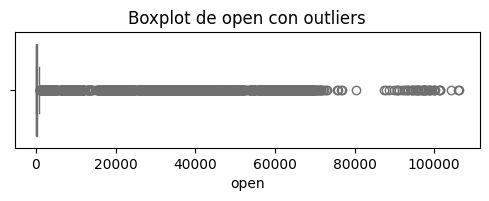

------------------------------------------------------------
Variable: high
Número de outliers en 'high': 3124
Porcentaje de outliers en 'high': 22.78%
1827    33155.118819
1828    29600.626950
1829    29244.876688
1830    28937.740004
1831    27370.720084
            ...     
5476     2257.128006
5477     2271.359492
5478     2276.764644
5479     2294.608250
5480     2385.117789
Name: high, Length: 3124, dtype: float64


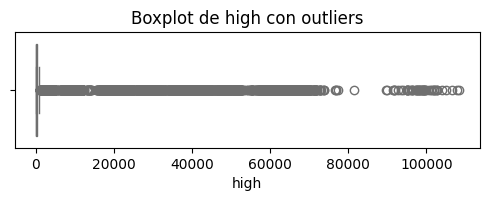

------------------------------------------------------------
Variable: low
Número de outliers en 'low': 3116
Porcentaje de outliers en 'low': 22.72%
1827    29091.181191
1828    28803.585014
1829    28201.991994
1830    27360.089709
1831    25987.298075
            ...     
5476     2211.562610
5477     2219.782072
5478     2209.537005
5479     2204.865713
5480     2113.925349
Name: low, Length: 3116, dtype: float64


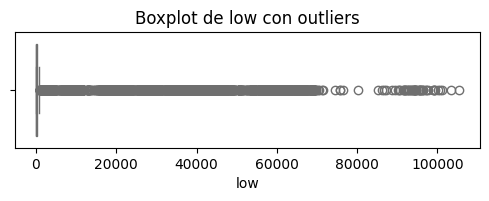

------------------------------------------------------------
Variable: close
Número de outliers en 'close': 3121
Porcentaje de outliers en 'close': 22.76%
1827    32127.267939
1828    29374.151889
1829    29001.719822
1830    28840.953420
1831    27362.436557
            ...     
5476     2222.865888
5477     2241.624710
5478     2268.647227
5479     2269.038183
5480     2210.761892
Name: close, Length: 3121, dtype: float64


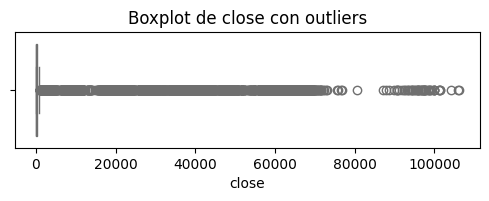

------------------------------------------------------------
Variable: volume
Número de outliers en 'volume': 1317
Porcentaje de outliers en 'volume': 9.60%
1827    6.786542e+10
1828    4.073030e+10
1829    4.675496e+10
1830    5.128744e+10
1831    4.526595e+10
            ...     
5418    4.770690e+10
5419    2.677296e+10
5423    2.846917e+10
5424    3.288589e+10
5473    2.904210e+10
Name: volume, Length: 1317, dtype: float64


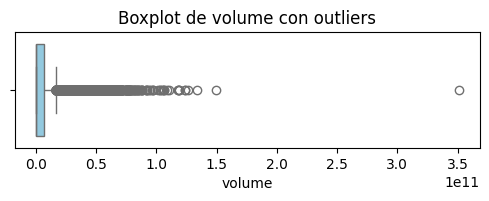

------------------------------------------------------------
Variable: marketCap
Número de outliers en 'marketCap': 3009
Porcentaje de outliers en 'marketCap': 21.94%
1827    5.972059e+11
1828    5.460016e+11
1829    5.390511e+11
1830    5.360338e+11
1831    5.085237e+11
            ...     
5476    2.671552e+11
5477    2.694085e+11
5478    2.726556e+11
5479    2.727025e+11
5480    2.657015e+11
Name: marketCap, Length: 3009, dtype: float64


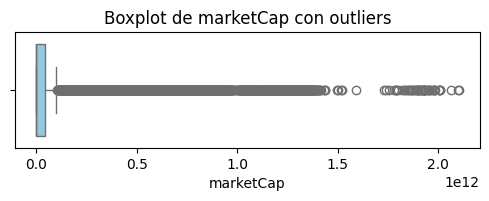

------------------------------------------------------------


In [22]:
columnas_numericas = data_tokens.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
    print(f"Variable: {col}")

    outliers = detectar_outliers(data_tokens, [col])
    cantidad_outliers = outliers[col].count()
    porcentaje_outliers = (cantidad_outliers / len(data_tokens)) * 100

    print(f"Número de outliers en '{col}': {cantidad_outliers}")
    print(f"Porcentaje de outliers en '{col}': {porcentaje_outliers:.2f}%")
    print(outliers[col])

    #grafico boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data_tokens[col], color='skyblue')
    plt.title(f"Boxplot de {col} con outliers")
    plt.xlabel(col)
    plt.show()

    print("-" * 60)

In [23]:
def reemp_outliers_iqr(df, columna):
    df = df.copy()

    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR

    df[columna] = np.where(df[columna] < limite_inferior, Q1, df[columna])
    df[columna] = np.where(df[columna] > limite_superior, Q3, df[columna])

    return df

In [24]:
data_general_sin_outliers = reemp_outliers_iqr(data_tokens.copy(), columnas_numericas)
data_general_sin_outliers.head()

timeOpen                        timeClose  \
0 2021-01-02 00:00:00+00:00 2021-01-02 23:59:59.999000+00:00   
1 2021-01-01 00:00:00+00:00 2021-01-01 23:59:59.999000+00:00   
2 2020-12-31 00:00:00+00:00 2020-12-31 23:59:59.999000+00:00   
3 2020-12-30 00:00:00+00:00 2020-12-30 23:59:59.999000+00:00   
4 2020-12-29 00:00:00+00:00 2020-12-29 23:59:59.999000+00:00   

                   timeHigh                   timeLow      open      high  \
0 2021-01-02 06:14:07+00:00 2021-01-02 00:31:07+00:00  0.398641  0.460714   
1 2021-01-01 14:46:08+00:00 2021-01-01 00:35:08+00:00  0.334207  0.431286   
2 2020-12-31 00:38:08+00:00 2020-12-31 13:14:07+00:00  0.335543  0.336157   
3 2020-12-30 01:51:08+00:00 2020-12-30 12:17:08+00:00  0.345973  0.358485   
4 2020-12-29 00:07:07+00:00 2020-12-29 16:32:08+00:00  0.356529  0.360831   

        low     close        volume     marketCap  \
0  0.385091  0.408091  4.171487e+08  4.882141e+08   
1  0.332387  0.398129  3.418857e+08  4.755064e+08   
2  0.319227  0.334040  6.375345e+07  3.982962e+08   
3  0.328187  0.335543  7.600792e+07  3.995275e+08   
4  0.320894  0.345918  1.143950e+08  4.113032e+08   

                         timestamp     token  
0 2021-01-02 23:59:59.999000+00:00  Algorand  
1 2021-01-01 23:59:59.999000+00:00  Algorand  
2 2020-12-31 23:59:59.999000+00:00  Algorand  
3 2020-12-30 23:59:59.999000+00:00  Algorand  
4 2020-12-29 23:59:59.999000+00:00  Algorand

Variable: open
Número de outliers en 'open': 0
Porcentaje de outliers en 'open': 0.00%
Series([], Name: open, dtype: float64)


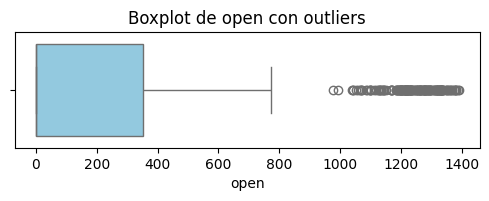

------------------------------------------------------------
Variable: high
Número de outliers en 'high': 0
Porcentaje de outliers en 'high': 0.00%
Series([], Name: high, dtype: float64)


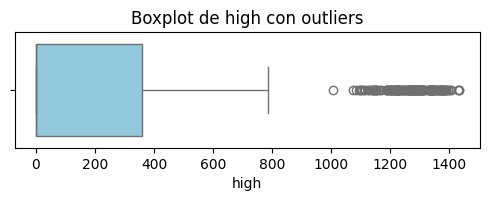

------------------------------------------------------------
Variable: low
Número de outliers en 'low': 0
Porcentaje de outliers en 'low': 0.00%
Series([], Name: low, dtype: float64)


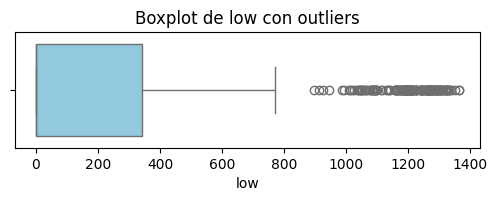

------------------------------------------------------------
Variable: close
Número de outliers en 'close': 0
Porcentaje de outliers en 'close': 0.00%
Series([], Name: close, dtype: float64)


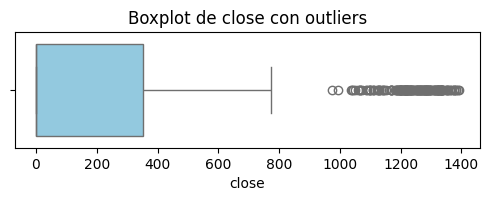

------------------------------------------------------------
Variable: volume
Número de outliers en 'volume': 1
Porcentaje de outliers en 'volume': 0.01%
3267    2.651870e+10
Name: volume, dtype: float64


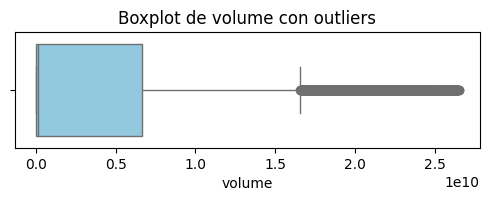

------------------------------------------------------------
Variable: marketCap
Número de outliers en 'marketCap': 0
Porcentaje de outliers en 'marketCap': 0.00%
Series([], Name: marketCap, dtype: float64)


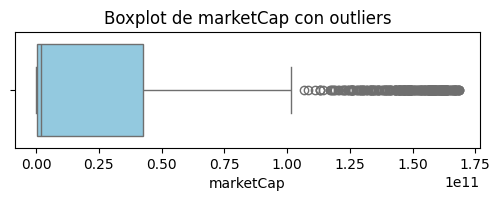

------------------------------------------------------------


In [25]:
columnas_numericas = data_general_sin_outliers.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
    print(f"Variable: {col}")

    outliers = detectar_outliers(data_general_sin_outliers, [col])
    cantidad_outliers = outliers[col].count()
    porcentaje_outliers = (cantidad_outliers / len(data_general_sin_outliers)) * 100

    print(f"Número de outliers en '{col}': {cantidad_outliers}")
    print(f"Porcentaje de outliers en '{col}': {porcentaje_outliers:.2f}%")
    print(outliers[col])

    #grafico boxplot
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=data_general_sin_outliers[col], color='skyblue')
    plt.title(f"Boxplot de {col} con outliers")
    plt.xlabel(col)
    plt.show()

    print("-" * 60)

Para la detección de valores atipicos se utilizó el método del rango intercuartílico (IQR), estableciendo los límites inferior y superior como Q1 - 3 * IQR y Q3 + 3 * IQR, respectivamente. Este enfoque permite identificar solo los valores extremadamente alejados sin eliminar puntos que podrían ser relevantes en un contexto financiero.

A pesar de este critero, se observó que aproximadamente un 20% de los valores en variables como open, close, high, low, marketCap y un 9% aprox para volumen, fueron considerados outliers. Esto se explica por la alta variabilidad y del mercado de criptomonedas, donde coexisten tokens con precios bajos y capitalizaciones enormes.

Dado este comportamiento tan variado entre tokens,optamos por aplicar la deteccion y tratamiento de outliers de forma individual por cada token. Esto fue porque nos dimos cuenta que tokens como Bitcoin o Ethereum tienen valores muy superiores a tokens como The Graph o Algorand. Como vimos, al aplicar el calculo de outliers sobre todo el conjunto, los valores de tokens más pequeños o muy altos pueden ser considerados incorrectamente como extremos. 

Al separar por token, cada uno mantiene su propia distribución, y los límites de detección son proporcionales a su comportamiento histórico. Esto permite una corrección mas representativa de los valores extremos.

Cabe resaltar que a modo de prueba, tambien se hizo el tratamiento de outliers de forma general sobre todo el conjunto, sin separar por tokens. (es lo que se muestra arriba)

#### Detectar Outliers por token

In [26]:
def detectar_outliers_por_token(df, columnas):
    tokens = df["token"].unique()

    for token in tokens:
        print(f"\nToken: {token}")
        df_token = df[df["token"] == token]

        for col in columnas:
            Q1 = df_token[col].quantile(0.25)
            Q3 = df_token[col].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 3 * IQR
            limite_superior = Q3 + 3 * IQR

            outliers = df_token[(df_token[col] < limite_inferior) | (df_token[col] > limite_superior)]
            cantidad_outliers = outliers[col].count()
            porcentaje_outliers = (cantidad_outliers / len(df_token)) * 100

            print(f"  Variable: {col}")
            print(f"    Número de outliers: {cantidad_outliers}")
            print(f"    Porcentaje: {porcentaje_outliers:.2f}%")

            #Boxplot por token y variable
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=df_token[col], color='skyblue')
            plt.title(f"Boxplot de {col} para {token}")
            plt.xlabel(col)
            plt.show()


In [27]:
def boxplots_outliers_por_token(df, columnas):
    tokens = df["token"].unique()

    for col in columnas:
        n_tokens = len(tokens)
        n_cols = 3  # num de columnas en el grid
        n_rows = math.ceil(n_tokens / n_cols)

        fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 2))
        fig.suptitle(f"Boxplots de la variable '{col}' por token", fontsize=14)
        axs = axs.flatten()

        for i, token in enumerate(tokens):
            df_token = df[df["token"] == token]

            sns.boxplot(x=df_token[col], ax=axs[i], color='skyblue')
            axs[i].set_title(token)
            axs[i].set_xlabel(col)

        for j in range(i + 1, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

In [28]:
def contar_outliers_por_token(df, columnas):
    resumen = []

    for token in df["token"].unique():
        df_token = df[df["token"] == token]
        n_total = len(df_token)

        for col in columnas:
            Q1 = df_token[col].quantile(0.25)
            Q3 = df_token[col].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 3 * IQR
            limite_superior = Q3 + 3 * IQR

            n_outliers = df_token[(df_token[col] < limite_inferior) | (df_token[col] > limite_superior)].shape[0]
            porcentaje = (n_outliers / n_total) * 100

            resumen.append({
                "token": token,
                "variable": col,
                "outliers": n_outliers,
                "porcentaje": round(porcentaje, 2)
            })

    return pd.DataFrame(resumen)


Token: Algorand
  Variable: open
    Número de outliers: 4
    Porcentaje: 0.22%


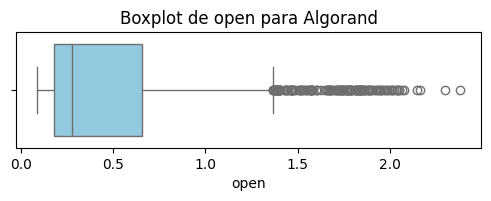

  Variable: high
    Número de outliers: 8
    Porcentaje: 0.44%


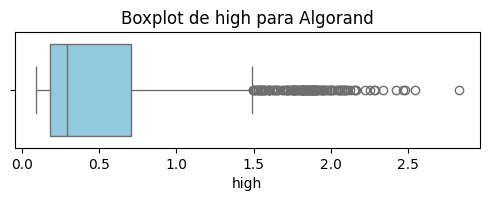

  Variable: low
    Número de outliers: 4
    Porcentaje: 0.22%


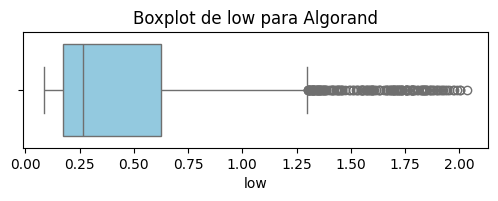

  Variable: close
    Número de outliers: 5
    Porcentaje: 0.27%


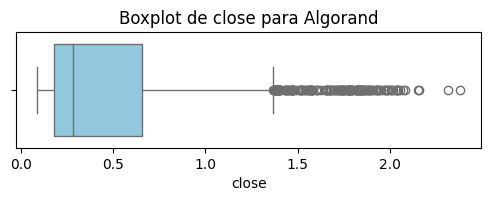

  Variable: volume
    Número de outliers: 70
    Porcentaje: 3.83%


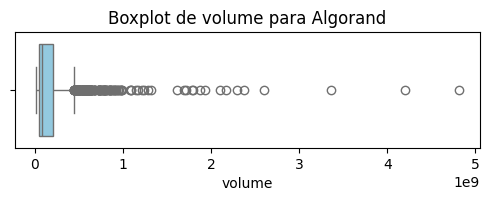

  Variable: marketCap
    Número de outliers: 130
    Porcentaje: 7.12%


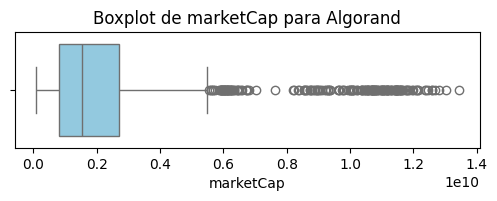


Token: Bitcoin
  Variable: open
    Número de outliers: 0
    Porcentaje: 0.00%


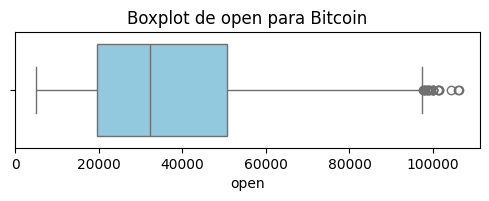

  Variable: high
    Número de outliers: 0
    Porcentaje: 0.00%


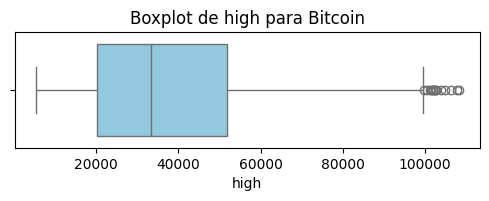

  Variable: low
    Número de outliers: 0
    Porcentaje: 0.00%


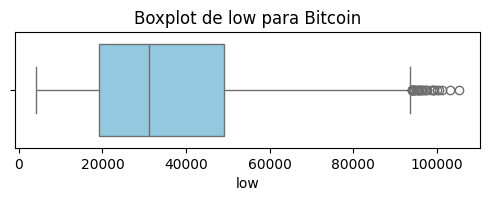

  Variable: close
    Número de outliers: 0
    Porcentaje: 0.00%


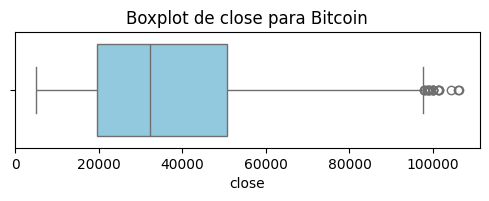

  Variable: volume
    Número de outliers: 19
    Porcentaje: 1.04%


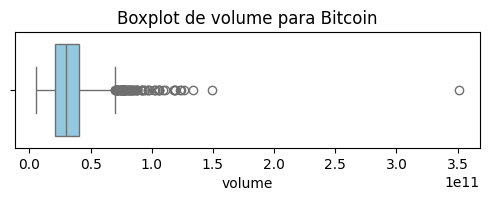

  Variable: marketCap
    Número de outliers: 0
    Porcentaje: 0.00%


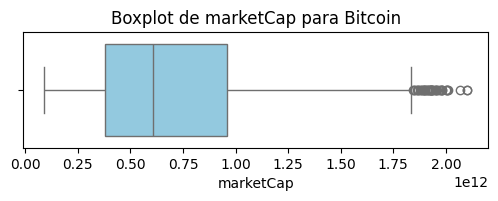


Token: Ethereum
  Variable: open
    Número de outliers: 0
    Porcentaje: 0.00%


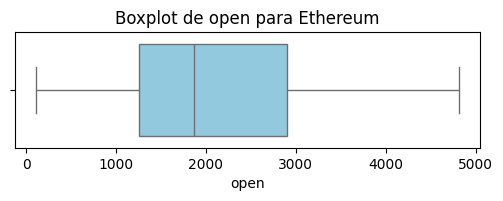

  Variable: high
    Número de outliers: 0
    Porcentaje: 0.00%


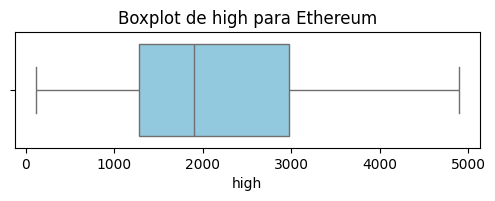

  Variable: low
    Número de outliers: 0
    Porcentaje: 0.00%


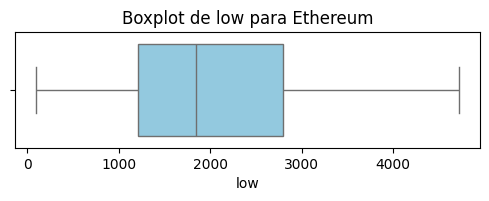

  Variable: close
    Número de outliers: 0
    Porcentaje: 0.00%


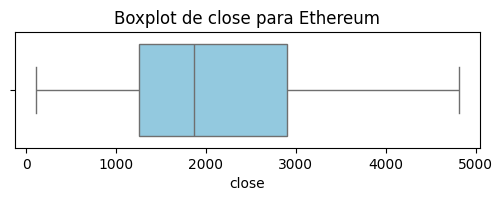

  Variable: volume
    Número de outliers: 20
    Porcentaje: 1.09%


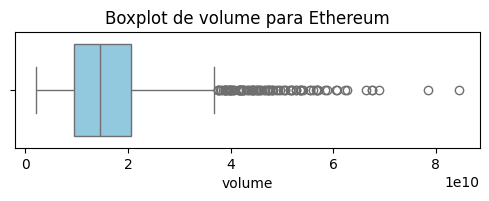

  Variable: marketCap
    Número de outliers: 0
    Porcentaje: 0.00%


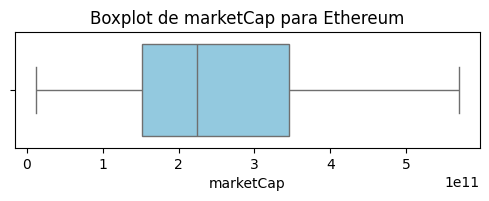


Token: Nervos Network
  Variable: open
    Número de outliers: 0
    Porcentaje: 0.00%


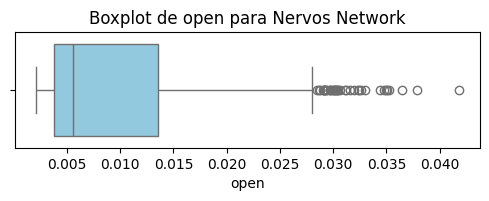

  Variable: high
    Número de outliers: 0
    Porcentaje: 0.00%


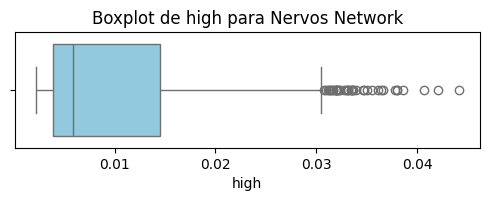

  Variable: low
    Número de outliers: 0
    Porcentaje: 0.00%


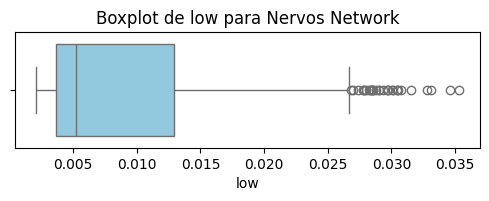

  Variable: close
    Número de outliers: 0
    Porcentaje: 0.00%


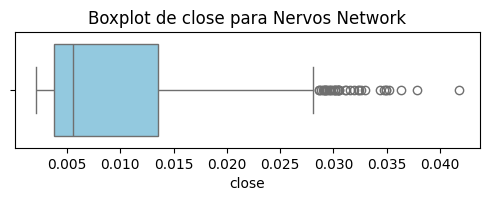

  Variable: volume
    Número de outliers: 103
    Porcentaje: 5.64%


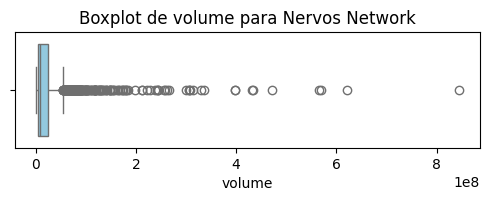

  Variable: marketCap
    Número de outliers: 0
    Porcentaje: 0.00%


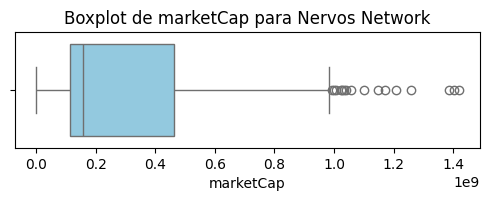


Token: Oasis
  Variable: open
    Número de outliers: 35
    Porcentaje: 2.32%


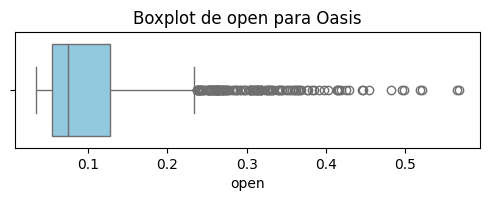

  Variable: high
    Número de outliers: 38
    Porcentaje: 2.52%


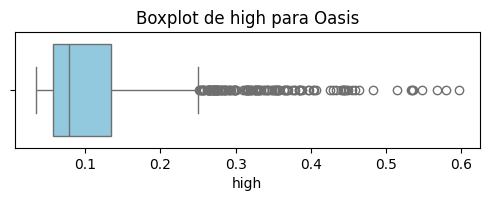

  Variable: low
    Número de outliers: 34
    Porcentaje: 2.26%


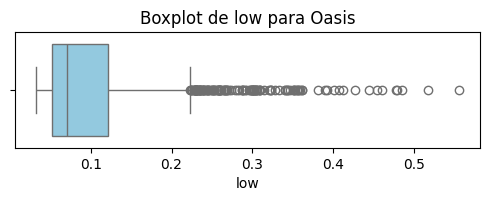

  Variable: close
    Número de outliers: 35
    Porcentaje: 2.32%


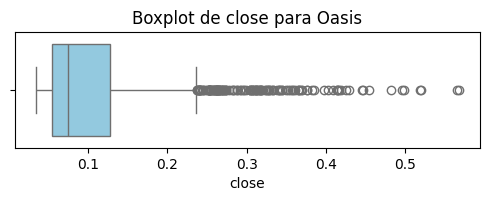

  Variable: volume
    Número de outliers: 68
    Porcentaje: 4.52%


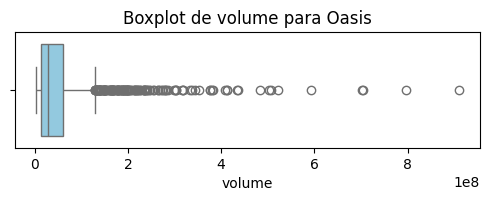

  Variable: marketCap
    Número de outliers: 6
    Porcentaje: 0.40%


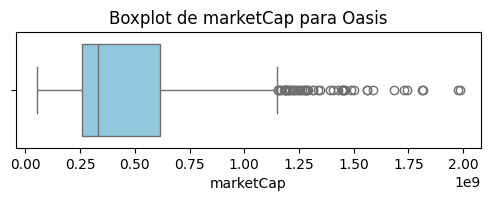


Token: Polkadot
  Variable: open
    Número de outliers: 3
    Porcentaje: 0.19%


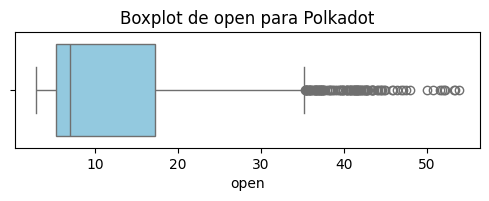

  Variable: high
    Número de outliers: 0
    Porcentaje: 0.00%


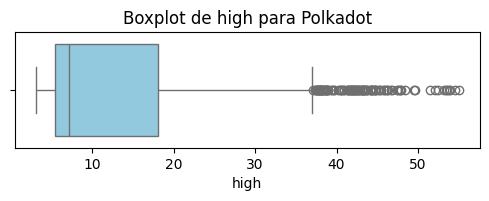

  Variable: low
    Número de outliers: 3
    Porcentaje: 0.19%


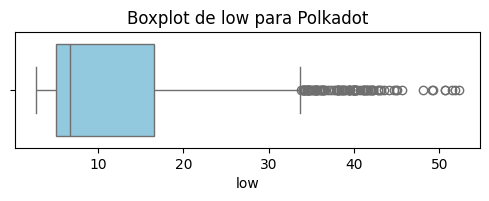

  Variable: close
    Número de outliers: 3
    Porcentaje: 0.19%


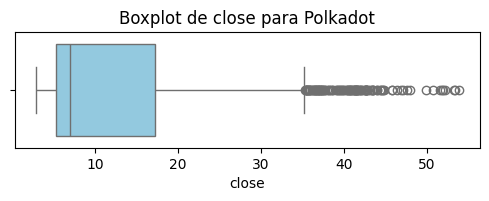

  Variable: volume
    Número de outliers: 47
    Porcentaje: 2.94%


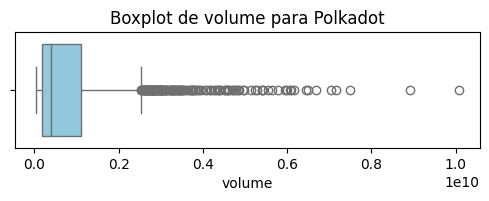

  Variable: marketCap
    Número de outliers: 9
    Porcentaje: 0.56%


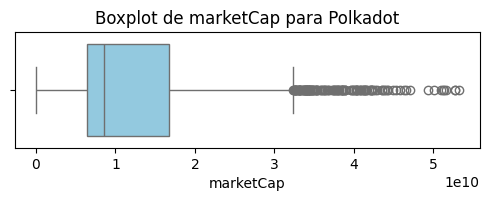


Token: Terra Classic
  Variable: open
    Número de outliers: 340
    Porcentaje: 18.61%


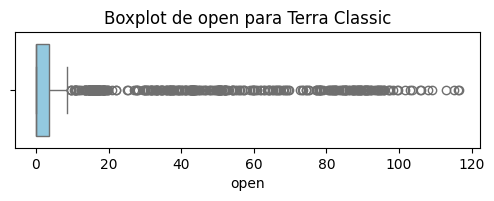

  Variable: high
    Número de outliers: 271
    Porcentaje: 14.83%


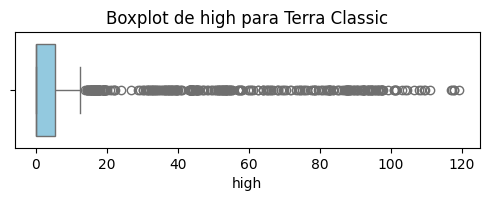

  Variable: low
    Número de outliers: 348
    Porcentaje: 19.05%


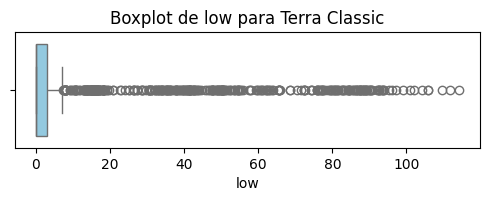

  Variable: close
    Número de outliers: 340
    Porcentaje: 18.61%


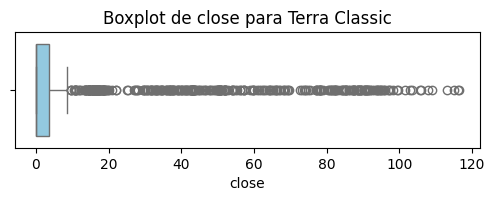

  Variable: volume
    Número de outliers: 217
    Porcentaje: 11.88%


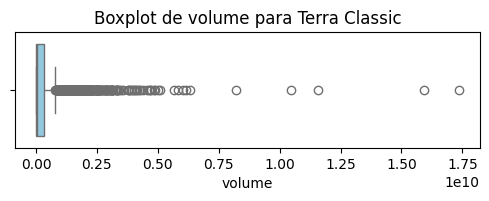

  Variable: marketCap
    Número de outliers: 273
    Porcentaje: 14.94%


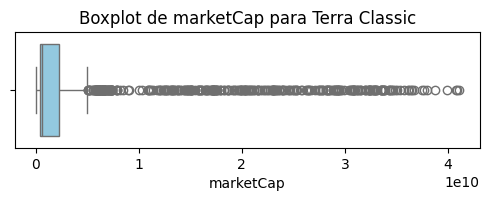


Token: The Graph
  Variable: open
    Número de outliers: 61
    Porcentaje: 4.13%


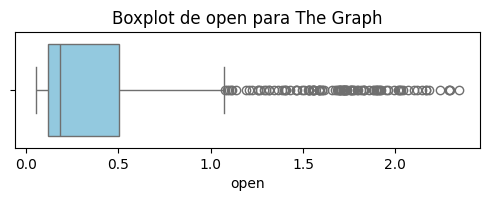

  Variable: high
    Número de outliers: 48
    Porcentaje: 3.25%


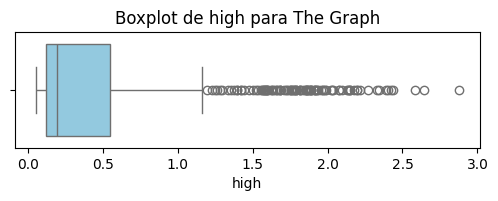

  Variable: low
    Número de outliers: 65
    Porcentaje: 4.40%


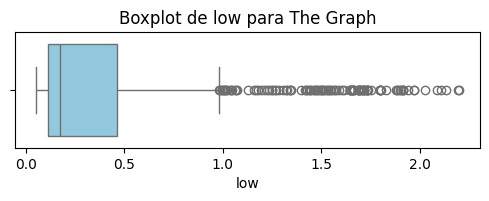

  Variable: close
    Número de outliers: 61
    Porcentaje: 4.13%


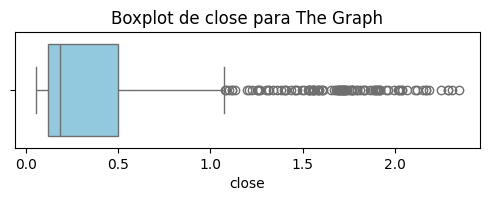

  Variable: volume
    Número de outliers: 40
    Porcentaje: 2.71%


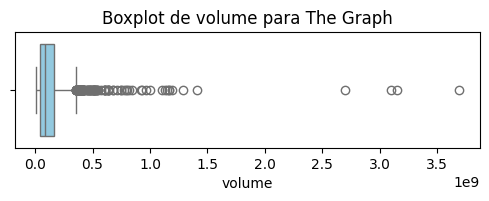

  Variable: marketCap
    Número de outliers: 0
    Porcentaje: 0.00%


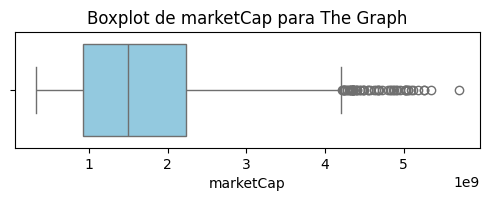

In [29]:
columnas_numericas = data_tokens.select_dtypes(include=["float64", "int64"]).columns
detectar_outliers_por_token(data_tokens, columnas_numericas)


In [30]:
def reemp_outliers_por_token(df, columnas):
    df = df.copy()
    tokens = df["token"].unique()

    for token in tokens:
        for col in columnas:
            df_token = df[df["token"] == token]

            Q1 = df_token[col].quantile(0.25)
            Q3 = df_token[col].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 3 * IQR
            limite_superior = Q3 + 3 * IQR

            mask = df["token"] == token
            df.loc[mask & (df[col] < limite_inferior), col] = Q1
            df.loc[mask & (df[col] > limite_superior), col] = Q3

    return df


In [31]:
columnas_outliers = ["open", "high", "low", "close", "volume", "marketCap"]
data_tokens_sin_outliers = reemp_outliers_por_token(data_tokens, columnas_outliers)

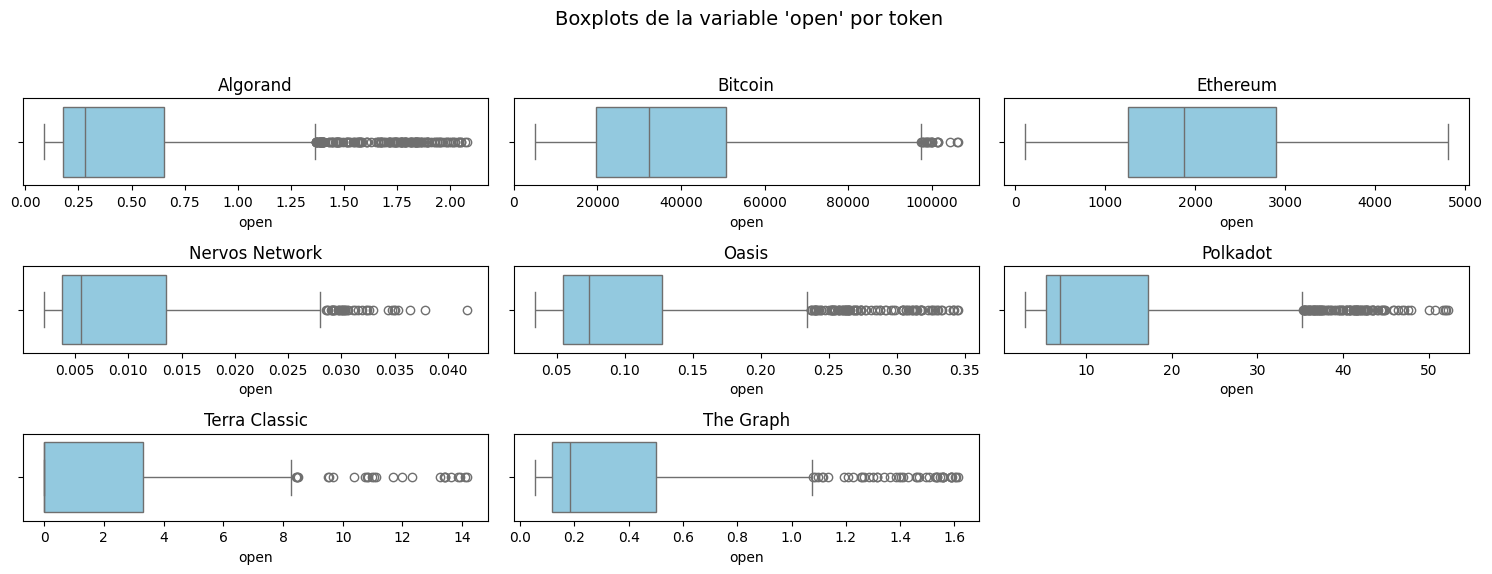

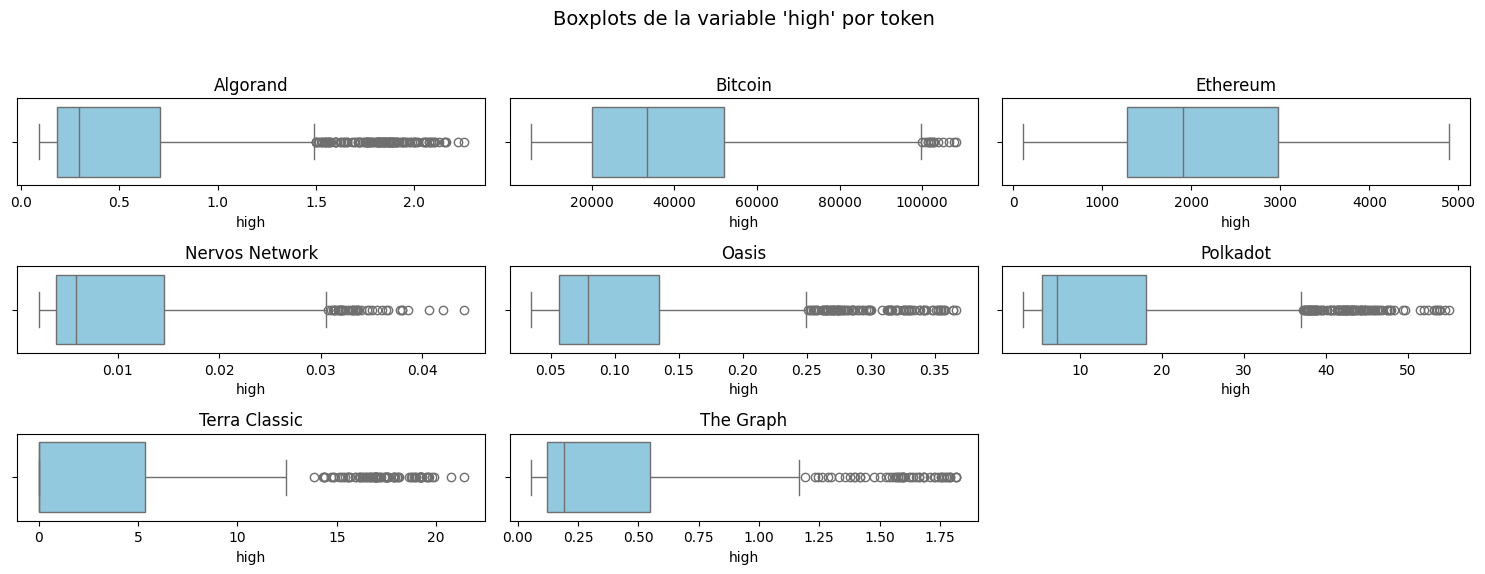

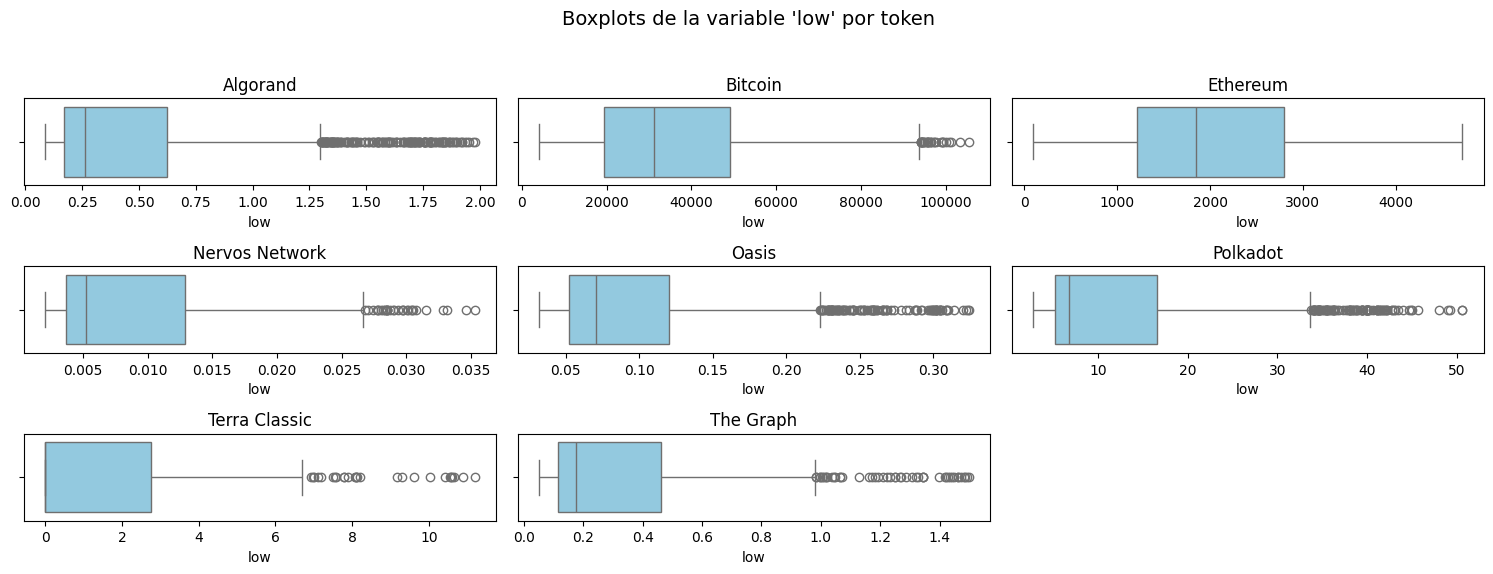

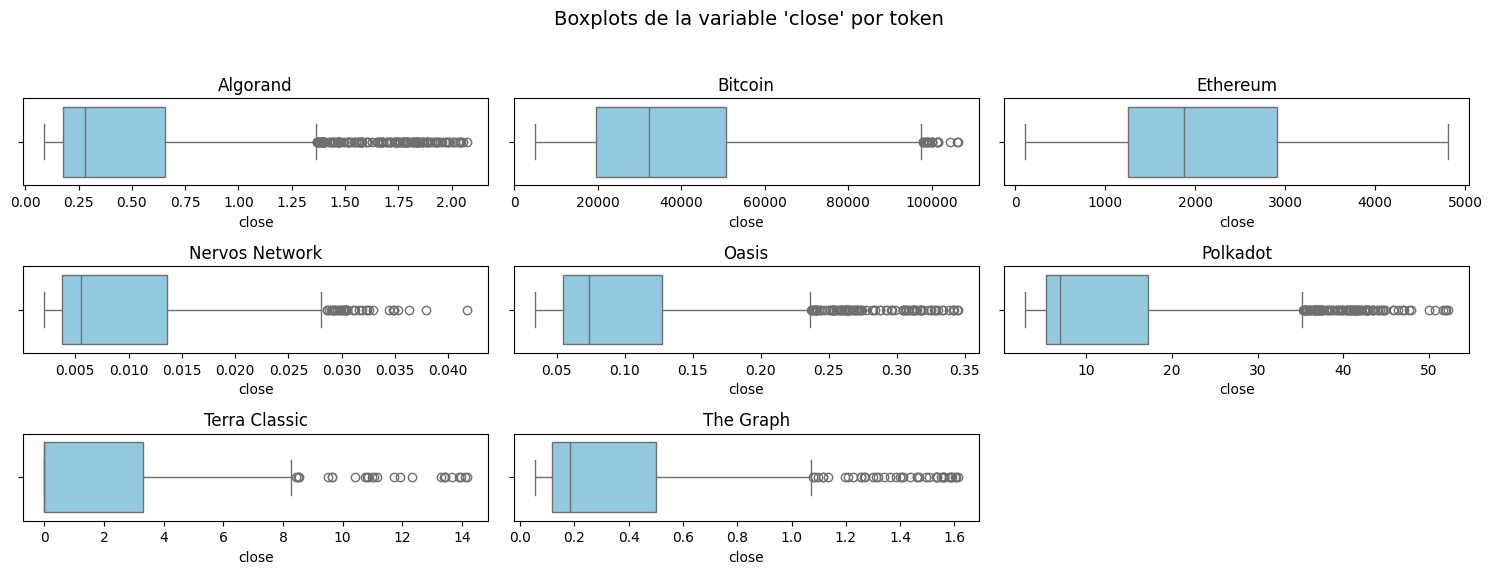

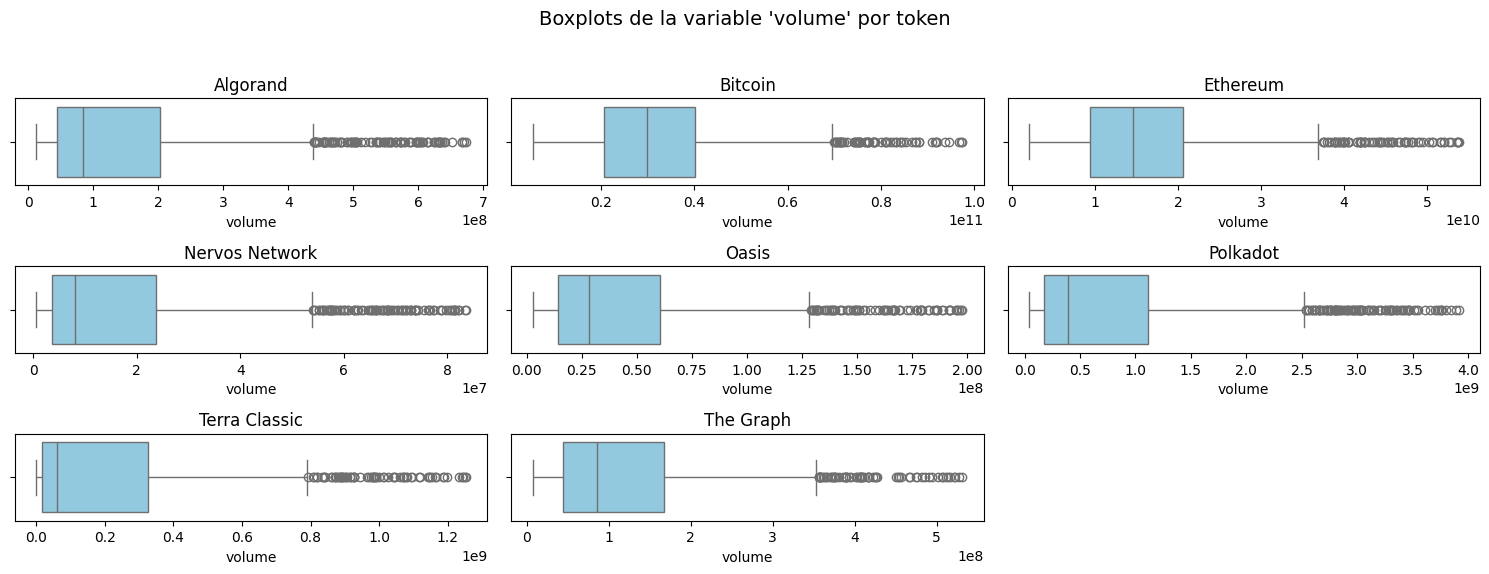

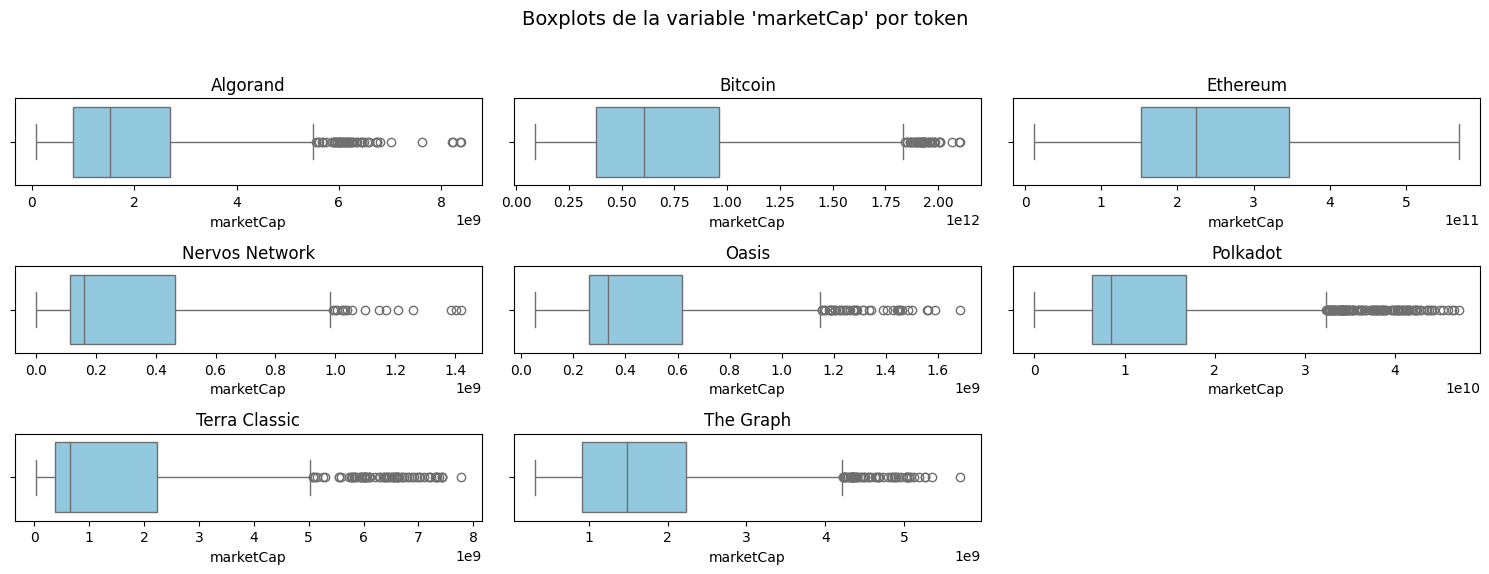

In [32]:
boxplots_outliers_por_token(data_tokens_sin_outliers, columnas_numericas)

In [33]:
resumen_outliers = contar_outliers_por_token(data_tokens_sin_outliers, columnas_outliers)
resumen_outliers.head(48)

token   variable  outliers  porcentaje
0         Algorand       open         1        0.05
1         Algorand       high         0        0.00
2         Algorand        low         1        0.05
3         Algorand      close         0        0.00
4         Algorand     volume         0        0.00
5         Algorand  marketCap         0        0.00
6          Bitcoin       open         0        0.00
7          Bitcoin       high         0        0.00
8          Bitcoin        low         0        0.00
9          Bitcoin      close         0        0.00
10         Bitcoin     volume         0        0.00
11         Bitcoin  marketCap         0        0.00
12        Ethereum       open         0        0.00
13        Ethereum       high         0        0.00
14        Ethereum        low         0        0.00
15        Ethereum      close         0        0.00
16        Ethereum     volume         0        0.00
17        Ethereum  marketCap         0        0.00
18  Nervos Network       open         0        0.00
19  Nervos Network       high         0        0.00
20  Nervos Network        low         0        0.00
21  Nervos Network      close         0        0.00
22  Nervos Network     volume         0        0.00
23  Nervos Network  marketCap         0        0.00
24           Oasis       open         0        0.00
25           Oasis       high         1        0.07
26           Oasis        low         0        0.00
27           Oasis      close         0        0.00
28           Oasis     volume         0        0.00
29           Oasis  marketCap         0        0.00
30        Polkadot       open         0        0.00
31        Polkadot       high         0        0.00
32        Polkadot        low         0        0.00
33        Polkadot      close         0        0.00
34        Polkadot     volume         0        0.00
35        Polkadot  marketCap         0        0.00
36   Terra Classic       open         8        0.44
37   Terra Classic       high         1        0.05
38   Terra Classic        low         1        0.05
39   Terra Classic      close         9        0.49
40   Terra Classic     volume         0        0.00
41   Terra Classic  marketCap         0        0.00
42       The Graph       open         0        0.00
43       The Graph       high         0        0.00
44       The Graph        low         0        0.00
45       The Graph      close         0        0.00
46       The Graph     volume         0        0.00
47       The Graph  marketCap         0        0.00

A pesar de que al detectar los outliers por token se encontró que la mayoría de variables tenían menos del 5% de valores atípicos, se optó por reemplazarlos utilizando los cuartiles Q1 y Q3 (25% y 75%). Esto se hizo para evitar que estos valores extremos influyeran en el análisis posterior, especialmente porque se trata de datos financieros donde una pequeña desviación puede generar resultados poco confiables. Luego de aolicar esto, quedaron algunso outliers pero eran minimos debido a que la distribucion cambio un poco por ello.

In [34]:
data_final = data_tokens_sin_outliers.copy()

In [40]:
data_final.to_csv("data_final.csv", sep=";", index=False)

### 2.7 Análisis Univariado de los Datos

##### Diagramas de pares

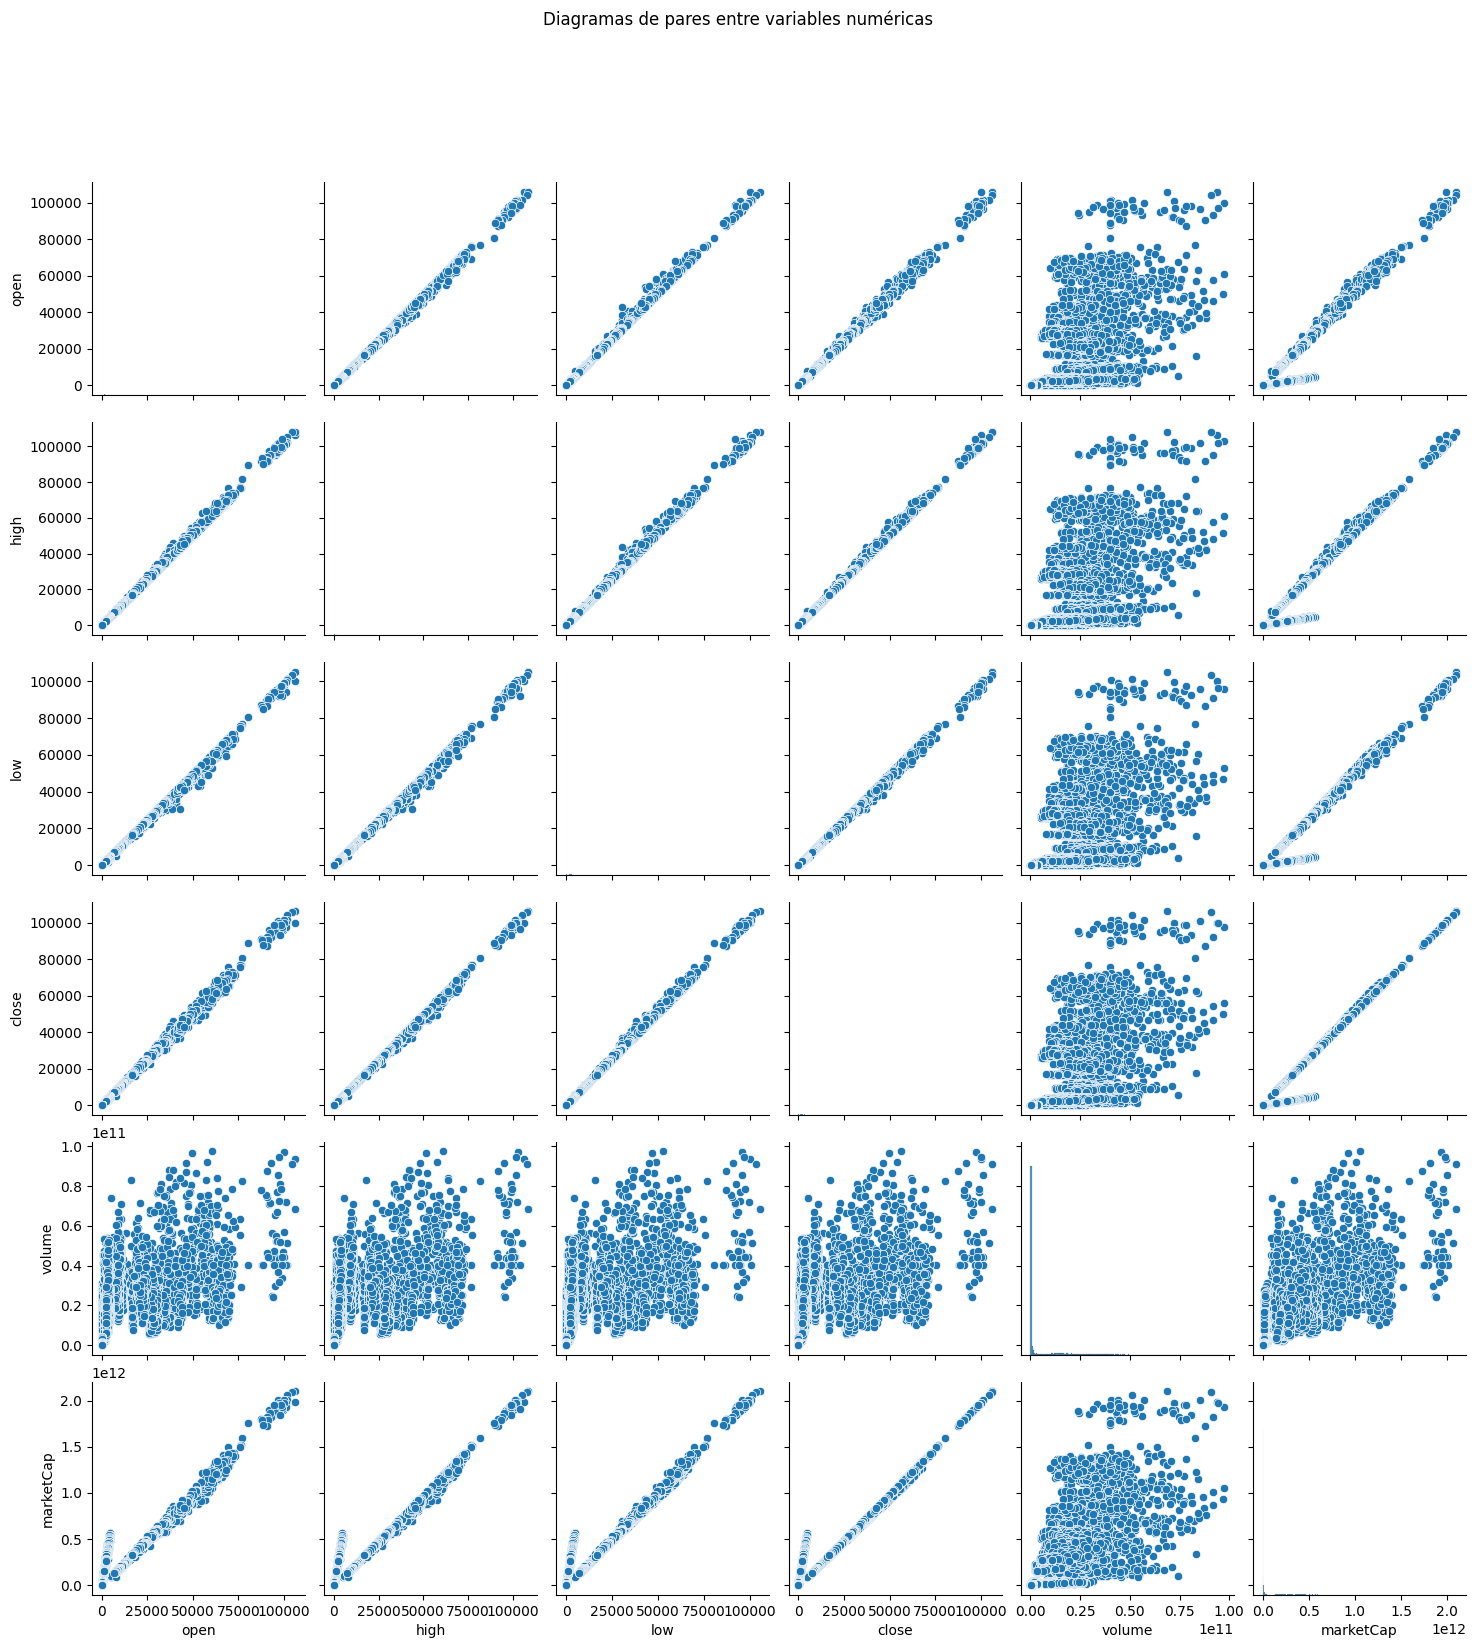

In [36]:
sns.pairplot(data_final[columnas_numericas])
plt.suptitle("Diagramas de pares entre variables numéricas", y=1.1)
plt.show()

- Se observa una fuerte correlación lineal positiva entre las variables open, high, low y close, lo cual es esperable ya que estas variables están directamente relacionadas dentro de un mismo día de cotización.

- Marketcap guarda una relación con los precios, especialmente con close. 

- Volume muestra una dispersión más amplia frente a las demás variables, reflejando que la cantidad de transacciones no siempre está directamente vinculada al valor de mercado o precio de cierre de un token.

##### Diagramas de distribución

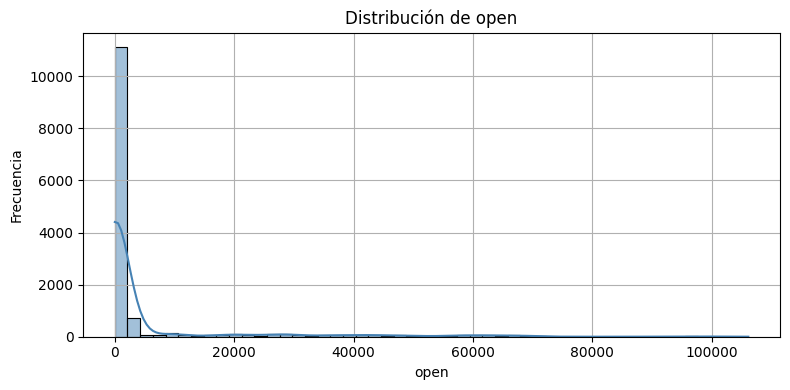

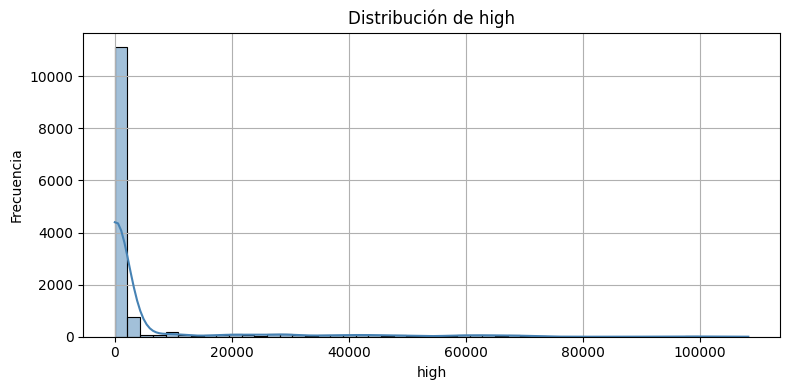

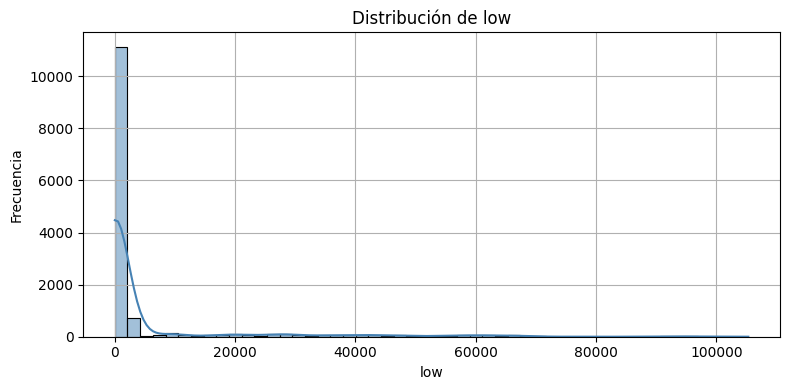

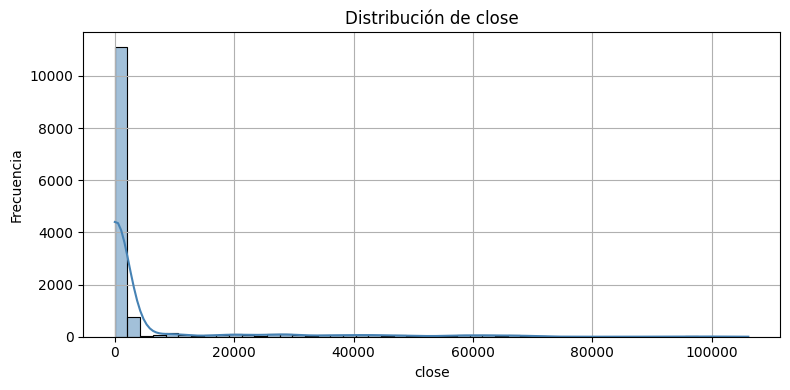

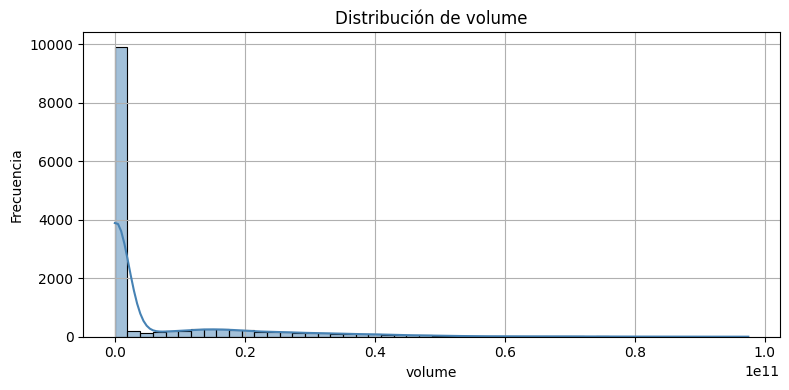

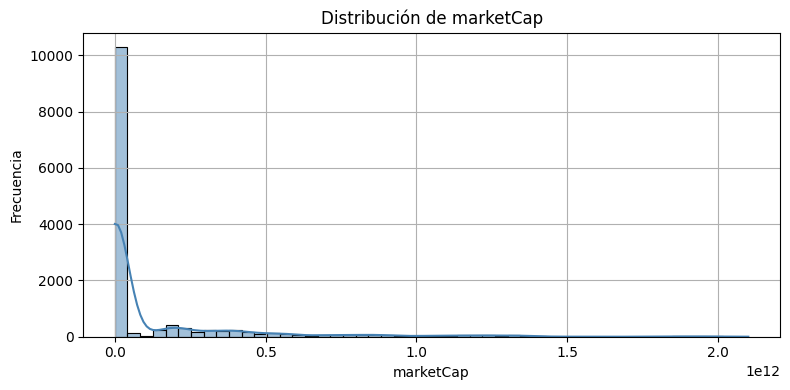

In [32]:
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_final[col], kde=True, bins=50, color='steelblue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Distribución de variables por token

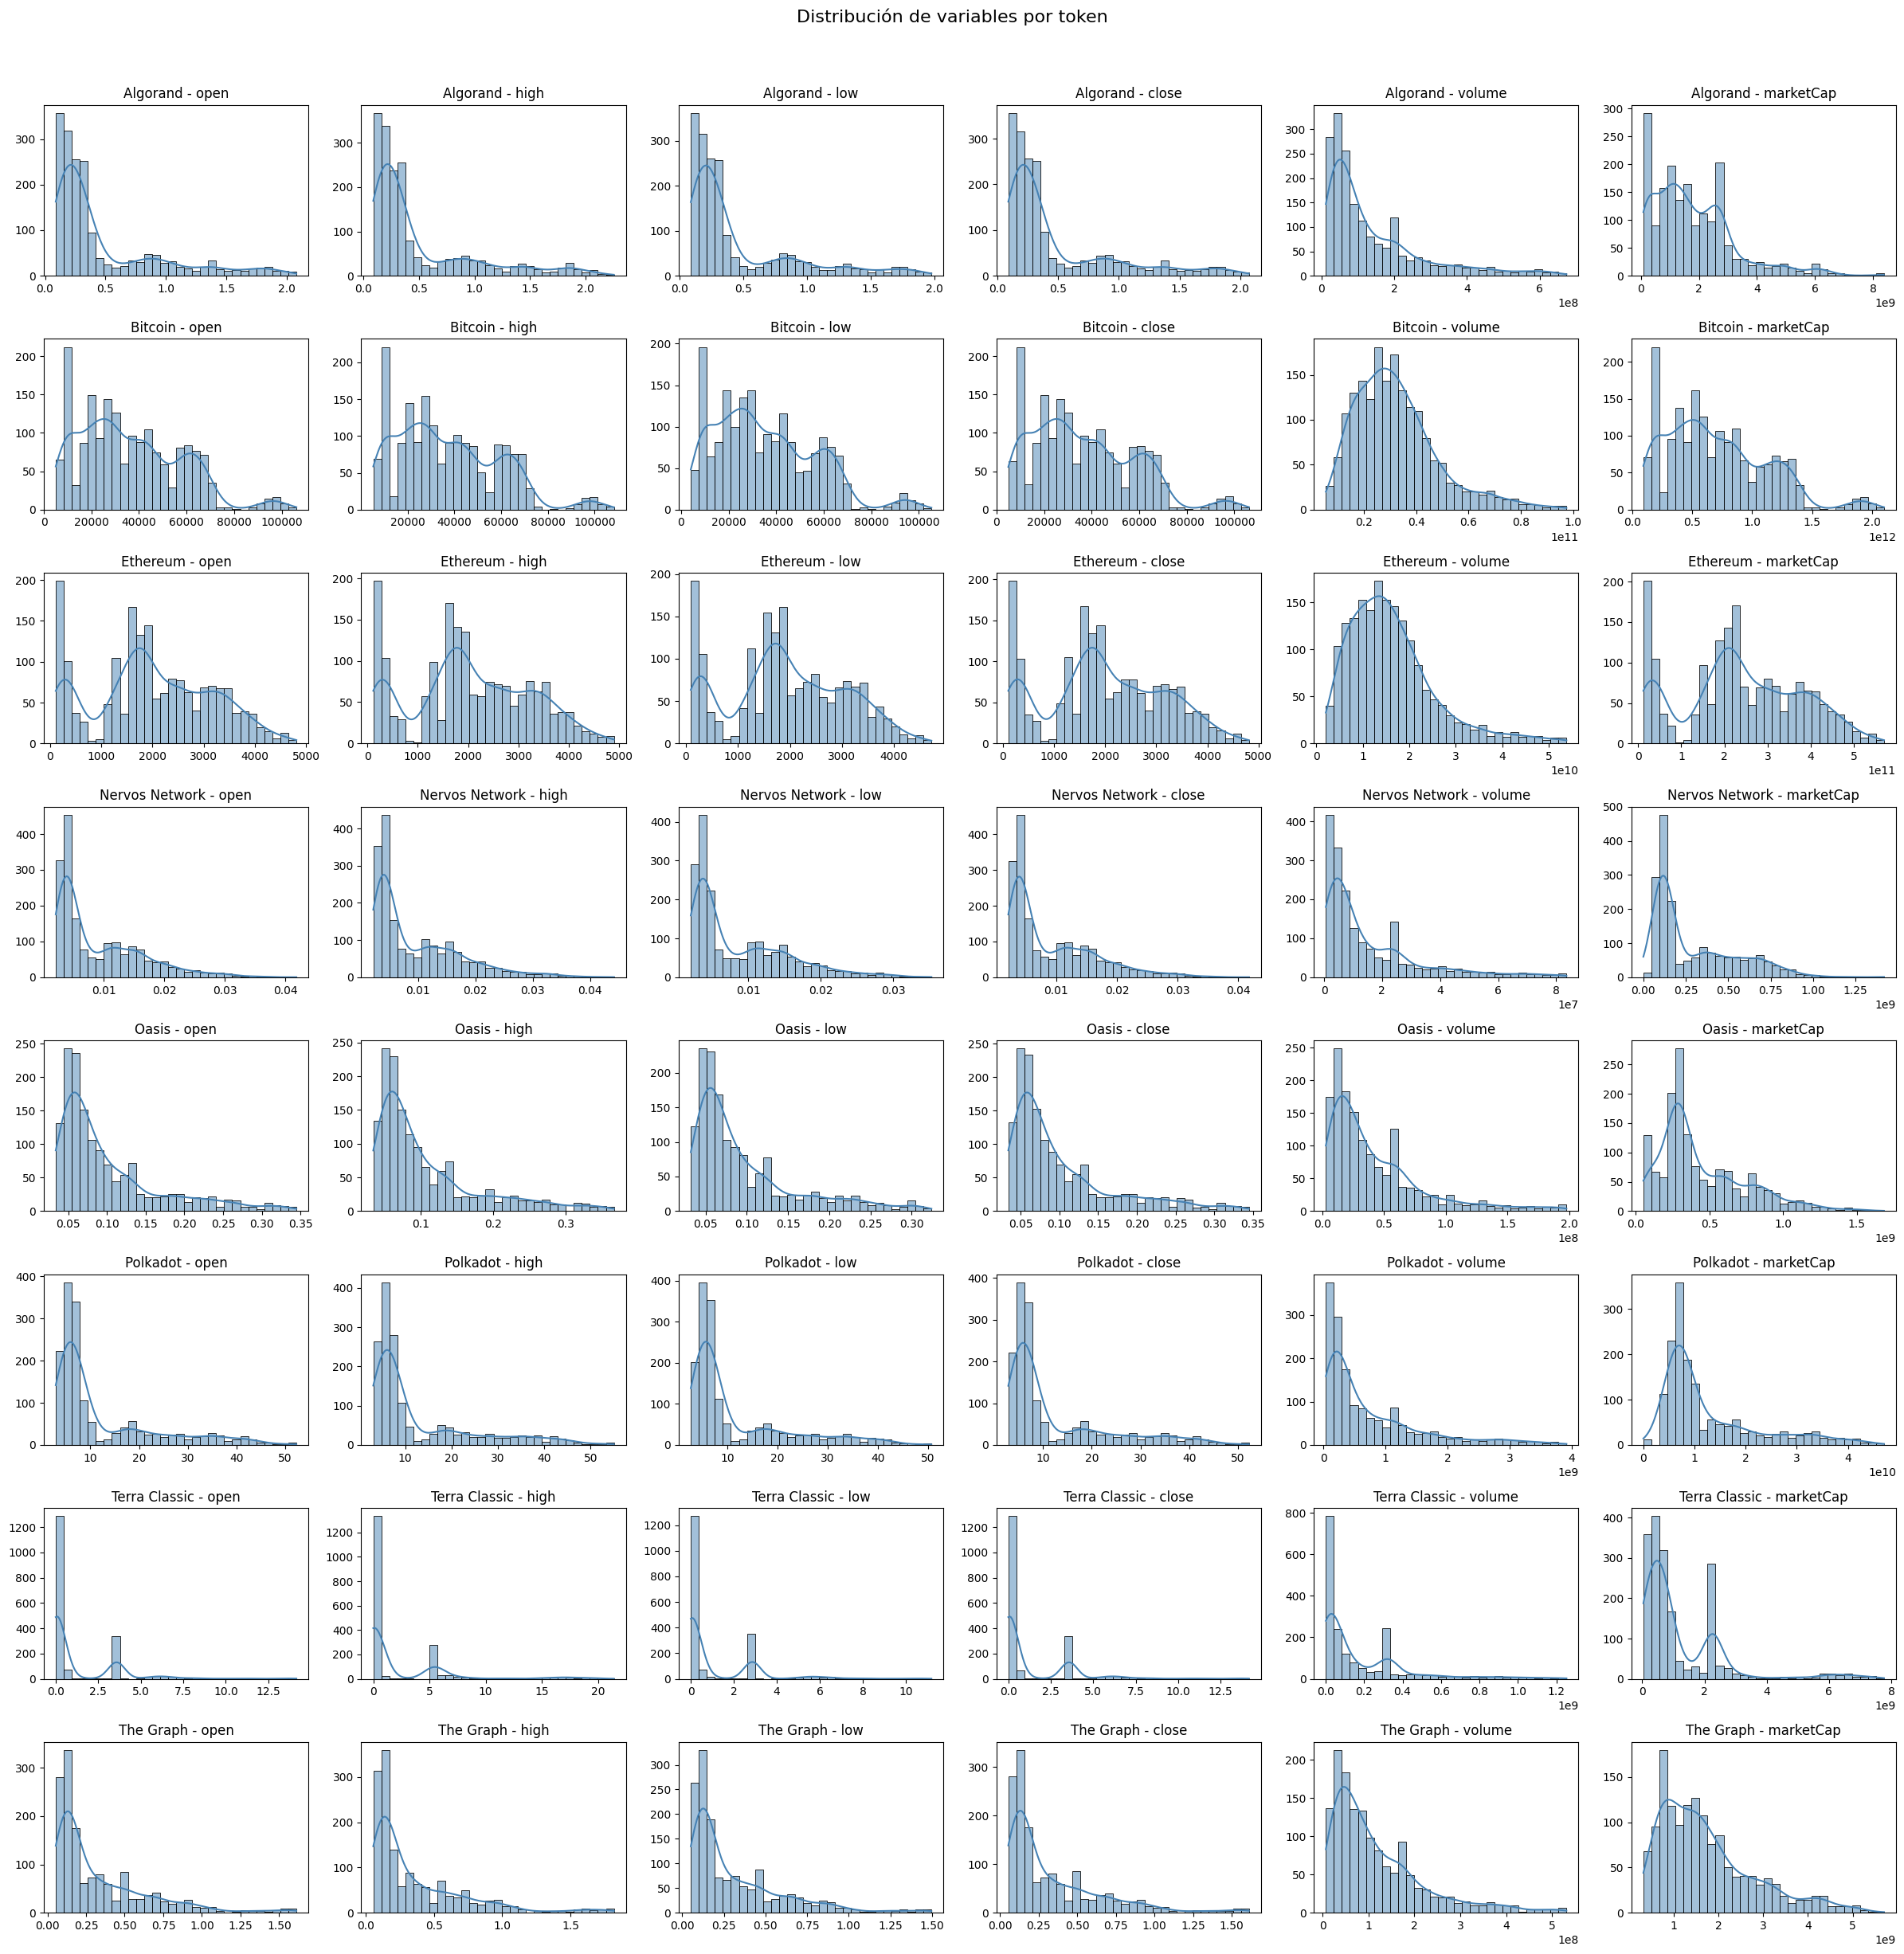

In [34]:
tokens = data_final["token"].unique()
columnas_numericas = ["open", "high", "low", "close", "volume", "marketCap"]

n_rows = len(tokens)
n_cols = len(columnas_numericas)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
fig.suptitle("Distribución de variables por token", fontsize=16, y=1.02)

for i, token in enumerate(tokens):
    token_data = data_final[data_final["token"] == token]
    for j, col in enumerate(columnas_numericas):
        ax = axes[i, j] if n_rows > 1 else axes[j]
        sns.histplot(token_data[col], kde=True, bins=30, color='steelblue', ax=ax)
        ax.set_title(f"{token} - {col}")
        ax.set_xlabel("")
        ax.set_ylabel("")

plt.tight_layout()
plt.show()

Inicialmente, se intentó visualizar la distribución de las variables numéricas de forma general. Sin embargo, como ya se mencionó anteriormente, debido a la gran diferencia en la escala de precios y capitalización entre diferentes criptomonedas, los resultados no llegaban a verse bien.

Por ello,  realizamos los histogramas de forma separada para cada token. En el gráfico mostrado se puede observar la distribución individual de cada variable numérica segmentada por token.

Al analizar la distribución de las variables numéricas por token, se observa una fuerte asimetría a la derecha en la mayoría de las criptomonedas, lo que indica que existen muchos valores bajos y unos pocos valores extremadamente altos. Tokens como Terra Classic, The Graph o Algorand presentan concentraciones evidentes en rangos bajos, mientras que criptomonedas como Bitcoin y Ethereum muestran distribuciones más amplias y dispersas, con escalas significativamente mayores. También se perciben patrones repetitivos en las distribuciones de open, high, low y close, lo cual es coherente ya que estas variables están estrechamente relacionadas en su comportamiento diario.

### 2.8. Análisis Bivariado de los Datos

##### Correlacion de variables

In [38]:
matriz_correlacion = data_final[columnas_numericas].corr(method='spearman')
matriz_correlacion

open      high       low     close    volume  marketCap
open       1.000000  0.999223  0.999675  0.999551  0.884157   0.898084
high       0.999223  1.000000  0.999033  0.999173  0.886535   0.896893
low        0.999675  0.999033  1.000000  0.999743  0.882829   0.898453
close      0.999551  0.999173  0.999743  1.000000  0.884316   0.898147
volume     0.884157  0.886535  0.882829  0.884316  1.000000   0.929038
marketCap  0.898084  0.896893  0.898453  0.898147  0.929038   1.000000

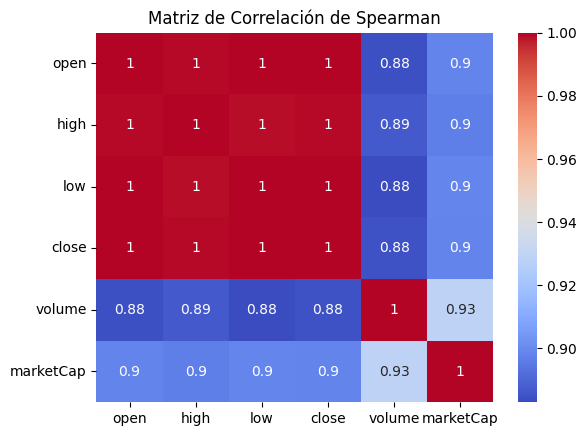

In [39]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Spearman')
plt.show()

##### ¿Qué variables son las tienen mayor correlación?

In [41]:
#Identifique las variables numericas que guardan una correlacion superior a 0.6
correlaciones_altas = []

for i in range(len(matriz_correlacion.columns)):
    for j in range(i + 1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        corr = matriz_correlacion.iloc[i, j]
        if corr > 0.6:
            correlaciones_altas.append((var1, var2, round(corr, 3)))

print("Pares de variables con correlación superior a 0.6:")
for var1, var2, corr in correlaciones_altas:
    print(f"{var1} - {var2}: Correlación = {corr}")

Pares de variables con correlación superior a 0.6:
open - high: Correlación = 0.999
open - low: Correlación = 1.0
open - close: Correlación = 1.0
open - volume: Correlación = 0.884
open - marketCap: Correlación = 0.898
high - low: Correlación = 0.999
high - close: Correlación = 0.999
high - volume: Correlación = 0.887
high - marketCap: Correlación = 0.897
low - close: Correlación = 1.0
low - volume: Correlación = 0.883
low - marketCap: Correlación = 0.898
close - volume: Correlación = 0.884
close - marketCap: Correlación = 0.898
volume - marketCap: Correlación = 0.929


Las variables open, high, low y close estan extremadamente correlacionadas entre sí. Esto es debido a que todos son precios que vienen del mismo token para un mismo día, por lo tanto, su comportamiento siempre va a ser parecido.

También se observa que volume y marketCap tienen una relación fuerte con las variables de precio, esto es ya que estos dependen del valor del token y la cantidad de circulación, pero pueden variar más por factores del mercado.

##### ¿Aplica generación de nuevas variables o reducción de dimensionalidad?

Debido a la alta correlacion de las variables mencionadas se considero 2 opciones:
- Eliminar open, high, low y quedarnos con close
- Aplicar PCA

Si bien PCA ayuda a reducir la dimensionalidad combinando información de todas las variables, en este caso nos interesa trabajar directamente con valores reales del mercado. Por eso, se optó por eliminar open, high y low, y conservar únicamente close, al ser la más representativa del precio final de cada día.



In [35]:
columnas_eliminar = ["open", "high", "low"]

data_final = data_final.drop(columns=columnas_eliminar)
data_general_sin_outliers = data_general_sin_outliers.drop(columns=columnas_eliminar)

columnas_numericas = [col for col in columnas_numericas if col not in columnas_eliminar]

##### Coeficiente de Asimetria

In [36]:
data_final[columnas_numericas].skew()

close        3.410596
volume       2.519839
marketCap    3.035322
dtype: float64

In [37]:
data_general_sin_outliers[columnas_numericas].skew()

close        2.749403
volume       2.003520
marketCap    2.889777
dtype: float64

Al comparar los coeficientes de asimetría, se observa que el tratamiento general de outliers reduce ligeramente la asimetría de las variables, haciendo las distribuciones más simétricas. Sin embargo, este enfoque ignora las diferencias que hay entre tokens. Por eso, se optó por el tratamiento por token, que mantiene la estructura real de cada criptomoneda, aunque con un poco más de asimetría. 

En ambos casos, la asimetría es positiva, lo que indica una cola más larga hacia la derecha, es decir, presencia de valores elevados que elevan la media con respecto a la mediana.

##### Coeficiente de curtosis

In [38]:
data_final[columnas_numericas].kurtosis()

close        12.022693
volume        7.122482
marketCap    10.272156
dtype: float64

In [39]:
data_general_sin_outliers[columnas_numericas].kurtosis()

close        11.370962
volume        3.138901
marketCap    11.639916
dtype: float64

Los valores de curtosis obtenidos en todas las variables superan en exceso el umbral de 0.25, lo que indica que las distribuciones son leptocúrticas. 

Esto significa que están muy concentradas alrededor de la media, pero aún presentan colas largas, lo que sugiere cierta presencia de valores extremos. 

Si bien se aplico una corrección de outliers, consideramos que esta curtosis elevada es esperable en el contexto financiero, donde la volatilidad y las subidas/bajadas en precios o volumen son comunes. 

### 2.9. Visualización de los datos

¿Cómo varía internamente el precio de cierre entre los diferentes tokens?

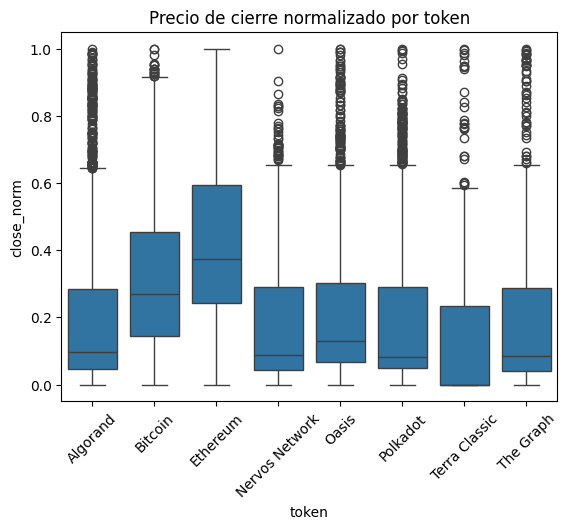

In [61]:
df_norm = data_final.copy()
df_norm["close_norm"] = df_norm.groupby("token")["close"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

sns.boxplot(data=df_norm, x="token", y="close_norm")
plt.title("Precio de cierre normalizado por token")
plt.xticks(rotation=45)
plt.show()



Al normalizar el precio de cierre por token, se observa que tokens como Ethereum presentan mayor dispersión en sus valores, mientras que otros como Algorand o The Graph son más estables. Esto permite comparar la variabilidad interna de cada token sin que el valor absoluto afecte la visualización, destacando diferencias en volatilidad entre criptomonedas.

¿Cómo ha evolucionado el precio o volumen a lo largo del tiempo para cada token?

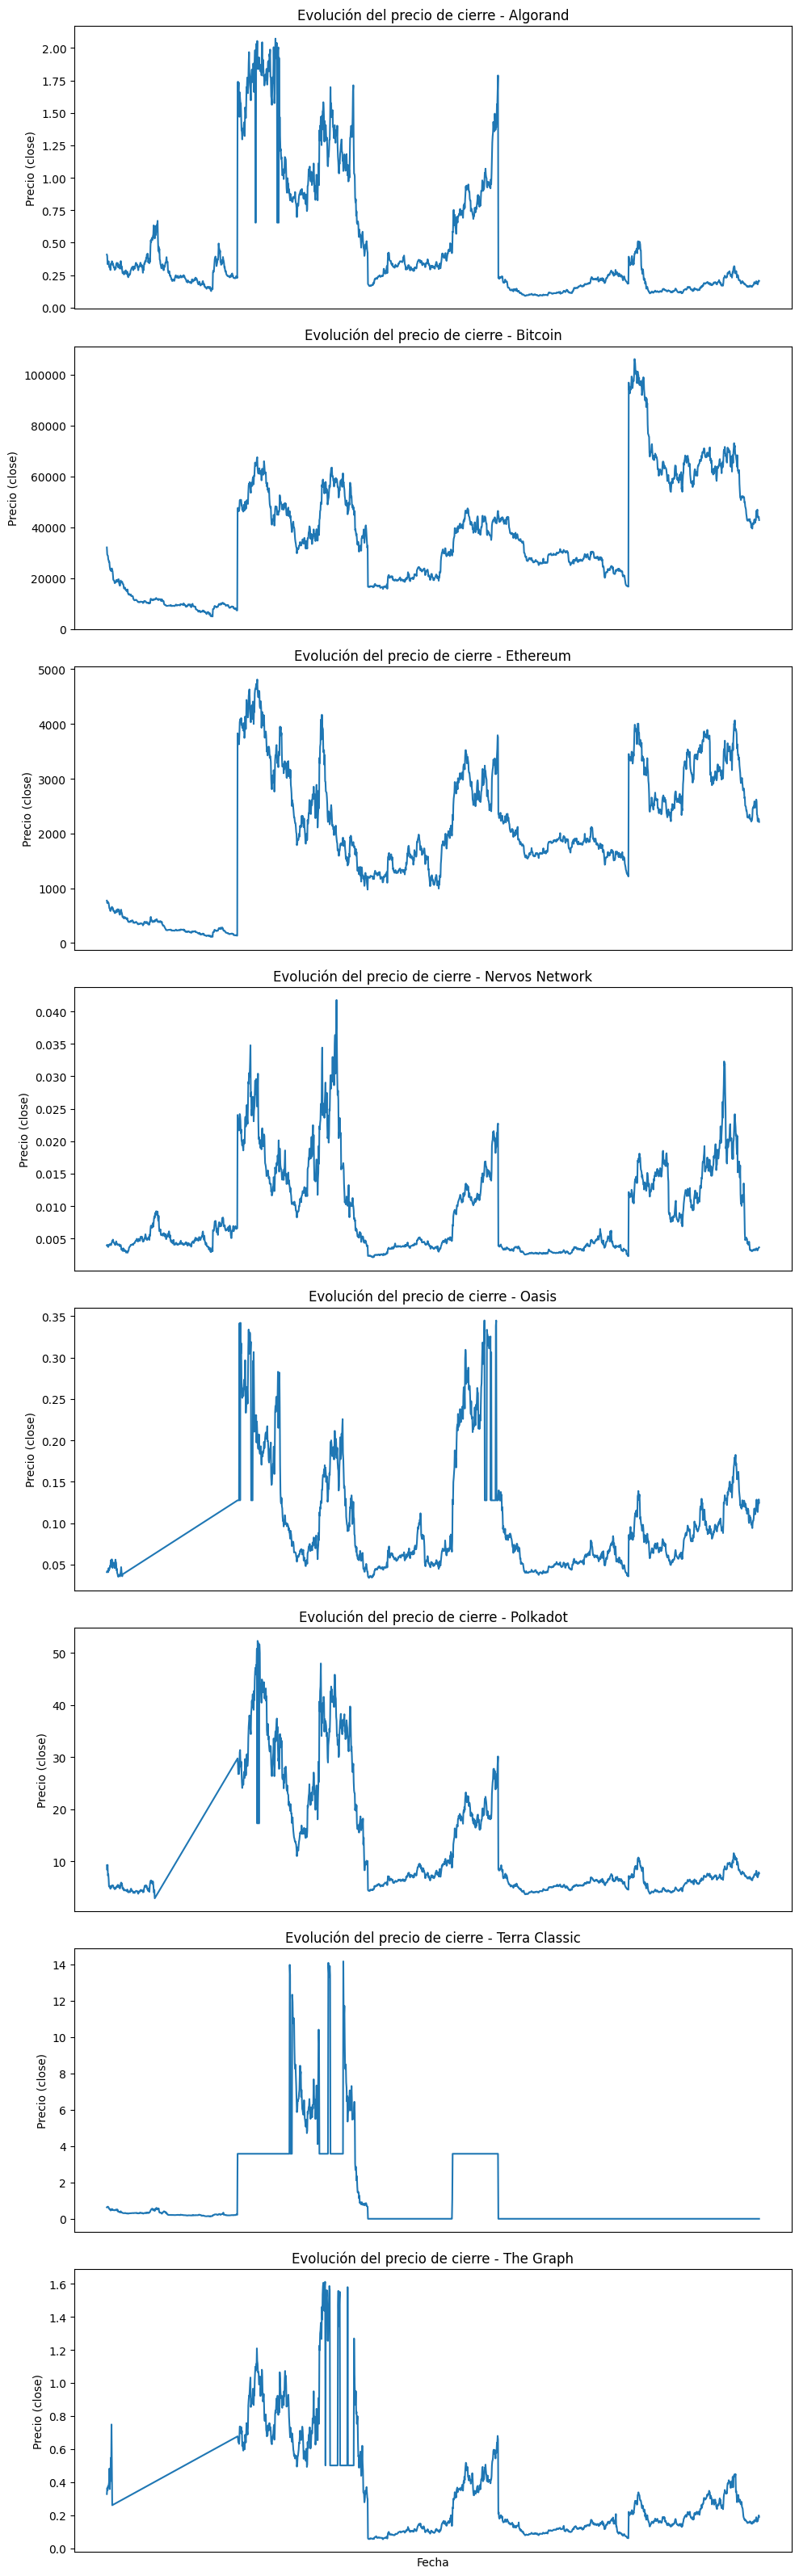

In [66]:
tokens_unicos = data_final["token"].unique()
n = len(tokens_unicos)
fig, axs = plt.subplots(nrows=n, figsize=(10, 4 * n), sharex=True)

for i, token in enumerate(tokens_unicos):
    ax = axs[i]
    sns.lineplot(data=data_final[data_final["token"] == token], x="timestamp", y="close", ax=ax)
    ax.set_title(f"Evolución del precio de cierre - {token}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio (close)")
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

plt.tight_layout()
plt.show()

En base a los gráficos generados para cada token, se puede observar que la evolución del precio a lo largo del tiempo presenta comportamientos distintos según el activo. Tokens como Bitcoin y Ethereum muestran una tendencia más prolongada con picos notables y caídas marcadas, reflejando momentos de alta especulación y ciclos de mercado. Por otro lado, tokens como Terra Classic o The Graph tienen trayectorias más inestables o marcadamente influenciadas por eventos específicos, como fuertes subidas seguidas de caídas abruptas.

¿Cómo se relacionan volumen y precio a lo largo del tiempo?

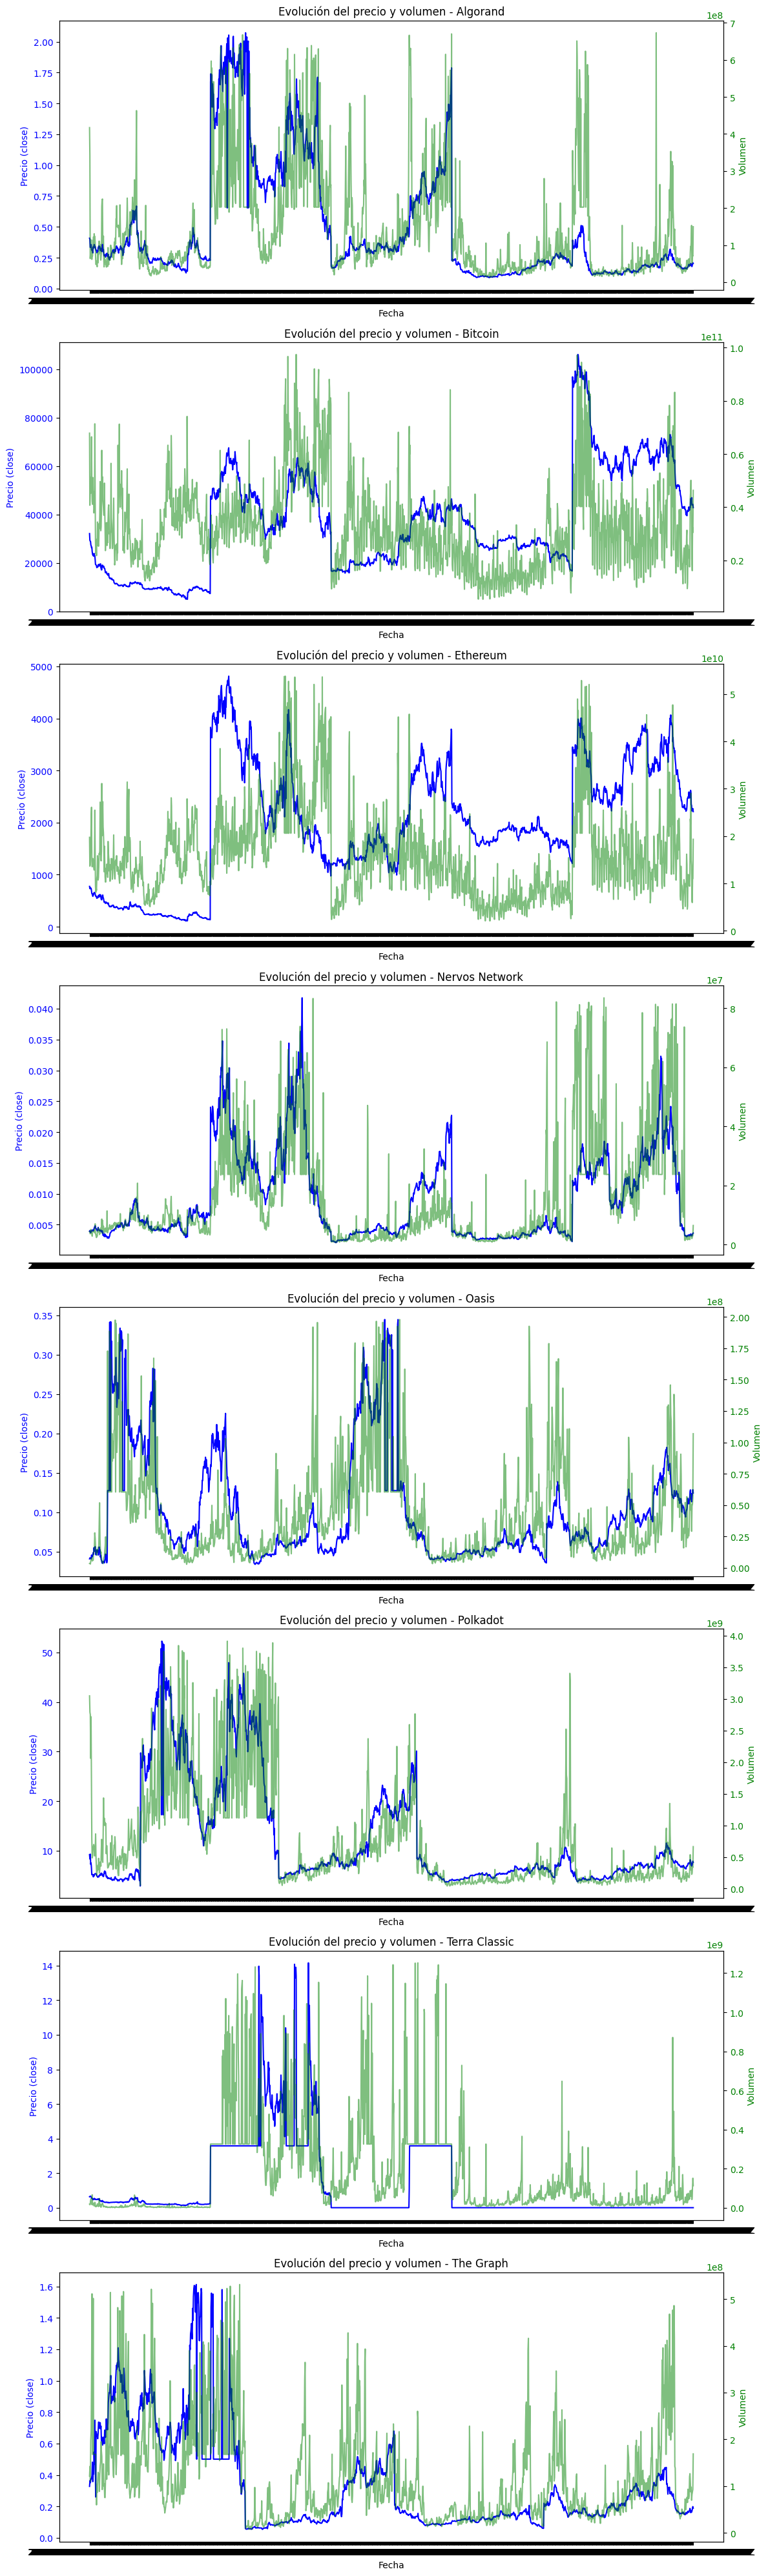

In [72]:
tokens_unicos = data_final["token"].unique()

n = len(tokens_unicos)
fig, axs = plt.subplots(nrows=n, figsize=(12, 5 * n))

for i, token in enumerate(tokens_unicos):
    df_token = data_final[data_final["token"] == token]
    ax1 = axs[i]

    ax1.set_title(f"Evolución del precio y volumen - {token}")
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio (close)", color="blue")
    ax1.plot(df_token["timestamp"], df_token["close"], color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Volumen", color="green")
    ax2.plot(df_token["timestamp"], df_token["volume"], color="green", alpha=0.5)
    ax2.tick_params(axis="y", labelcolor="green")

plt.tight_layout()
plt.show()


Con base en los gráficos, se observa que en la mayoría de tokens existe una relación positiva entre el precio y el volumen a lo largo del tiempo. Es decir, cuando el precio sube, también tiende a aumentar el volumen de transacciones, lo que sugiere mayor interés del mercado durante esos periodos. Sin embargo, esta relación no es perfectamente proporcional ni constante, ya que hay momentos donde el volumen se incrementa mientras el precio baja, lo que podría indicar ventas masivas o salidas de capital.

Balanceo: ¿Todos los tokens tienen similar cantidad de datos?

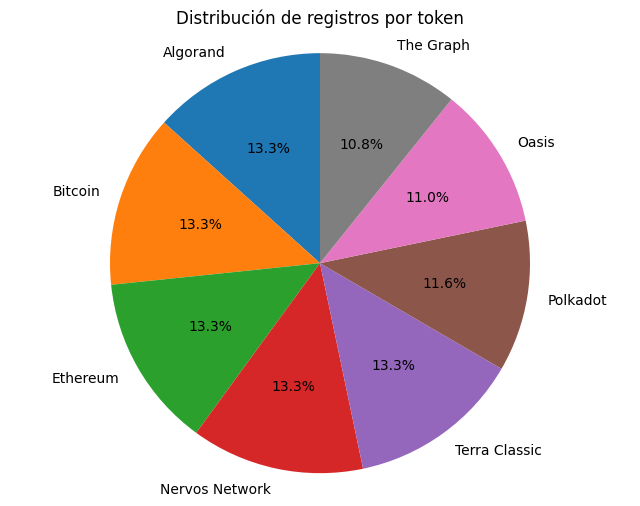

In [76]:
conteo_tokens = data_final['token'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(conteo_tokens, labels=conteo_tokens.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de registros por token")
plt.axis('equal')  
plt.show()


Al observar la distribución de registros por token, se nota que la mayoría cuenta con una proporción muy similar de datos, oscilando entre el 10.8% y el 13.3%. Esto sugiere que el conjunto de datos está bastante balanceado en cuanto a representación por token, lo cual es beneficioso para los análisis posteriores. Por ello, no fue necesario aplicar técnicas de balanceo como sobremuestreo o submuestreo.

# 3. Modelado

### Propuesta de Modelado Predictivo

---

#### Objetivos del Proyecto

Este proyecto tiene como objetivo desarrollar un modelo predictivo que permita anticipar la evolución futura de las principales criptomonedas incluidas en portafolios de inversión que hemos analizado anteriormente. Los objetivos específicos se dividen en dos ejes:

- **Objetivo 1**: Analizar los tokens más frecuentes en portafolios de inversión (como Ethereum, Bitcoin, Polkadot, Oasis y Nervos Network) e identificar si tienen alta probabilidad de incrementar su valorización actual.
- **Objetivo 2**: Evaluar tokens de baja capitalización que se repiten con frecuencia (como Terra Classic, The Graph, Algorand, Oasis y Nervos Network) y detectar si existe un potencial de crecimiento a corto o mediano plazo.

Estos análisis permitirán ofrecer información clave a traders y usuarios finales para tomar mejores decisiones de inversión.

---

#### Enfoque del Modelado: Predicción

Dado que nuestro objetivo principal es estimar la valorización futura de una criptomoneda, el enfoque del modelado será de regresión supervisada. En particular, se busca predecir el precio de cierre (close) de un token en los días futuros, utilizando como base su comportamiento histórico y otras variables asociadas como volume, marketCap y transformaciones estadísticas (volatilidad, retornos, tendencias, etc).

Este enfoque permitirá al usuario visualizar posibles escenarios de ganancia o pérdida y anticipar decisiones de compra/venta.

---

#### Técnicas de Modelado a Evaluar

Se evaluarán cinco técnicas de machine learning para modelos de regresión, con el fin de identificar cuál ofrece mejor rendimiento en precisión y generalización:

| Modelo                    | Justificación                                                                 |
|--------------------------|------------------------------------------------------------------------------|
| **1. Regresión Lineal**  | Sirve como punto de partida (baseline). Fácil de interpretar y de entrenar. |
| **2. Árboles de Decisión** | Capturan relaciones no lineales y permiten interpretar la importancia de variables. |
| **3. Random Forest**     | Ensamble robusto y preciso. Reduce el riesgo de sobreajuste.                 |
| **4. XGBoost / LightGBM** | Algoritmos de boosting muy eficientes, ideales para datasets tabulares con complejidad. |
| **5. Redes Neuronales (MLP)** | Útiles para capturar patrones complejos. Potencial si se quiere escalar el sistema. |

En todos los casos se aplicará optimización de hiperparámetros (GridSearch/RandomSearch) y validación cruzada para asegurar un buen rendimiento.

---

#### Enfoque por Token: Un Modelo por Criptomoneda

Cada criptomoneda (token) presenta escalas, comportamientos y niveles de volatilidad distintos. Por ello, se implementará la misma arquitectura de modelo, pero se entrenará y ajustará individualmente por token. Es decir, se tendrá un modelo específico para Bitcoin, otro para Ethereum, y así sucesivamente.

Esto permite capturar mejor los patrones particulares de cada activo y mejorar la precisión de las predicciones.

---

#### Producto Final: Plataforma de Análisis Predictivo

El resultado del proyecto será una aplicación interactiva que permita al usuario:

- **Seleccionar un token** (ej. Bitcoin) y visualizar:
  - Predicción de su precio para las próximas semanas.
  - Margen estimado de ganancia o pérdida si se invierte en él ahora.
  - Gráficas comparativas de evolución histórica.
- **Evaluar un portafolio personalizado**:
  - El usuario podrá ingresar una combinación de tokens y la aplicación le indicará si esa combinación muestra un potencial de crecimiento, usando la media ponderada de las predicciones por token.
  - Se podrá sugerir una recomendación (ej. "riesgo medio con tendencia positiva").

Este sistema busca ser una herramienta de apoyo para inversores, generando alertas y recomendaciones basadas en análisis real de datos.

---

#### Variables de Entrada al Modelo

Cada modelo usará como variables predictoras:

- Precio actual (close) y precios pasados (lag features)
- Indicadores técnicos: media móvil, retornos porcentuales, volatilidad
- Volumen y capitalización de mercado (volume, marketCap)
- Día/semana del año (factores estacionales)

---

En resumen, el proyecto plantea un sistema de modelado supervisado orientado a la predicción de precios de criptomonedas de forma individual, con el fin de brindar información útil y accionable al usuario sobre posibles rendimientos futuros. Este sistema podrá escalar a múltiples tokens, integrar portafolios personalizados, y ofrecer recomendaciones orientadas a decisiones de inversión más informadas.



# 4. Modelado

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [56]:
df = pd.read_csv("data_final.csv", sep=";")

Como se ha explicado anteriormente, entrenaremos los modelos diferenciando las criptomonedas a evaluar

## 4.1. Bitcoin

### 4.1.1. Selección del conjunto base para modelado

In [57]:
df_btc = df[df["token"] == "Bitcoin"].copy()
df_btc["close"] = pd.to_numeric(df_btc["close"], errors='coerce')
df_btc["volume"] = pd.to_numeric(df_btc["volume"], errors='coerce')
df_btc["marketCap"] = pd.to_numeric(df_btc["marketCap"], errors='coerce')
df_btc["timestamp"] = pd.to_datetime(df_btc["timestamp"], errors='coerce')
df_btc = df_btc.sort_values("timestamp")

In [58]:
df_btc.head()

timeOpen                         timeClose  \
2192  2020-01-03 00:00:00+00:00  2020-01-03 23:59:59.999000+00:00   
2191  2020-01-04 00:00:00+00:00  2020-01-04 23:59:59.999000+00:00   
2190  2020-01-05 00:00:00+00:00  2020-01-05 23:59:59.999000+00:00   
2189  2020-01-06 00:00:00+00:00  2020-01-06 23:59:59.999000+00:00   
2188  2020-01-07 00:00:00+00:00  2020-01-07 23:59:59.999000+00:00   

                       timeHigh                    timeLow        close  \
2192  2020-01-03 17:04:00+00:00  2020-01-03 02:10:01+00:00  7344.884183   
2191  2020-01-04 18:44:02+00:00  2020-01-04 00:39:02+00:00  7410.656566   
2190  2020-01-05 18:57:00+00:00  2020-01-05 23:18:00+00:00  7411.317327   
2189  2020-01-06 23:55:01+00:00  2020-01-06 00:05:01+00:00  7769.219039   
2188  2020-01-07 23:51:01+00:00  2020-01-07 00:01:01+00:00  8163.692239   

            volume     marketCap                        timestamp    token  
2192  2.811148e+10  1.332334e+11 2020-01-03 23:59:59.999000+00:00  Bitcoin  
2191  1.844427e+10  1.344425e+11 2020-01-04 23:59:59.999000+00:00  Bitcoin  
2190  1.972507e+10  1.344695e+11 2020-01-05 23:59:59.999000+00:00  Bitcoin  
2189  2.327626e+10  1.409765e+11 2020-01-06 23:59:59.999000+00:00  Bitcoin  
2188  2.876729e+10  1.481522e+11 2020-01-07 23:59:59.999000+00:00  Bitcoin

In [59]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 2192 to 3288
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   1827 non-null   object             
 1   timeClose  1827 non-null   object             
 2   timeHigh   1827 non-null   object             
 3   timeLow    1827 non-null   object             
 4   close      1827 non-null   float64            
 5   volume     1827 non-null   float64            
 6   marketCap  1827 non-null   float64            
 7   timestamp  1827 non-null   datetime64[ns, UTC]
 8   token      1827 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 142.7+ KB


### 4.1.2. Selección de variables predictoras y target

In [60]:
#shift(1) para usar el día anterior
X = df_btc[["close", "volume", "marketCap"]].shift(1)
y = df_btc["close"]

#se va a eliminar las primeras filas con NaN
X = X.iloc[1:]
y = y.iloc[1:]

### 4.1.3. División del conjunto en entrenamiento y prueba

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

### 4.1.4. Escalamiento de variables numéricas

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1460, 3), (366, 3), (1460,), (366,))

### 4.1.5. Aplicando Regresión Lineal

Modelo base de Regresión Lineal

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [66]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [67]:
y_pred_lr

array([ 44923.64771619,  42820.94243459,  44148.34598806,  44131.1380033 ,
        43958.44031822,  43912.4472448 ,  46929.19590897,  46101.28569173,
        46587.51841866,  46329.25235582,  42825.85252562,  42815.39919465,
        41772.88913803,  42486.07023977,  43126.8172313 ,  42715.96781437,
        41240.35945209,  41595.47388352,  41642.67059887,  41523.29794398,
        39491.53727984,  39828.58130317,  40059.39461867,  39916.65716745,
        41793.1803254 ,  42095.50601284,  42011.24651793,  43259.55275055,
        42925.0083645 ,  42556.24919778,  43047.76373557,  43157.4952455 ,
        42964.63512278,  42557.30493555,  42632.06623473,  43056.6278174 ,
        44285.88981862,  45265.78817124,  47104.91644929,  47727.15428432,
        48247.95393894,  49906.34532255,  49691.27291127,  51768.33387604,
        51879.80374109,  52100.81902416,  51605.40969764,  52063.40719629,
        51721.11786115,  52224.9403802 ,  51780.82355159,  51248.47720276,
        50677.45415476,  

In [68]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


In [69]:
metricas_base_lr = {
    "MAE": mae_lr,
    "MSE": mse_lr,
    "RMSE": rmse_lr,
    "R^2": r2_lr
}
metricas_base_lr

{'MAE': 1342.4107140621777,
 'MSE': 3511873.4229867617,
 'RMSE': np.float64(1873.9993124296395),
 'R^2': 0.9838340855939551}

El modelo alcanzó un MAE (Error Absoluto Medio) de aproximadamente 1342, lo que indica que en promedio, se equivoca en unos 1342 dólares por predicción diaria. Esto representa un nivel aceptable de error, considerando la magnitud del precio de Bitcoin.

El RMSE, que penaliza más los errores grandes, es de 1874. Esto sugiere que hay algunos días con errores más altos, lo que también se observa en el gráfico del error absoluto.

Finalmente, el R² de 0.98 indica que el modelo explica el 98% de la varianza del valor real, lo cual es muy alto. Sin embargo, este resultado debe interpretarse con cautela, ya que un modelo que se basa fuertemente en el valor del día anterior puede dar R² altos sin ser realmente robusto frente a cambios reales del mercado.

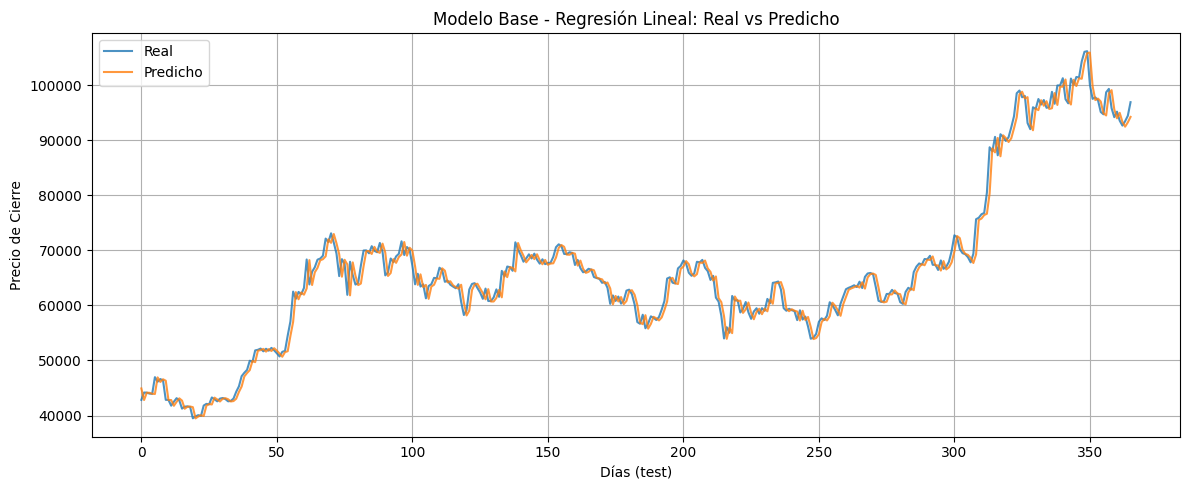

In [70]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real", alpha=0.8)
plt.plot(y_pred_lr, label="Predicho", alpha=0.8)
plt.title("Modelo Base - Regresión Lineal: Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Este modelo nos sirvio para ver como sigue la tendencia del valor.

El modelo base de regresión lineal predice valores que siguen muy de cerca la curva real, lo que a primera vista parece positivo. Sin embargo, esta precisión puede estar relacionada con una alta dependencia del valor de cierre del día anterior.

Este comportamiento sugiere un posible sobreajuste, ya que el modelo parece estar memorizando los datos más que generalizando. Al depender fuertemente de una sola variable correlacionada, pierde capacidad de adaptación ante cambios en la tendencia.

Por ello, es necesario validar su estabilidad con técnicas como la validación cruzada, que permitirán evaluar si el modelo puede mantenerse preciso frente a datos nuevos o escenarios menos predecibles.

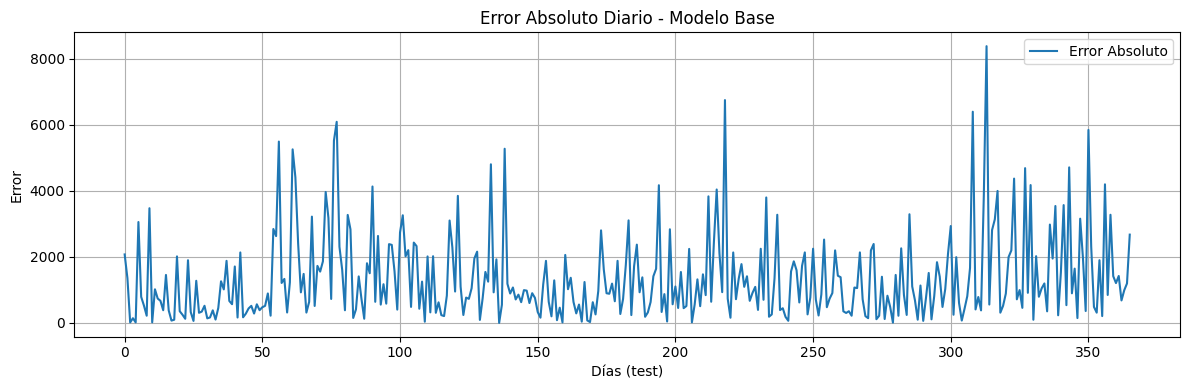

In [29]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(y_test.values - y_pred_lr), label="Error Absoluto")
plt.title("Error Absoluto Diario - Modelo Base")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Este grafico nos muestra como se equivoca el modelo cada día. Donde picos algos significal dias con mala prediccion.

Aunque el error diario se mantiene relativamente bajo en muchos puntos, existen varios picos notables, donde el modelo se aleja significativamente del valor real. Esto indica que hay días específicos en los que el modelo no logra capturar bien el comportamiento del mercado.

Los errores más altos tienden a aparecer en zonas de alta variabilidad o cambios abruptos en la tendencia del precio. Es probable que el modelo, al ser lineal y simple, no pueda adaptarse bien a estos movimientos bruscos.

Este patrón sugiere que, aunque el modelo generaliza bien en escenarios estables, su rendimiento se debilita frente a cambios repentinos, lo cual es común en criptomonedas. Validar y comparar con modelos más complejos ayudará a confirmar este hallazgo.

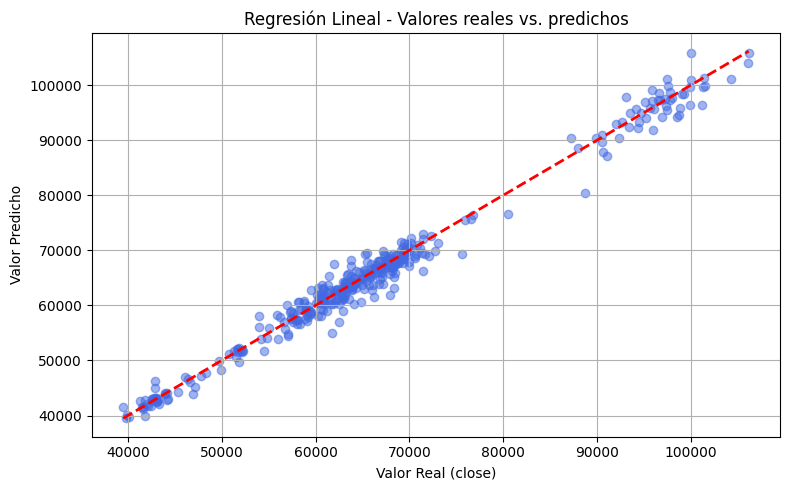

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.title("Regresión Lineal - Valores reales vs. predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

En este grafico podemos decir que cada punto es una predicion. Donde mientras mas puntos caigan sobre la lnea diagonas significa que es mas perfecteco. Es utili para sabes is hay algun sesgo 

La mayoría de los puntos se alinean de forma cercana a la diagonal roja (y = x), lo que indica que las predicciones tienden a ser bastante precisas en general. La forma alargada y alineada muestra una buena correlación entre los valores reales y los predichos.

Sin embargo, se observa una ligera dispersión alrededor de la línea, especialmente en los extremos, lo cual sugiere que el modelo tiene más dificultad para predecir con exactitud cuando el precio es muy bajo o muy alto.

En resumen, el modelo muestra un buen ajuste global, pero puede presentar errores mayores en valores atípicos o extremos. Esto refuerza la idea de que la regresión lineal puede funcionar como punto de partida, pero podría no ser suficiente en escenarios con alta variabilidad como el mercado cripto.

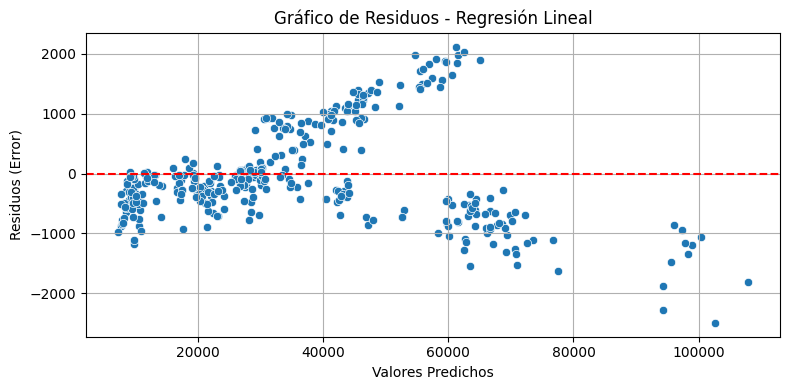

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

residuos = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Regresión Lineal")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico de residuos permite evaluar si los errores del modelo se distribuyen de forma aleatoria, lo que indicaría un buen ajuste.

En este caso, los residuos muestran un patrón curvo y no uniforme, lo que sugiere que la regresión lineal no logra capturar adecuadamente la relación entre las variables en todos los rangos de precio. Esto indica una posible no linealidad en los datos, y sugiere que un modelo más complejo podría mejorar el ajuste.

Regresión Lineal con Validación Cruzada

TimeSeriesSplit es una técnica de validación cruzada diseñada especialmente para datos secuenciales, como series temporales. A diferencia de la validación cruzada tradicional que mezcla aleatoriamente los datos, TimeSeriesSplit respeta el orden cronológico, dividiendo los datos en bloques donde cada conjunto de entrenamiento ocurre antes del conjunto de validación.

Lo utilizamos para simular un escenario más realista, donde el modelo se entrena con datos del pasado y se evalúa con datos futuros. Esto nos permite medir con mayor precisión la capacidad del modelo para generalizar en problemas donde el tiempo es una variable crítica.

In [73]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer

In [74]:
tscv = TimeSeriesSplit(n_splits=5)
lr = LinearRegression()

In [76]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
r2_scorer = make_scorer(r2_score)

mae_scores = cross_val_score(lr, X_train_scaled, y_train, cv=tscv, scoring=mae_scorer)
rmse_scores = cross_val_score(lr, X_train_scaled, y_train, cv=tscv, scoring=rmse_scorer)
r2_scores = cross_val_score(lr, X_train_scaled, y_train, cv=tscv, scoring=r2_scorer)

In [78]:
cv_results = {
    "MAE (promedio)": -np.mean(mae_scores),
    "RMSE (promedio)": -np.mean(rmse_scores),
    "R^2 (promedio)": np.mean(r2_scores)
}

cv_results

{'MAE (promedio)': np.float64(873.6796559202157),
 'RMSE (promedio)': np.float64(1260.330788714854),
 'R^2 (promedio)': np.float64(0.9794891406663586)}

In [79]:
lr_model_cv = LinearRegression()
lr_model_cv.fit(X_train_scaled, y_train)
y_pred_cv = lr_model_cv.predict(X_test_scaled)

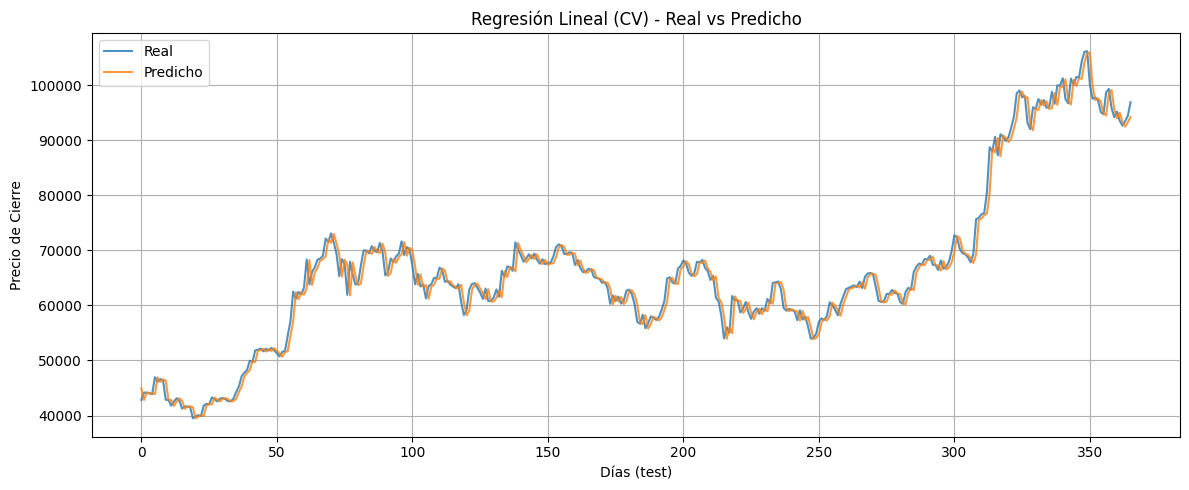

In [82]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real", alpha=0.8)
plt.plot(y_pred_cv, label="Predicho", alpha=0.8)
plt.title("Regresión Lineal (CV) - Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

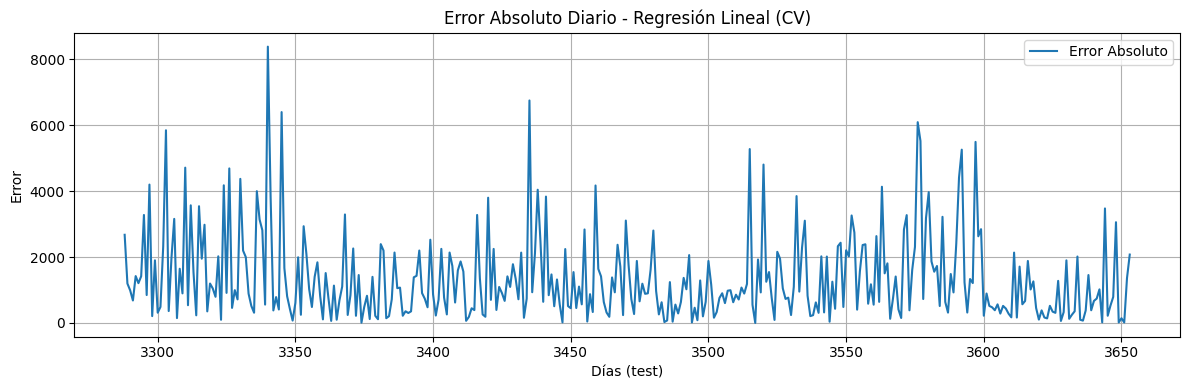

In [84]:
plt.figure(figsize=(12, 4))
residuos_cv = y_test - y_pred_cv
plt.plot(np.abs(residuos_cv), label="Error Absoluto")
plt.title("Error Absoluto Diario - Regresión Lineal (CV)")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

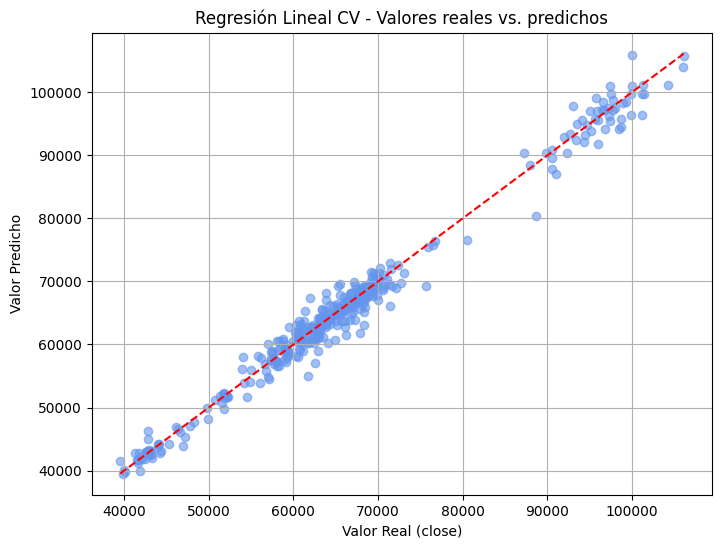

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cv, color='cornflowerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Regresión Lineal CV - Valores reales vs. predichos")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.show()

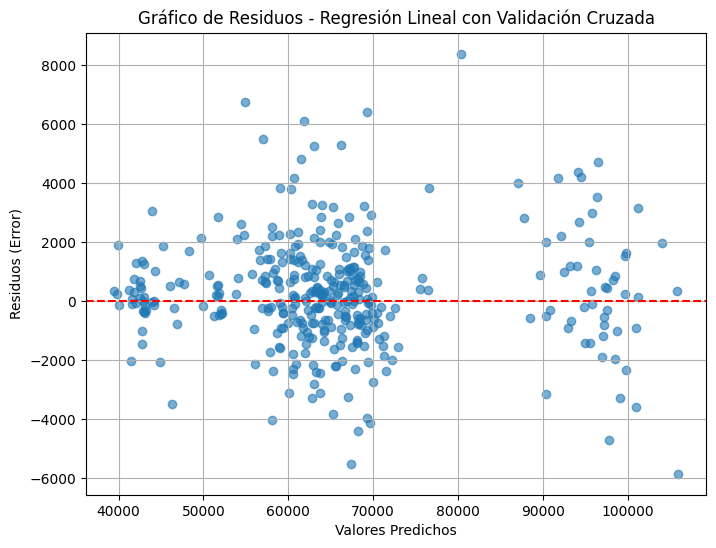

In [81]:
residuos_cv = y_test - y_pred_cv
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_cv, residuos_cv, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Regresión Lineal con Validación Cruzada")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.show()


Regresión Lineal con Regularización (Ridge y Lasso)

In [85]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [86]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [87]:
lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [88]:
{
    "Predicciones Ridge (primeros 5)": y_pred_ridge[:5],
    "Predicciones Lasso (primeros 5)": y_pred_lasso[:5]
}

{'Predicciones Ridge (primeros 5)': array([45461.07338581, 43387.80922984, 44615.77915929, 44612.59441273,
        44322.40066346]),
 'Predicciones Lasso (primeros 5)': array([44927.07185747, 42824.53903996, 44151.33686447, 44134.21514265,
        43960.79444746])}

In [89]:
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [90]:
results_ridge = calcular_metricas(y_test, y_pred_ridge)
results_lasso = calcular_metricas(y_test, y_pred_lasso)

In [91]:
results_ridge, results_lasso

({'MAE': 1481.109171906572,
  'MSE': 3925261.1154452986,
  'RMSE': np.float64(1981.2271741133823),
  'R2': 0.9819311724624468},
 {'MAE': 1341.9228898238416,
  'MSE': 3508921.805054542,
  'RMSE': np.float64(1873.211628475155),
  'R2': 0.9838476725309271})

In [92]:
residuos_ridge = y_test - y_pred_ridge
residuos_lasso = y_test - y_pred_lasso

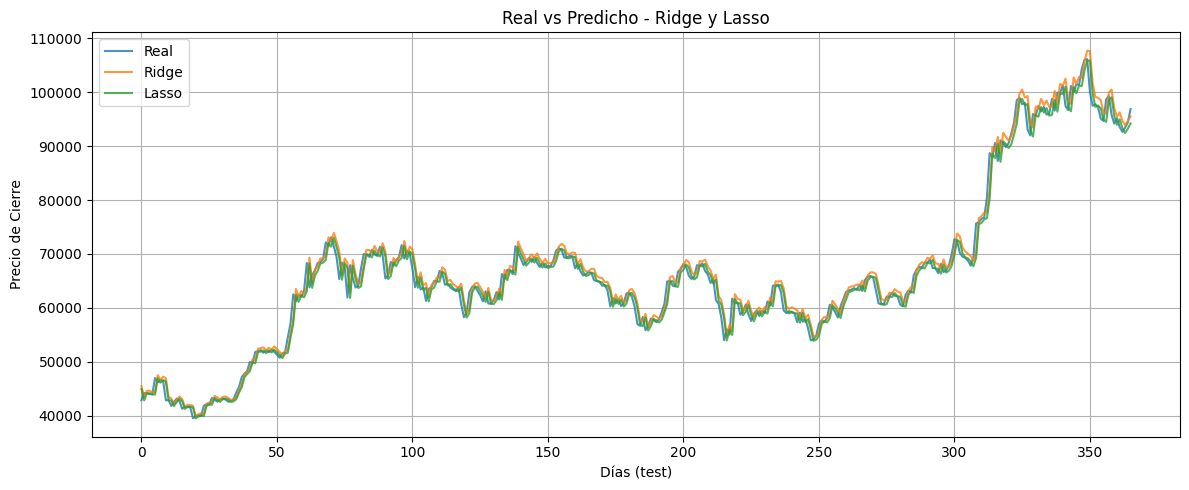

In [93]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real", alpha=0.8)
plt.plot(y_pred_ridge, label="Ridge", alpha=0.8)
plt.plot(y_pred_lasso, label="Lasso", alpha=0.8)
plt.title("Real vs Predicho - Ridge y Lasso")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

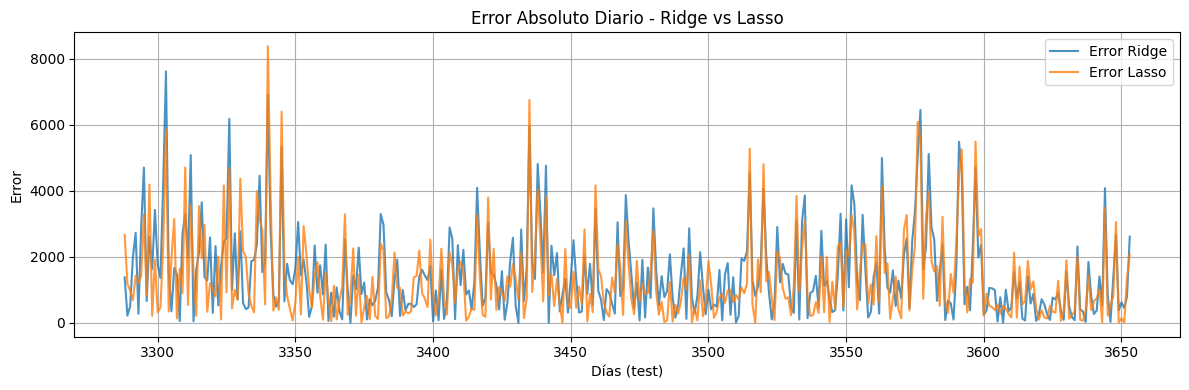

In [94]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_ridge), label="Error Ridge", alpha=0.8)
plt.plot(np.abs(residuos_lasso), label="Error Lasso", alpha=0.8)
plt.title("Error Absoluto Diario - Ridge vs Lasso")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

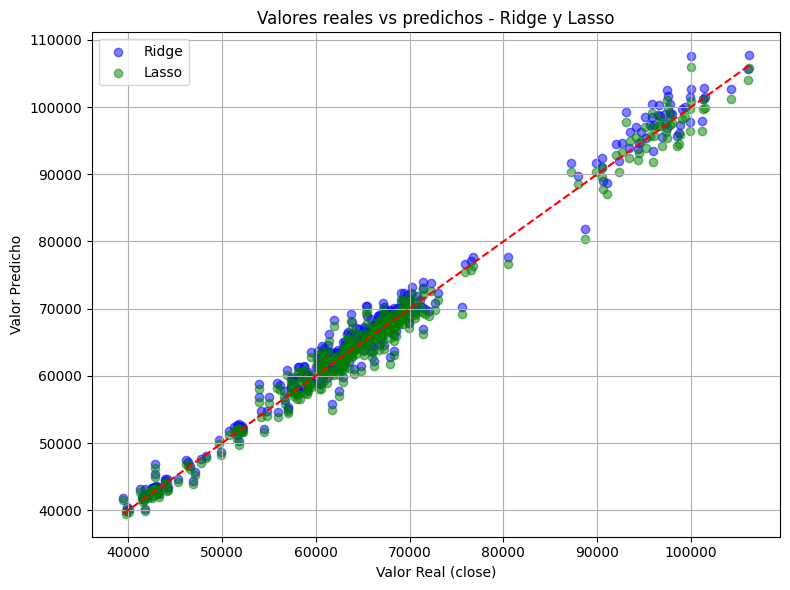

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5, label="Ridge")
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.5, label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Valores reales vs predichos - Ridge y Lasso")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

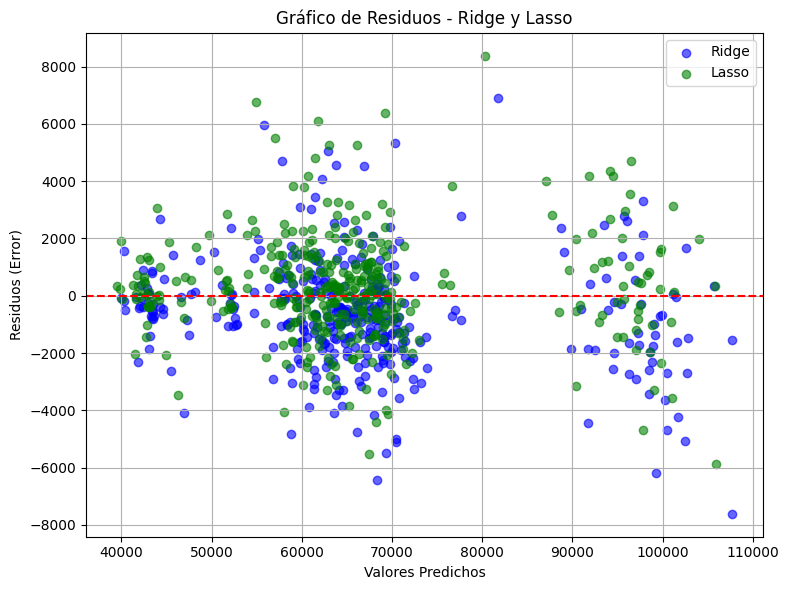

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ridge, residuos_ridge, alpha=0.6, label="Ridge", color='blue')
plt.scatter(y_pred_lasso, residuos_lasso, alpha=0.6, label="Lasso", color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Ridge y Lasso")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Comparacion de Resultados

In [97]:
metricas_totales = {
    "Regresión Lineal": metricas_base_lr,
    "Regresión Lineal (CV)": cv_results,
    "Ridge": results_ridge,
    "Lasso": results_lasso
}

for modelo, metricas in metricas_totales.items():
    print(f"\n{modelo}")
    for k, v in metricas.items():
        print(f"{k}: {v:.14f}")


Regresión Lineal
MAE: 1342.41071406217770
MSE: 3511873.42298676166683
RMSE: 1873.99931242963953
R^2: 0.98383408559396

Regresión Lineal (CV)
MAE (promedio): 873.67965592021574
RMSE (promedio): 1260.33078871485395
R^2 (promedio): 0.97948914066636

Ridge
MAE: 1481.10917190657210
MSE: 3925261.11544529860839
RMSE: 1981.22717411338226
R2: 0.98193117246245

Lasso
MAE: 1341.92288982384161
MSE: 3508921.80505454214290
RMSE: 1873.21162847515507
R2: 0.98384767253093


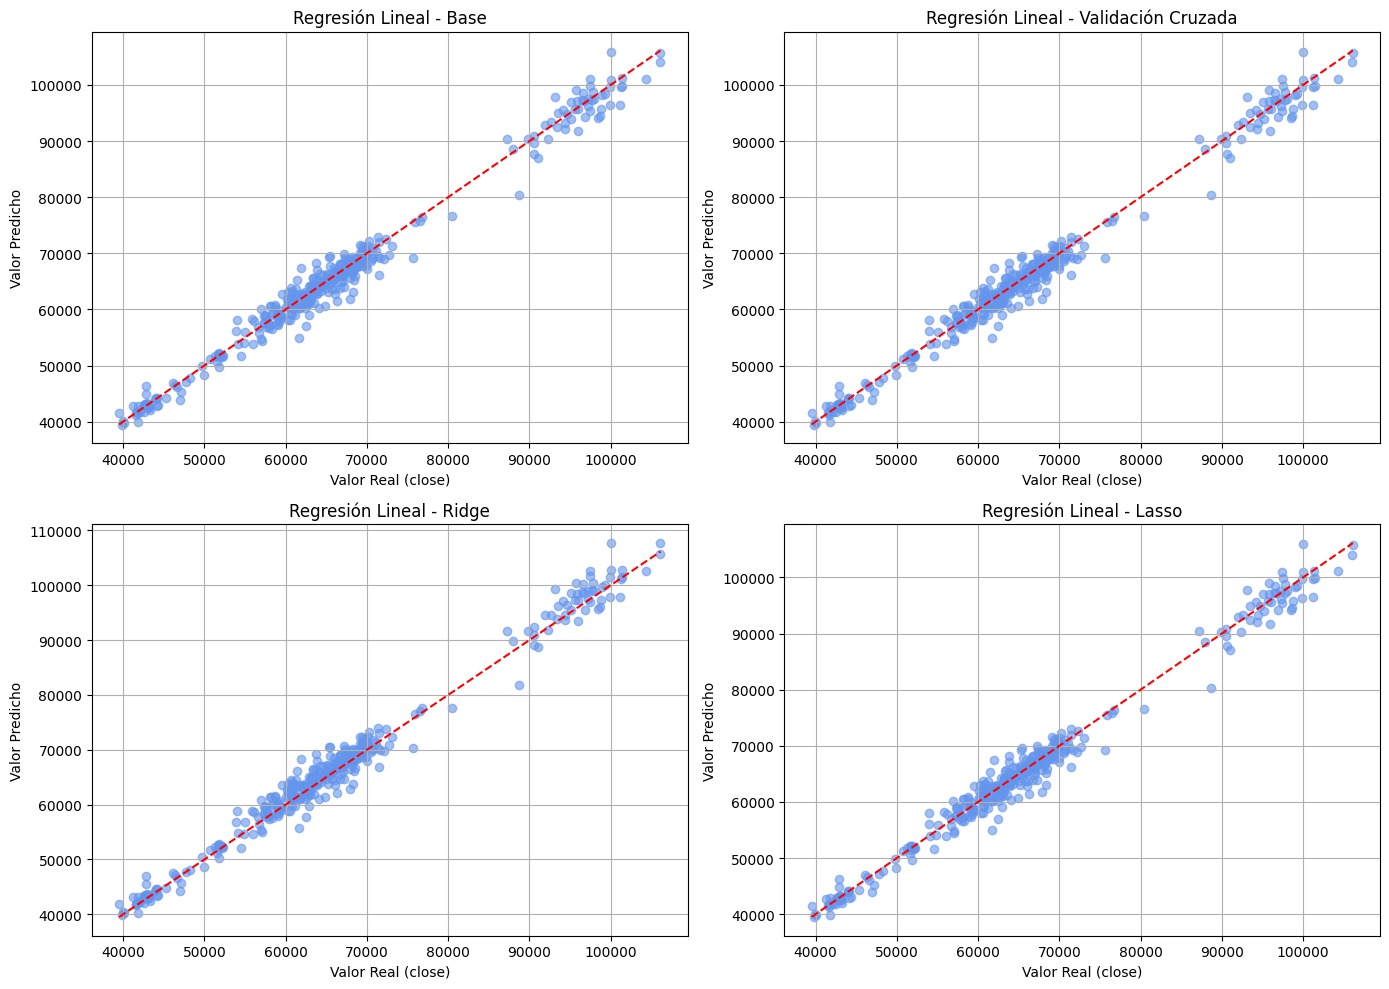

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

titulos = [
    "Regresión Lineal - Base",
    "Regresión Lineal - Validación Cruzada",
    "Regresión Lineal - Ridge",
    "Regresión Lineal - Lasso"
]

predicciones = [
    y_pred_lr,
    y_pred_cv,
    y_pred_ridge,
    y_pred_lasso
]

ejes = axs.ravel()

for i in range(4):
    ejes[i].scatter(y_test, predicciones[i], alpha=0.6, color="cornflowerblue")
    ejes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ejes[i].set_title(titulos[i])
    ejes[i].set_xlabel("Valor Real (close)")
    ejes[i].set_ylabel("Valor Predicho")
    ejes[i].grid(True)

plt.tight_layout()
plt.show()

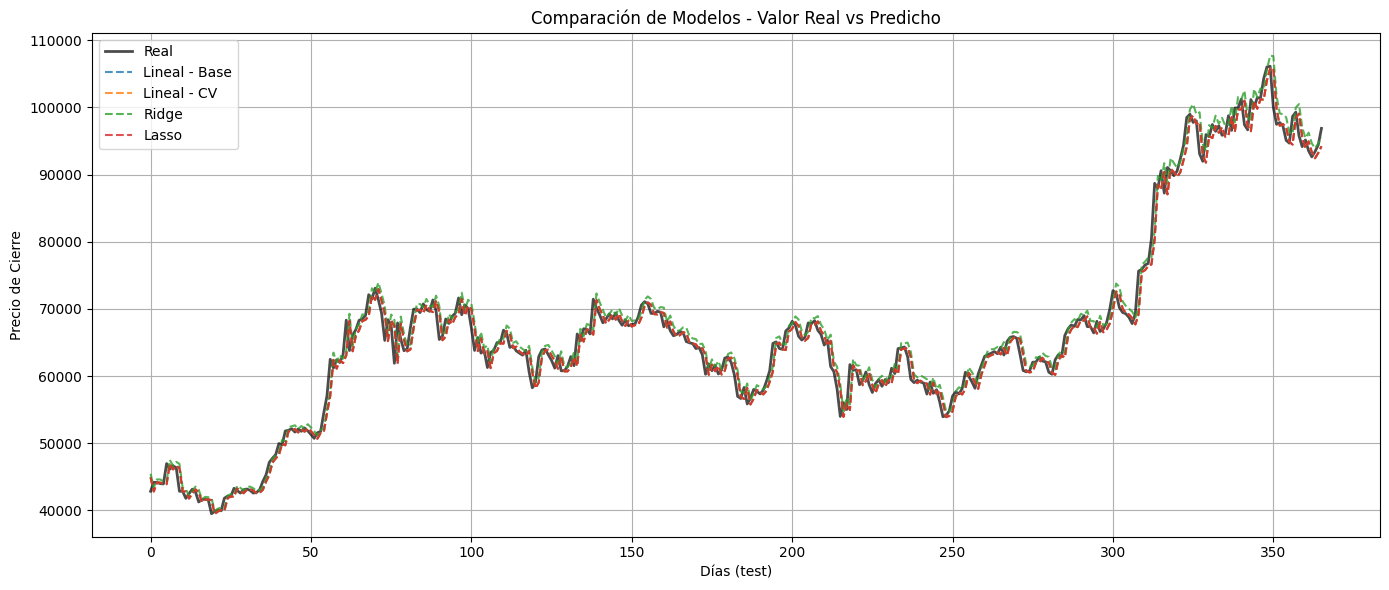

In [99]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Real", color='black', linewidth=2, alpha=0.7)
plt.plot(y_pred_lr, label="Lineal - Base", linestyle='--', alpha=0.8)
plt.plot(y_pred_cv, label="Lineal - CV", linestyle='--', alpha=0.8)
plt.plot(y_pred_ridge, label="Ridge", linestyle='--', alpha=0.8)
plt.plot(y_pred_lasso, label="Lasso", linestyle='--', alpha=0.8)

plt.title("Comparación de Modelos - Valor Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Resultados

In [ ]:
#preprocesamiento
data_tokens = pd.read_csv("bitcoin-prueba.csv", sep=";")

fechas = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]
for col in fechas:
    data_tokens[col] = pd.to_datetime(data_tokens[col], errors='coerce')

def reemplazar_outliers(df, columnas):
    df = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 3 * IQR
        limite_superior = Q3 + 3 * IQR
        df.loc[df[col] < limite_inferior, col] = Q1
        df.loc[df[col] > limite_superior, col] = Q3
    return df

columnas_outliers = ["open", "high", "low", "close", "volume", "marketCap"]
data_tokens_clean = reemplazar_outliers(data_tokens, columnas_outliers)

In [114]:
#entrenamiento en base a ese dataset
btc_data_input = data_tokens_clean[["close", "volume", "marketCap", "timestamp"]].sort_values("timestamp").reset_index(drop=True)

#usar solo el último día como input (como hacíamos con shift(1))
last_row = btc_data_input[["close", "volume", "marketCap"]].iloc[-1:]

scaler = StandardScaler()
scaler.fit(X_train)  # usar entrenamiento original
X_input = scaler.transform(last_row)

dias_pred = 7
predicciones_rangos = {
    "lr_model": [],
    "lr_model_cv": [],
    "ridge_model": [],
    "lasso_model": []
}

current_input = last_row.copy()

for _ in range(dias_pred):
    x_scaled = scaler.transform(current_input)

    predicciones_rangos["lr_model"].append(lr_model.predict(x_scaled)[0])
    predicciones_rangos["lr_model_cv"].append(lr_model_cv.predict(x_scaled)[0])
    predicciones_rangos["ridge_model"].append(ridge_model.predict(x_scaled)[0])
    predicciones_rangos["lasso_model"].append(lasso_model.predict(x_scaled)[0])

    #Actualizar el input para el siguiente día con la predicción de 'close' del modelo base
    current_input = current_input.copy()
    current_input["close"] = predicciones_rangos["lr_model"][-1]

ultima_fecha = btc_data_input["timestamp"].max()

fechas_pred = [ultima_fecha + pd.Timedelta(days=i) for i in range(1, dias_pred + 1)]

resultados_futuros = pd.DataFrame({
    "Fecha": fechas_pred,
    "lr_model": predicciones_rangos["lr_model"],
    "lr_model_cv": predicciones_rangos["lr_model_cv"],
    "ridge_model": predicciones_rangos["ridge_model"],
    "lasso_model": predicciones_rangos["lasso_model"]
})

resultados_futuros

Fecha       lr_model    lr_model_cv  \
0 2025-07-04 23:59:59.999000+00:00  109383.218508  109383.218508   
1 2025-07-05 23:59:59.999000+00:00  109117.824315  109117.824315   
2 2025-07-06 23:59:59.999000+00:00  108851.794679  108851.794679   
3 2025-07-07 23:59:59.999000+00:00  108585.128076  108585.128076   
4 2025-07-08 23:59:59.999000+00:00  108317.822983  108317.822983   
5 2025-07-09 23:59:59.999000+00:00  108049.877870  108049.877870   
6 2025-07-10 23:59:59.999000+00:00  107781.291205  107781.291205   

     ridge_model    lasso_model  
0  111237.492798  109395.103034  
1  111061.424782  109130.272563  
2  110884.935199  108864.807997  
3  110708.023039  108598.707818  
4  110530.687292  108331.970505  
5  110352.926942  108064.594532  
6  110174.740973  107796.578369

### 4.1.5. Aplicando Random Forest

Modelo base de Random Forest

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [116]:
rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)

In [118]:
mae_rf = mean_absolute_error(y_test, y_pred_rf_base)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_base))
r2_rf = r2_score(y_test, y_pred_rf_base)

In [119]:
results_rf_base = {
    "MAE": mae_rf,
    "RMSE": rmse_rf,
    "R^2": r2_rf
}
results_rf_base


{'MAE': 6339.114442585435,
 'RMSE': np.float64(12060.09508054027),
 'R^2': 0.3304810340703698}

El modelo obtuvo un MAE de 6,339, un RMSE de 12,060 y un R² de 0.33.
Estos resultados indican que el modelo comete errores considerables al predecir el precio de cierre y solo explica el 33% de la variabilidad del mercado.

No se evidencia overfitting, pero el rendimiento sugiere un posible subajuste, probablemente debido a la falta de ajuste de hiperparámetros o la simplicidad de las variables utilizadas.

Estas métricas reflejan una alta capacidad predictiva, destacando el bajo error absoluto y cuadrático medio, así como un coeficiente de determinación prácticamente perfecto.

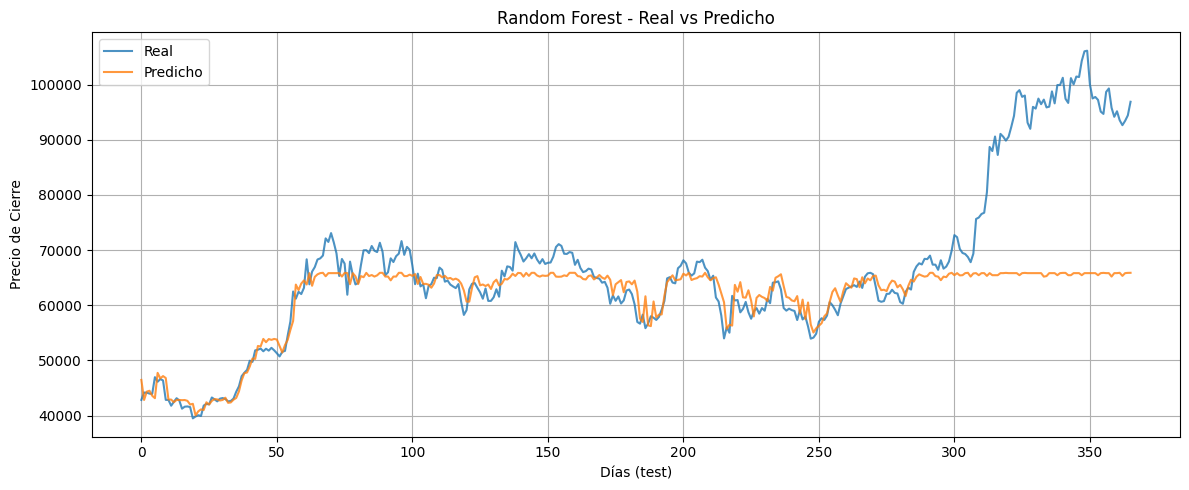

In [120]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real", alpha=0.8)
plt.plot(y_pred_rf_base, label="Predicho", alpha=0.8)
plt.title("Random Forest - Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El modelo sigue parcialmente la tendencia general del precio, pero tiene dificultades para adaptarse a cambios abruptos y zonas de alta volatilidad.
Se observa que en los tramos finales las predicciones se vuelven casi planas, indicando que el modelo deja de responder a la variabilidad real.
Esto refuerza la idea de que el modelo está subajustado y requiere mejoras en su configuración.

El gráfico de Valores Reales vs. Predichos muestra una alineación casi perfecta entre ambos, evidenciada por la cercanía de los puntos a la línea roja de referencia. Esto indica que el modelo captura con precisión la tendencia general del precio.

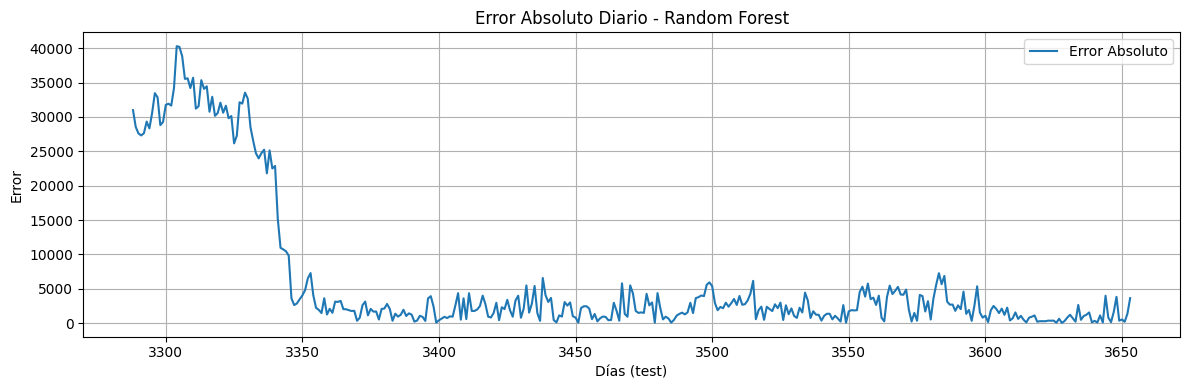

In [121]:
residuos_rf = y_test - y_pred_rf_base
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_rf), label="Error Absoluto")
plt.title("Error Absoluto Diario - Random Forest")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico muestra un error elevado al inicio del período de prueba, superando los 30,000 dólares en algunos días, lo que indica una falla importante en capturar eventos abruptos.
Conforme avanza el tiempo, el error disminuye y se mantiene más estable, pero sin llegar a valores bajos.
Esto sugiere que el modelo mejora en escenarios estables, pero no responde bien ante cambios bruscos en el mercado.



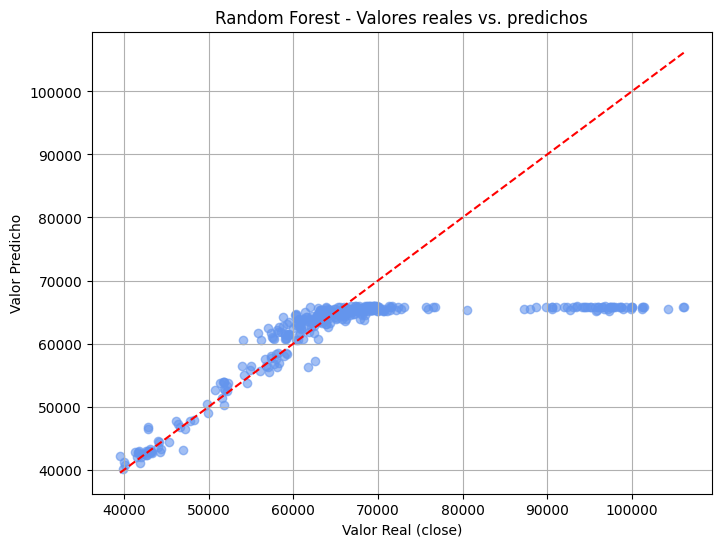

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_base, color='cornflowerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest - Valores reales vs. predichos")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.show()

El gráfico muestra una acumulación de predicciones en un rango limitado, especialmente por debajo de los 70,000 dólares, incluso cuando los valores reales superan los 100,000.
Esto indica que el modelo tiende a subestimar valores altos y pierde capacidad predictiva en escenarios extremos.
La dispersión fuera de la diagonal roja revela que el ajuste no es uniforme a lo largo del rango de precios.

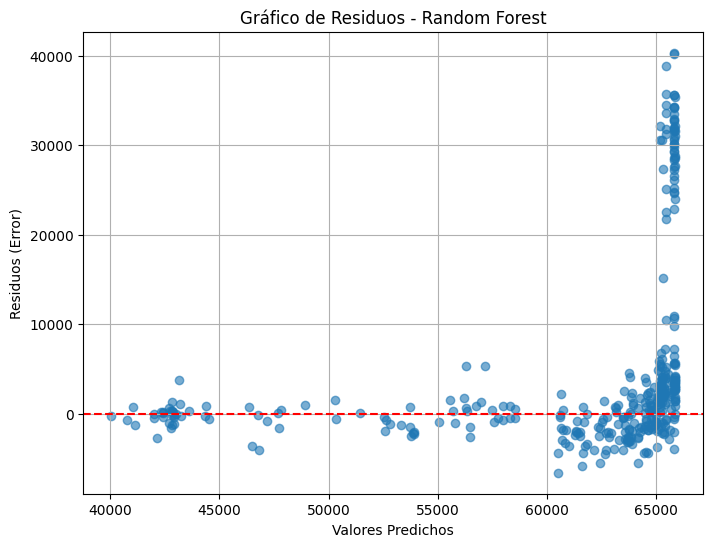

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_base, residuos_rf, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Random Forest")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.show()

Los residuos muestran una fuerte concentración en valores predichos cercanos a 65,000, con errores que superan los 40,000.
Esto indica que el modelo tiende a repetir predicciones en un rango estrecho, sin captar la variabilidad del mercado.
Además, la dispersión creciente sugiere que el error aumenta en escenarios de mayor complejidad o volatilidad.

Random Forest con Validación Cruzada


In [128]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [131]:
tscv = TimeSeriesSplit(n_splits=5)
model_rf_cv = RandomForestRegressor(random_state=42)

In [132]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [133]:
mae_scores = cross_val_score(model_rf_cv, X_train, y_train, cv=tscv, scoring=mae_scorer)
rmse_scores = cross_val_score(model_rf_cv, X_train, y_train, cv=tscv, scoring=rmse_scorer)
r2_scores = cross_val_score(model_rf_cv, X_train, y_train, cv=tscv, scoring=r2_scorer)

In [135]:
results_rf_cv = {
    "MAE": -np.mean(mae_scores),
    "RMSE": -np.mean(rmse_scores),
    "R^2": np.mean(r2_scores)
}
results_rf_cv 

{'MAE': np.float64(5164.460381804232),
 'RMSE': np.float64(6785.185191293616),
 'R^2': np.float64(0.5041034622856232)}

El modelo mejora considerablemente frente al modelo base. Ahora explica aproximadamente el 50% de la variabilidad del precio de cierre del Bitcoin.

In [136]:
model_rf_cv.fit(X_train, y_train)
y_pred_rf_cv = model_rf_cv.predict(X_test)
y_test_rf_cv = y_test.copy()
residuos_rf_cv = y_test_rf_cv - y_pred_rf_cv

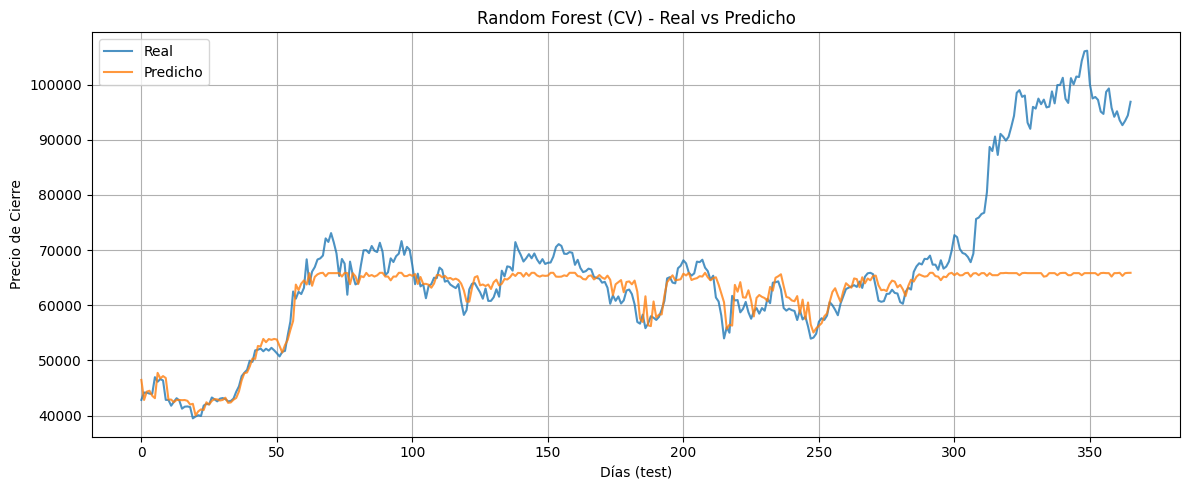

In [137]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_rf_cv.values, label="Real", alpha=0.8)
plt.plot(y_pred_rf_cv, label="Predicho", alpha=0.8)
plt.title("Random Forest (CV) - Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

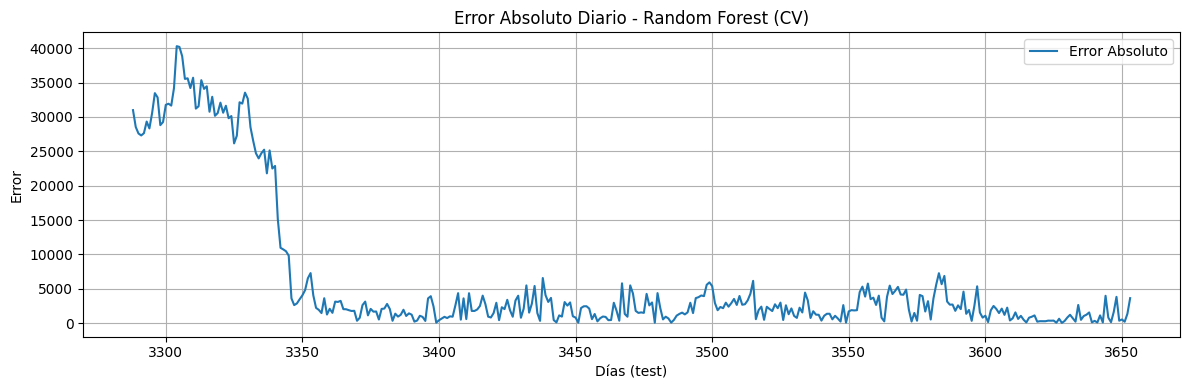

In [138]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_rf_cv), label="Error Absoluto")
plt.title("Error Absoluto Diario - Random Forest (CV)")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

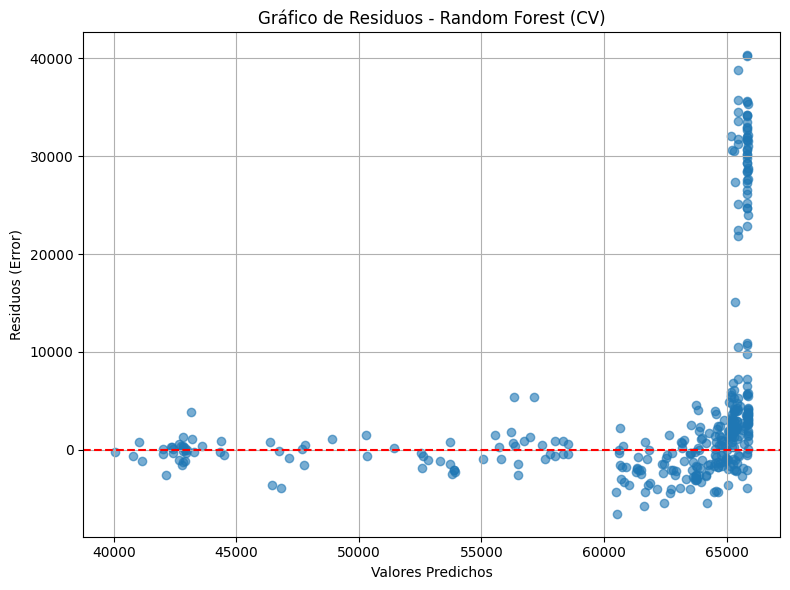

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_cv, residuos_rf_cv, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Random Forest (CV)")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.tight_layout()
plt.show()

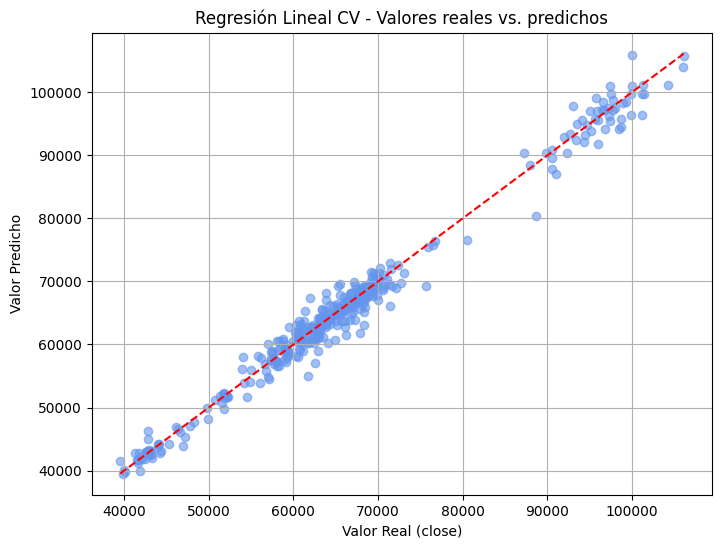

In [164]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cv, color='cornflowerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Regresión Lineal CV - Valores reales vs. predichos")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.show()

Random Forest con Optimizacion

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [153]:
param_dist_opt = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

In [ ]:
rf_base_model = RandomForestRegressor(random_state=42)

In [155]:
random_search_rf_opt = RandomizedSearchCV(
    estimator=rf_base_model,
    param_distributions=param_dist_opt,
    n_iter=25,
    cv=TimeSeriesSplit(n_splits=5),
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=1  
)

In [156]:
random_search_rf_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(random_state=42), n_iter=25,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [158]:
rf_optimized = random_search_rf_opt.best_estimator_
y_pred_rf_opt = rf_optimized.predict(X_test)
residuos_rf_opt = y_test - y_pred_rf_opt


In [160]:
results_rf_opt = {
    "MAE": mean_absolute_error(y_test, y_pred_rf_opt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf_opt)),
    "R^2": r2_score(y_test, y_pred_rf_opt)
}

results_rf_opt

{'MAE': 7431.149841586317,
 'RMSE': np.float64(13155.559205422645),
 'R^2': 0.20332709411547145}

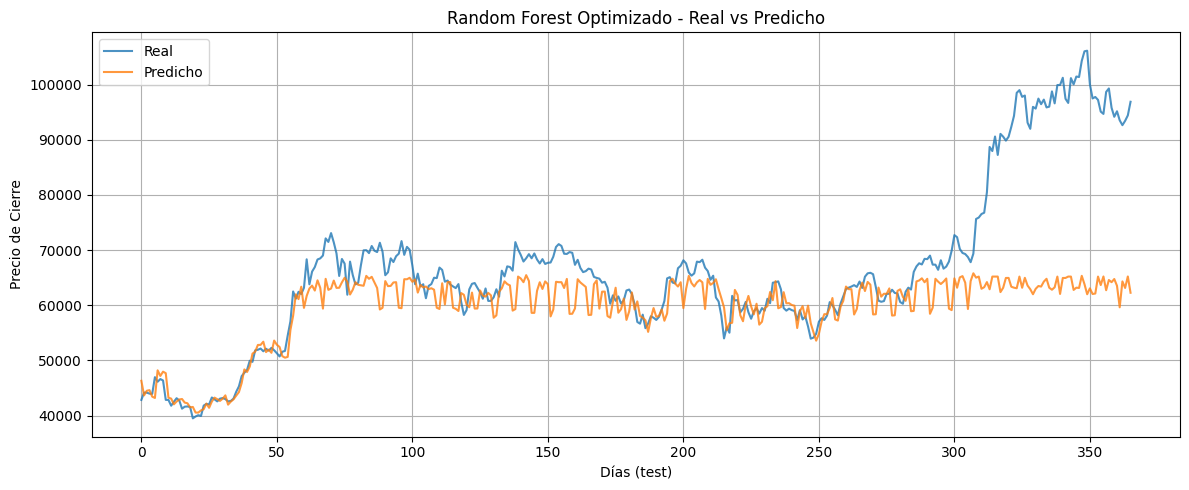

In [149]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Real", alpha=0.8)
plt.plot(y_pred_rf_opt, label="Predicho", alpha=0.8)
plt.title("Random Forest Optimizado - Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

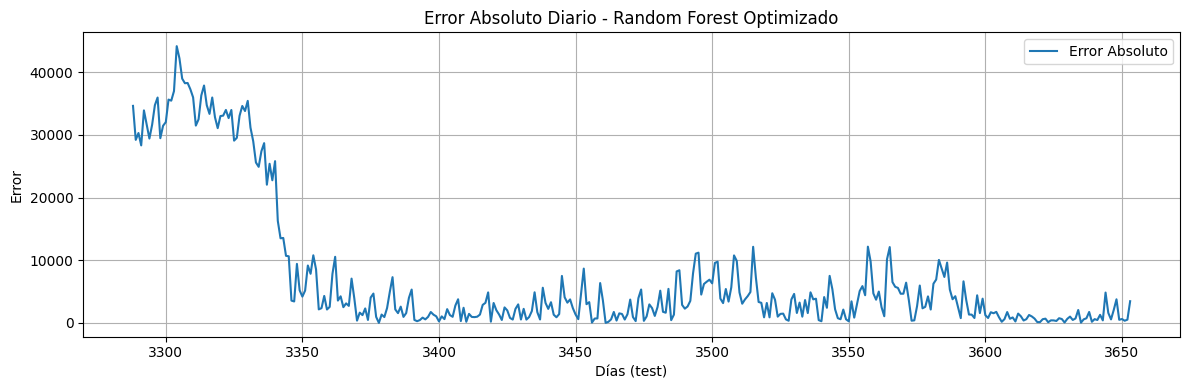

In [150]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_rf_opt), label="Error Absoluto")
plt.title("Error Absoluto Diario - Random Forest Optimizado")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

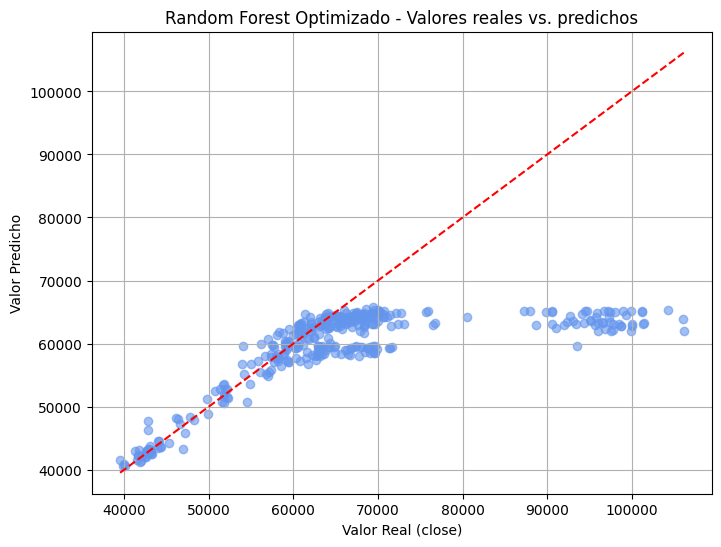

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_opt, color='cornflowerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Random Forest Optimizado - Valores reales vs. predichos")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.show()

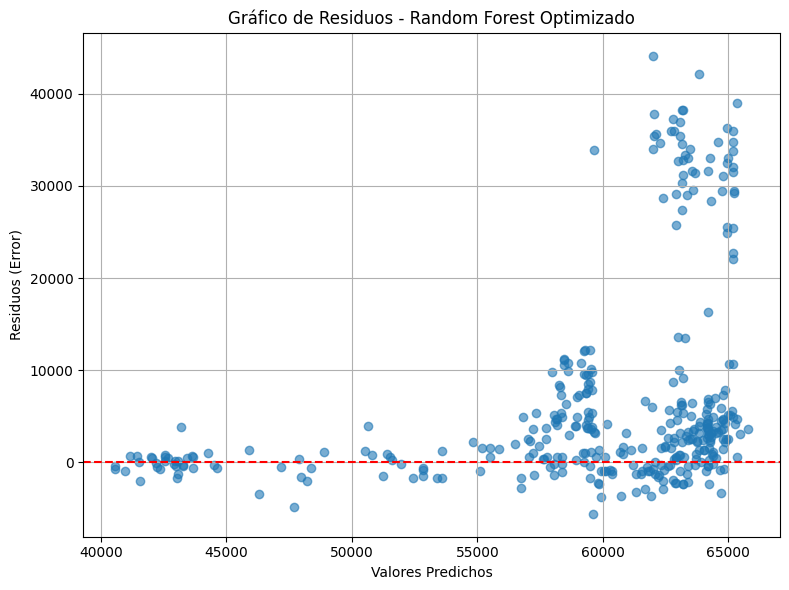

In [152]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_opt, residuos_rf_opt, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - Random Forest Optimizado")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.tight_layout()
plt.show()

Comparacion de Resultados

In [161]:
metricas_rf = {
    "Random Forest (Base)": results_rf_base,
    "Random Forest (CV)": results_rf_cv,
    "Random Forest (Optimizado)": results_rf_opt
}

for modelo, metricas in metricas_rf.items():
    print(f"\n{modelo}")
    for k, v in metricas.items():
        print(f"{k}: {v:.14f}")



Random Forest (Base)
MAE: 6339.11444258543543
RMSE: 12060.09508054026992
R^2: 0.33048103407037

Random Forest (CV)
MAE: 5164.46038180423238
RMSE: 6785.18519129361630
R^2: 0.50410346228562

Random Forest (Optimizado)
MAE: 7431.14984158631705
RMSE: 13155.55920542264539
R^2: 0.20332709411547


El modelo con validación cruzada obtuvo los mejores resultados, con un MAE de 5,164 y un R² de 0.50, mostrando una mejora clara respecto al modelo base.
El modelo optimizado, a pesar de usar búsqueda de hiperparámetros, no logró mejorar el desempeño; obtuvo un MAE más alto (7,431) y un R² menor (0.20), lo que indica posible sobreajuste a ciertos patrones del conjunto de entrenamiento.
En conjunto, estos resultados demuestran que la validación cruzada fue más efectiva para generalizar el comportamiento del mercado en comparación con la optimización directa.



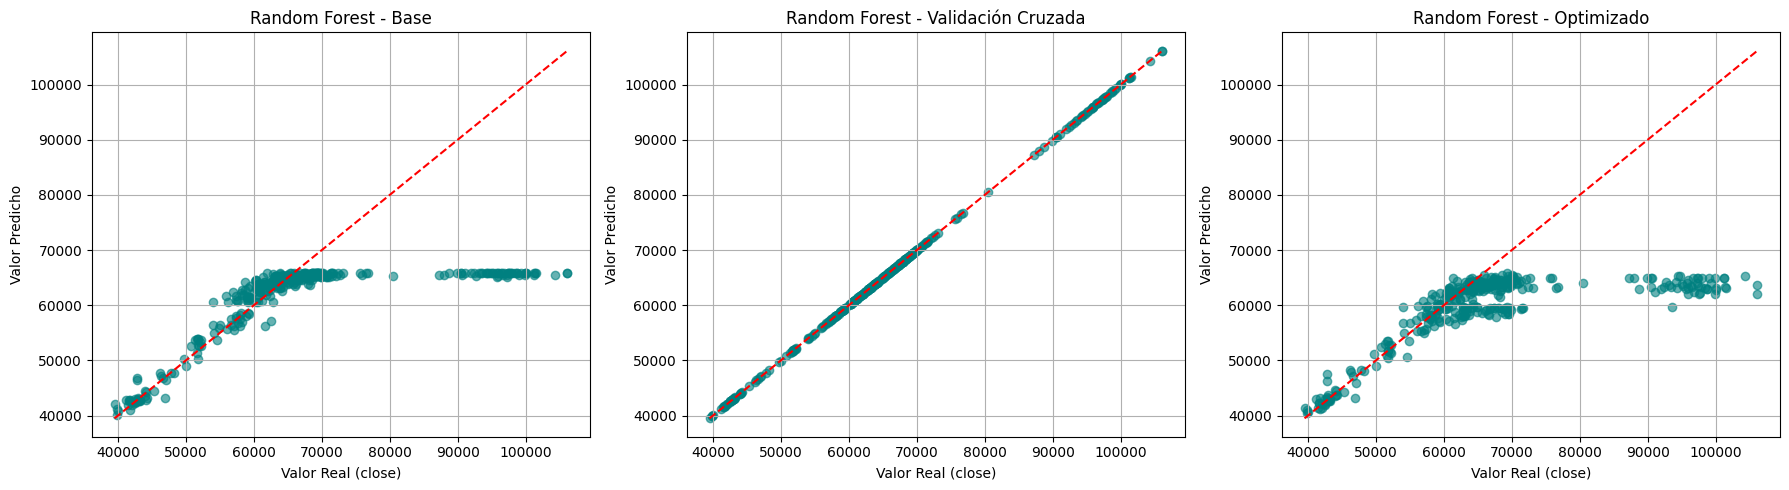

In [162]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

titulos_rf = [
    "Random Forest - Base",
    "Random Forest - Validación Cruzada",
    "Random Forest - Optimizado"
]

predicciones_rf = [
    y_pred_rf_base,
    y_test_rf_cv,       
    y_pred_rf_opt
]

for i in range(3):
    axs[i].scatter(y_test, predicciones_rf[i], alpha=0.6, color="teal")
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[i].set_title(titulos_rf[i])
    axs[i].set_xlabel("Valor Real (close)")
    axs[i].set_ylabel("Valor Predicho")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

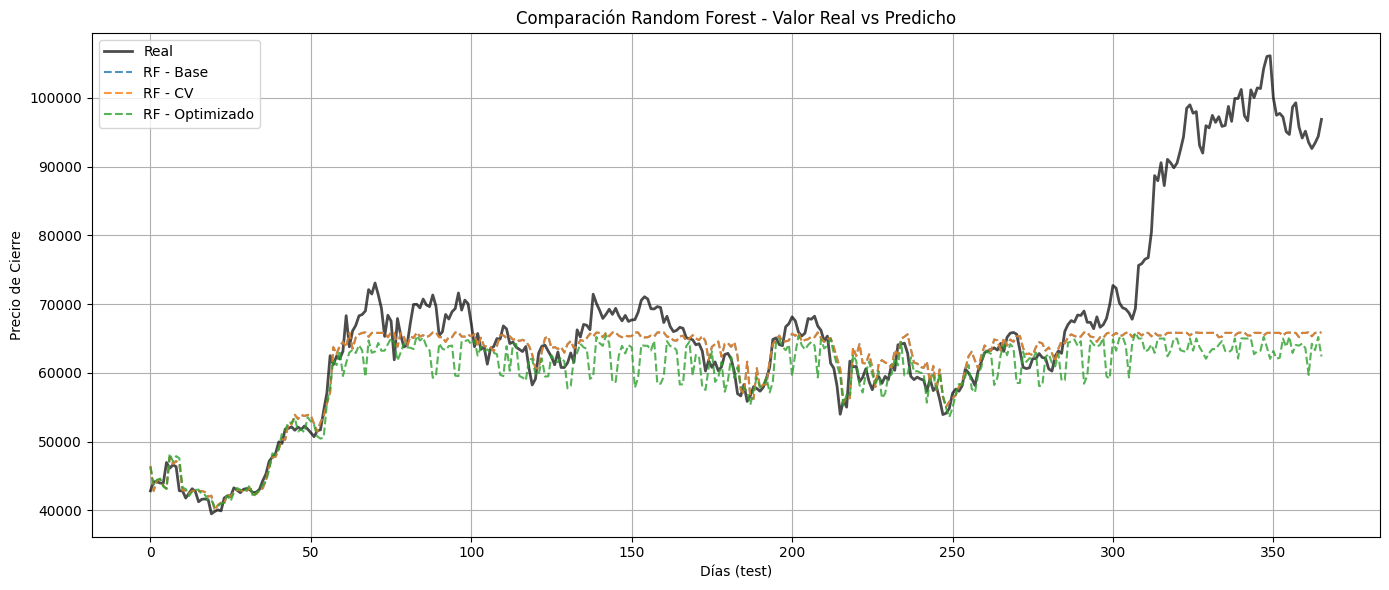

In [165]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Real", color='black', linewidth=2, alpha=0.7)
plt.plot(y_pred_rf_base, label="RF - Base", linestyle='--', alpha=0.8)
plt.plot(y_pred_rf_cv, label="RF - CV", linestyle='--', alpha=0.8)
plt.plot(y_pred_rf_opt, label="RF - Optimizado", linestyle='--', alpha=0.8)

plt.title("Comparación Random Forest - Valor Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Resultados

In [178]:
#preprocesamiento
data_tokens = pd.read_csv("bitcoin-prueba.csv", sep=";")

fechas = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]
for col in fechas:
    data_tokens[col] = pd.to_datetime(data_tokens[col], errors='coerce')

def reemplazar_outliers(df, columnas):
    df = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 3 * IQR
        limite_superior = Q3 + 3 * IQR
        df.loc[df[col] < limite_inferior, col] = Q1
        df.loc[df[col] > limite_superior, col] = Q3
    return df

columnas_outliers = ["open", "high", "low", "close", "volume", "marketCap"]
data_tokens_clean = reemplazar_outliers(data_tokens, columnas_outliers)


In [175]:
data_tokens_clean.head()

timeOpen                        timeClose  \
0 2025-07-03 00:00:00+00:00 2025-07-03 23:59:59.999000+00:00   
1 2025-07-02 00:00:00+00:00 2025-07-02 23:59:59.999000+00:00   
2 2025-07-01 00:00:00+00:00 2025-07-01 23:59:59.999000+00:00   
3 2025-06-30 00:00:00+00:00 2025-06-30 23:59:59.999000+00:00   
4 2025-06-29 00:00:00+00:00 2025-06-29 23:59:59.999000+00:00   

                   timeHigh                   timeLow  name           open  \
0 2025-07-03 13:58:00+00:00 2025-07-03 02:44:00+00:00  2781  108845.012855   
1 2025-07-02 17:25:00+00:00 2025-07-02 01:18:00+00:00  2781  105703.099855   
2 2025-07-01 01:25:00+00:00 2025-07-01 20:02:00+00:00  2781  107144.382644   
3 2025-06-30 01:46:00+00:00 2025-06-30 15:19:00+00:00  2781  108383.441180   
4 2025-06-29 12:01:00+00:00 2025-06-29 02:06:00+00:00  2781  107327.822426   

            high            low          close        volume     marketCap  \
0  110541.461567  108605.795643  109647.978774  5.049474e+10  2.180340e+12   
1  109763.653518  105157.395596  108859.323868  5.624866e+10  2.164564e+12   
2  107550.678694  105270.226604  105698.278144  4.411069e+10  2.102034e+12   
3  108798.791915  106759.650327  107135.334511  4.206480e+10  2.130649e+12   
4  108526.307041  107230.110525  108385.570088  3.553487e+10  2.155240e+12   

                         timestamp  
0 2025-07-03 23:59:59.999000+00:00  
1 2025-07-02 23:59:59.999000+00:00  
2 2025-07-01 23:59:59.999000+00:00  
3 2025-06-30 23:59:59.999000+00:00  
4 2025-06-29 23:59:59.999000+00:00

In [180]:
#entrenamiento en base a ese dataset
btc_data_input = data_tokens_clean[["close", "volume", "marketCap", "timestamp"]].sort_values("timestamp").reset_index(drop=True)

#usar solo el último día como input (como hacíamos con shift(1))
last_row = btc_data_input[["close", "volume", "marketCap"]].iloc[-1:]

dias_pred = 7
predicciones_rangos = {
    "rf_base": [],
    "rf_model_cv": [],
    "rf_optimized": []
}

current_input = last_row.copy()
X_input = current_input.values

for _ in range(dias_pred):
    x_input = current_input.values 

    predicciones_rangos["rf_base"].append(rf_base.predict(x_input)[0])
    predicciones_rangos["rf_model_cv"].append(model_rf_cv.predict(x_input)[0])
    predicciones_rangos["rf_optimized"].append(rf_optimized.predict(x_input)[0])
    #Actualizar el input para el siguiente día con la predicción de 'close' del modelo base
    current_input = current_input.copy()
    current_input["close"] = predicciones_rangos["rf_base"][-1]


ultima_fecha = btc_data_input["timestamp"].max()

fechas_pred = [ultima_fecha + pd.Timedelta(days=i) for i in range(1, dias_pred + 1)]

resultados_futuros_rf = pd.DataFrame({
    "Fecha": fechas_pred,
    "rf_base": predicciones_rangos["rf_base"],
    "rf_model_cv": predicciones_rangos["rf_model_cv"],
    "rf_optimized": predicciones_rangos["rf_optimized"]
})

resultados_futuros_rf


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn

Fecha       rf_base   rf_model_cv  rf_optimized
0 2025-07-04 23:59:59.999000+00:00  65827.257665  65827.257665  63931.782797
1 2025-07-05 23:59:59.999000+00:00  65123.303229  65123.303229  63371.899301
2 2025-07-06 23:59:59.999000+00:00  65288.821086  65288.821086  63516.769014
3 2025-07-07 23:59:59.999000+00:00  65207.088851  65207.088851  63453.808353
4 2025-07-08 23:59:59.999000+00:00  65288.821086  65288.821086  63518.370937
5 2025-07-09 23:59:59.999000+00:00  65207.088851  65207.088851  63453.808353
6 2025-07-10 23:59:59.999000+00:00  65288.821086  65288.821086  63518.370937

### 4.1.6. Aplicando LSTM

In [4]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df = pd.read_csv("data_final.csv", sep=";")

df_btc = df[df["token"] == "Bitcoin"].copy()
df_btc["close"] = pd.to_numeric(df_btc["close"], errors='coerce')
df_btc["volume"] = pd.to_numeric(df_btc["volume"], errors='coerce')
df_btc["marketCap"] = pd.to_numeric(df_btc["marketCap"], errors='coerce')
df_btc["timestamp"] = pd.to_datetime(df_btc["timestamp"], errors='coerce')
df_btc = df_btc.sort_values("timestamp")


In [6]:
lookback = 30  #dias anteriores a considerar

In [13]:
X_full = df_btc[["close", "volume", "marketCap"]].values
y_full = df_btc["close"].values

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

Modelo base de LSTM

In [15]:
#Crear secuencias para LSTM
X_seq = []
y_seq = []

for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_full[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [43]:
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [44]:
#modelo
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(lookback, 3)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_absolute_error')

In [46]:
model_lstm.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 28909.7656 - val_loss: 33297.7422
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26354.1758 - val_loss: 10633.0117
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9253.7061 - val_loss: 4616.0371
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4975.5396 - val_loss: 4249.3037
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4799.4204 - val_loss: 4235.7627
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4949.8789 - val_loss: 3973.7305
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4342.7319 - val_loss: 7048.5459
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4439.3662 - val_loss: 3500.5068
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4109.2656 - val_loss: 3538.2510
Epoch 10/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4125.4888 - val_loss: 4035.4189
Epoch 11/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4182.8677 - val_loss: 4857.2031
Epoc

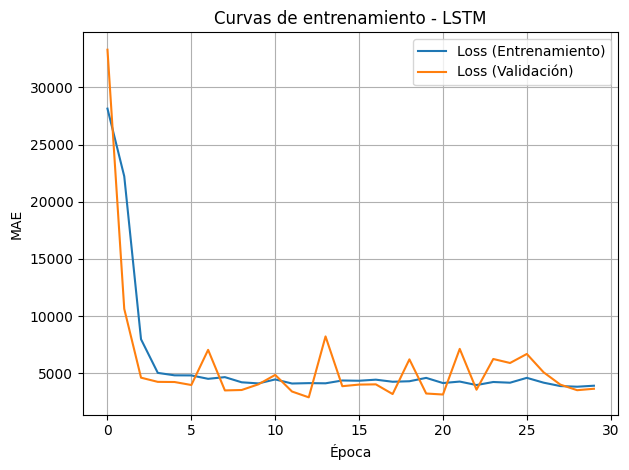

In [48]:
import matplotlib.pyplot as plt

history = model_lstm.history.history 

plt.plot(history["loss"], label="Loss (Entrenamiento)")
plt.plot(history["val_loss"], label="Loss (Validación)")
plt.title("Curvas de entrenamiento - LSTM")
plt.xlabel("Época")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
y_pred_lstm = model_lstm.predict(X_test).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [50]:
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm = r2_score(y_test, y_pred_lstm)


In [51]:
results_lstm = {
    "MAE": mae_lstm,
    "RMSE": rmse_lstm,
    "R^2": r2_lstm
}

results_lstm

{'MAE': 17222.45057439917,
 'RMSE': np.float64(20145.01933696754),
 'R^2': -0.9078537807684324}

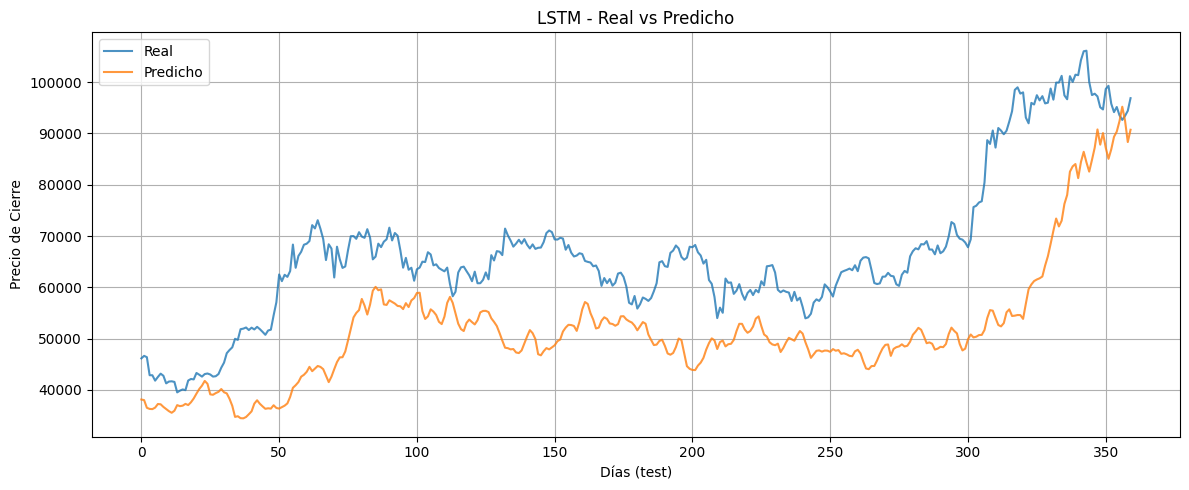

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(y_test, label="Real", alpha=0.8)
plt.plot(y_pred_lstm, label="Predicho", alpha=0.8)
plt.title("LSTM - Real vs Predicho")
plt.xlabel("Días (test)")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

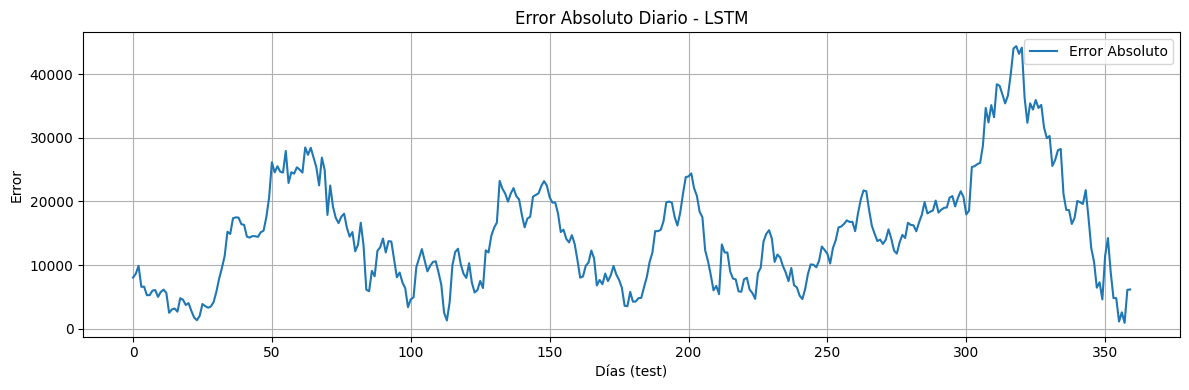

In [29]:
residuos_lstm = y_test - y_pred_lstm
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_lstm), label="Error Absoluto")
plt.title("Error Absoluto Diario - LSTM")
plt.xlabel("Días (test)")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

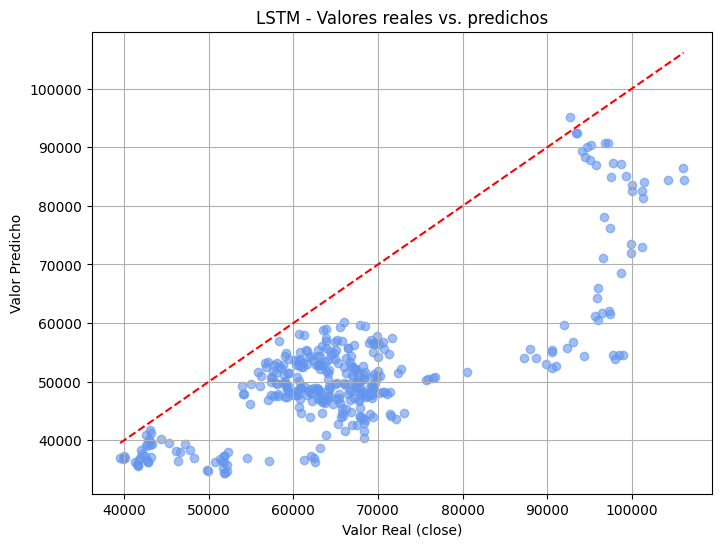

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lstm, color='cornflowerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("LSTM - Valores reales vs. predichos")
plt.xlabel("Valor Real (close)")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.show()

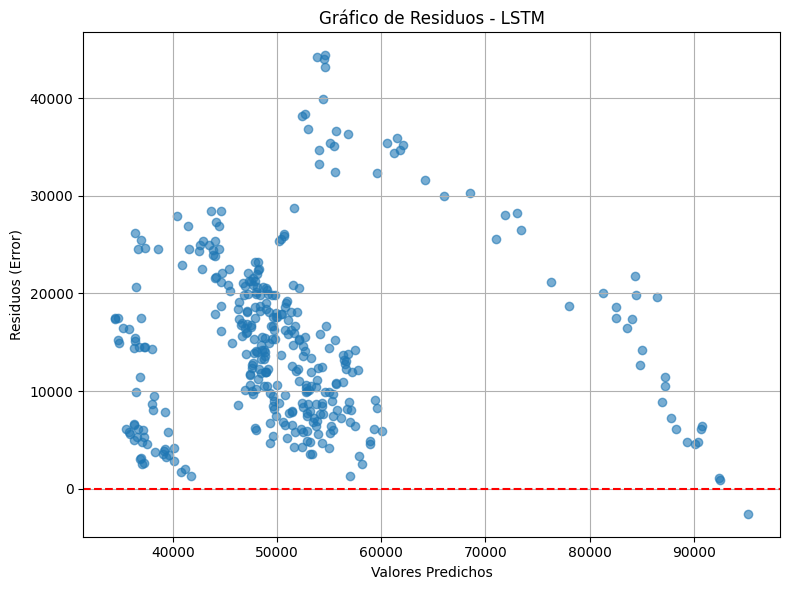

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lstm, residuos_lstm, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Gráfico de Residuos - LSTM")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Error)")
plt.grid(True)
plt.tight_layout()
plt.show()

Modelo de LSTM con optimizacion

### Modelo 1

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [70]:
X_raw = df_btc[["close", "volume", "marketCap"]].values
y_raw = df_btc["close"].values.reshape(-1, 1)

In [71]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw).flatten()

In [72]:
#crear secuencias
lookback = 30
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [73]:
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [75]:
model1 = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0005), input_shape=(lookback, 3))),
    Dropout(0.3),
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    LSTM(32, return_sequences=False, kernel_regularizer=l2(0.0005)),
    Dropout(0.3),
    Dense(1)
])

model1.compile(optimizer=Nadam(learning_rate=0.0005), loss='mae')

In [76]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [83]:
history_model1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0208 - val_loss: 0.0085
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0204 - val_loss: 0.0080
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0204 - val_loss: 0.0174
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0213 - val_loss: 0.0116
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0199 - val_loss: 0.0082
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0208 - val_loss: 0.0076
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0188 - val_loss: 0.0077
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0191 - val_loss: 0.0094
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0200 - val_loss: 0.0084
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0203 - val_loss: 0.0086
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0193 - val_loss: 0.0125
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step

In [84]:
y_pred_scaled = model1.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
residuos_model1 = y_test_real - y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [85]:
results_model1 = {
    "MAE": mean_absolute_error(y_test_real, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test_real, y_pred)),
    "R^2": r2_score(y_test_real, y_pred)
}

results_model1

{'MAE': 4605.255958221184,
 'RMSE': np.float64(6580.697038191319),
 'R^2': 0.7964113773226684}

In [89]:
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
residuos_model1 = y_test_inv - y_pred_inv

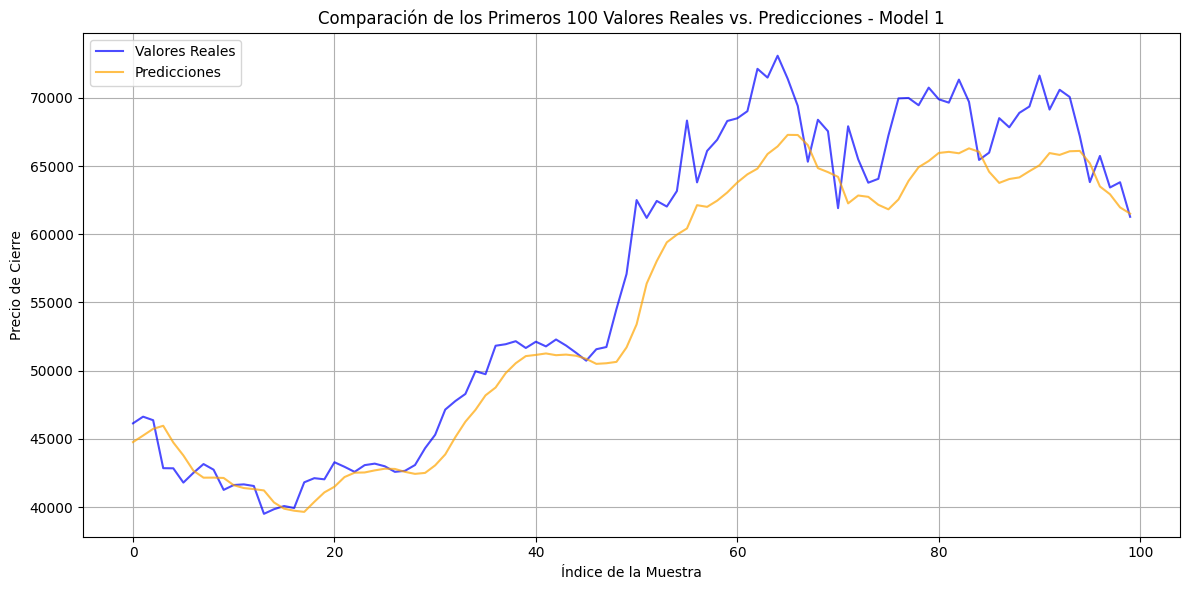

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:100], label="Valores Reales", color="blue", alpha=0.7)
plt.plot(y_pred_inv[:100], label="Predicciones", color="orange", alpha=0.7)
plt.xlabel("Índice de la Muestra")
plt.ylabel("Precio de Cierre")
plt.title("Comparación de los Primeros 100 Valores Reales vs. Predicciones - Model 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

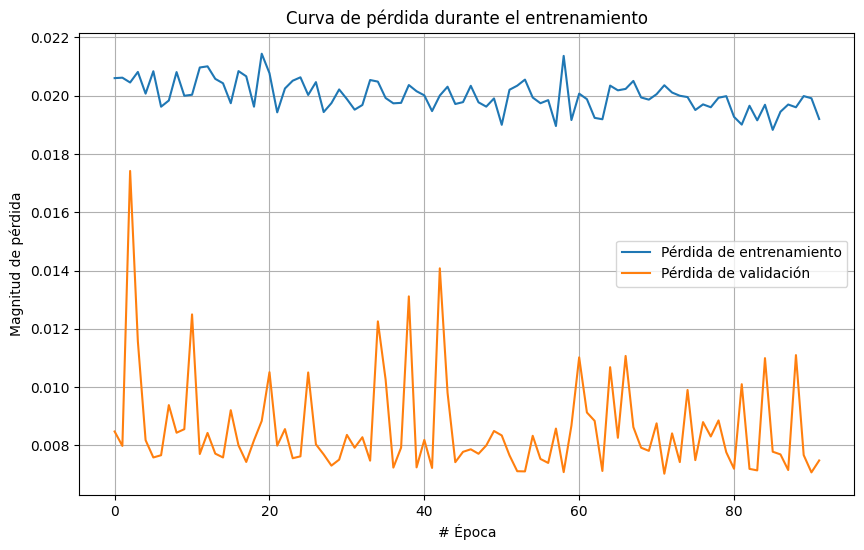

In [96]:
history = history_model1.history

plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Pérdida de entrenamiento')
plt.plot(history['val_loss'], label='Pérdida de validación')
plt.xlabel('# Época')
plt.ylabel('Magnitud de pérdida')
plt.title('Curva de pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

### Modelo 2

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [99]:
X_raw = df_btc[["close", "volume", "marketCap"]].values
y_raw = df_btc["close"].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw).flatten()

In [101]:
lookback = 60
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [102]:
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [103]:
model2 = Sequential([
    BatchNormalization(input_shape=(lookback, 3)),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model2.compile(optimizer=Adam(learning_rate=0.0003), loss='mae')

early_stopping2 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
history_model2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping2],
    verbose=1
)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.1906 - val_loss: 0.1276
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1112 - val_loss: 0.0916
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0847 - val_loss: 0.0533
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0712 - val_loss: 0.0350
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0617 - val_loss: 0.0345
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0538 - val_loss: 0.0330
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0510 - val_loss: 0.0304
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0493 - val_loss: 0.0341
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0508 - val_loss: 0.0297
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0442 - val_loss: 0.0312
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0446 - val_loss: 0.0261
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

In [105]:
y_pred_scaled2 = model2.predict(X_test).flatten()
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2.reshape(-1, 1)).flatten()
y_test_real2 = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
residuos_model2 = y_test_real2 - y_pred2

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [106]:
results_model2 = {
    "MAE": mean_absolute_error(y_test_real2, y_pred2),
    "RMSE": np.sqrt(mean_squared_error(y_test_real2, y_pred2)),
    "R^2": r2_score(y_test_real2, y_pred2)
}

results_model2

{'MAE': 2171.3410027521927,
 'RMSE': np.float64(3074.221105796262),
 'R^2': 0.9545147804808419}

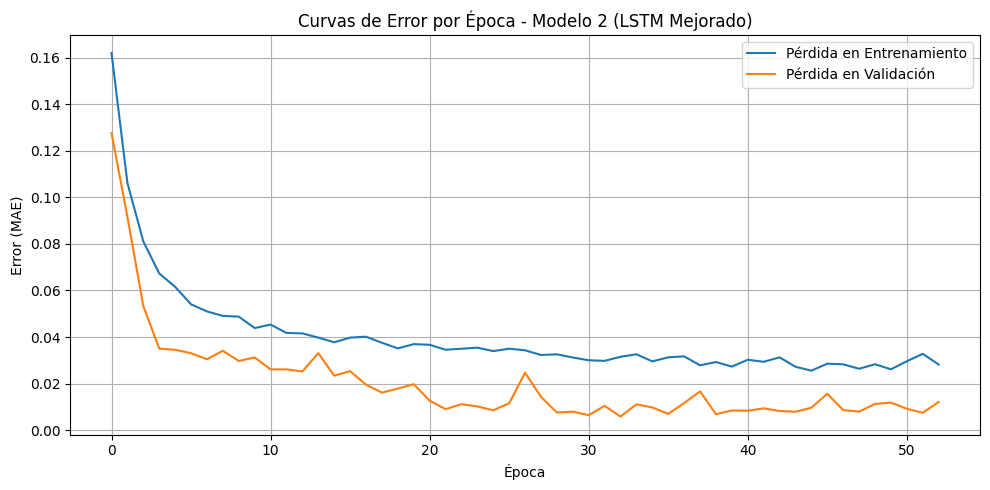

In [107]:
history2 = history_model2.history
plt.figure(figsize=(10, 5))
plt.plot(history2["loss"], label="Pérdida en Entrenamiento")
plt.plot(history2["val_loss"], label="Pérdida en Validación")
plt.title("Curvas de Error por Época - Modelo 2 (LSTM Mejorado)")
plt.xlabel("Época")
plt.ylabel("Error (MAE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

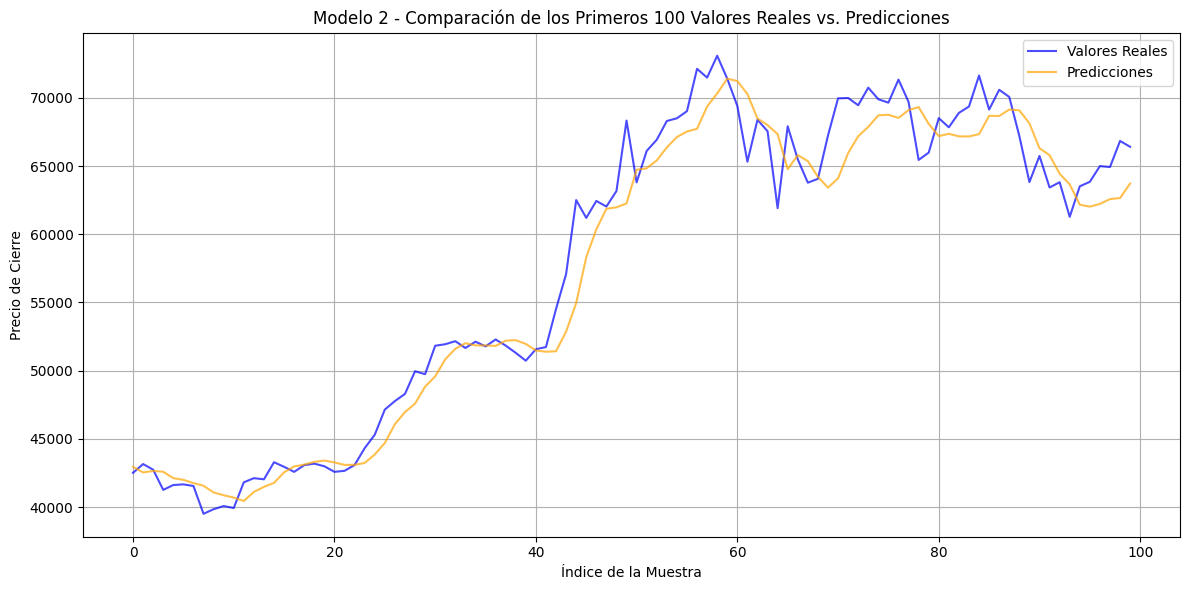

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_real2[:100], label="Valores Reales", color="blue", alpha=0.7)
plt.plot(y_pred2[:100], label="Predicciones", color="orange", alpha=0.7)
plt.xlabel("Índice de la Muestra")
plt.ylabel("Precio de Cierre")
plt.title("Modelo 2 - Comparación de los Primeros 100 Valores Reales vs. Predicciones")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

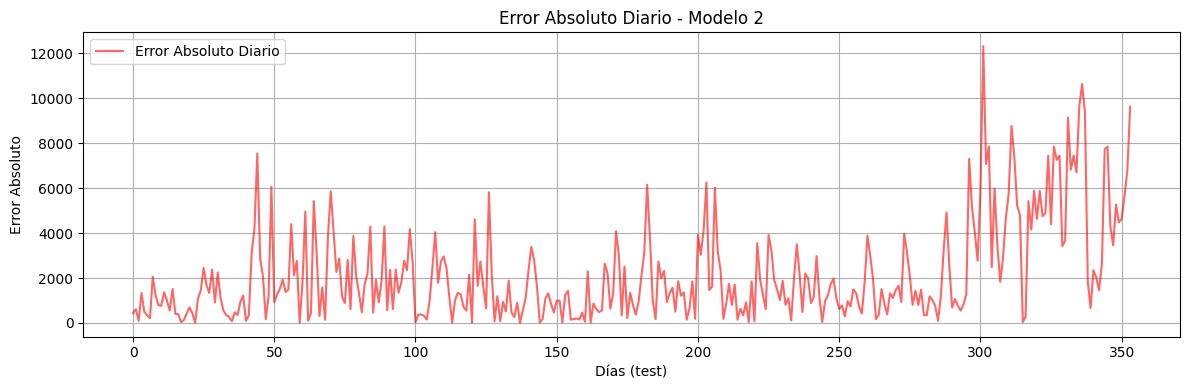

In [109]:
plt.figure(figsize=(12, 4))
plt.plot(np.abs(residuos_model2), label="Error Absoluto Diario", color="red", alpha=0.6)
plt.title("Error Absoluto Diario - Modelo 2")
plt.xlabel("Días (test)")
plt.ylabel("Error Absoluto")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


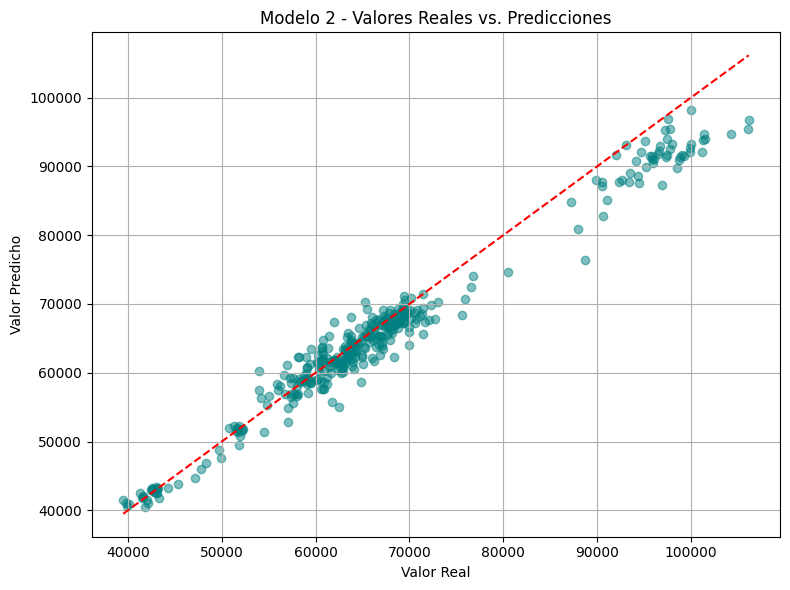

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real2, y_pred2, alpha=0.5, color='teal')
plt.plot([y_test_real2.min(), y_test_real2.max()], [y_test_real2.min(), y_test_real2.max()], 'r--')
plt.title("Modelo 2 - Valores Reales vs. Predicciones")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

### Modelo 3

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [112]:
X_raw = df_btc[["close", "volume", "marketCap"]].values
y_raw = df_btc["close"].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw).flatten()

In [113]:
lookback = 30
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


In [114]:
lookback = 30
X_seq, y_seq = [], []
for i in range(lookback, len(X_scaled)):
    X_seq.append(X_scaled[i - lookback:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)


In [115]:
model3 = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(lookback, 3)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(1)
])

model3.compile(optimizer='adam', loss='mae')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history_model3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1364 - val_loss: 0.0156
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0505 - val_loss: 0.0303
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0452 - val_loss: 0.0138
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0390 - val_loss: 0.0262
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0393 - val_loss: 0.0179
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0368 - val_loss: 0.0143
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0366 - val_loss: 0.0131
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0363 - val_loss: 0.0314
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0353 - val_loss: 0.0123
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0320 - val_loss: 0.0109
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0313 - val_loss: 0.0144
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

In [116]:
y_pred_scaled = model3.predict(X_test).flatten()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

results_model3 = {
    "MAE": mean_absolute_error(y_test_real, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test_real, y_pred)),
    "R^2": r2_score(y_test_real, y_pred)
}

results_model3

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


{'MAE': 3147.319719615625,
 'RMSE': np.float64(4374.085749953827),
 'R^2': 0.9079180132961456}

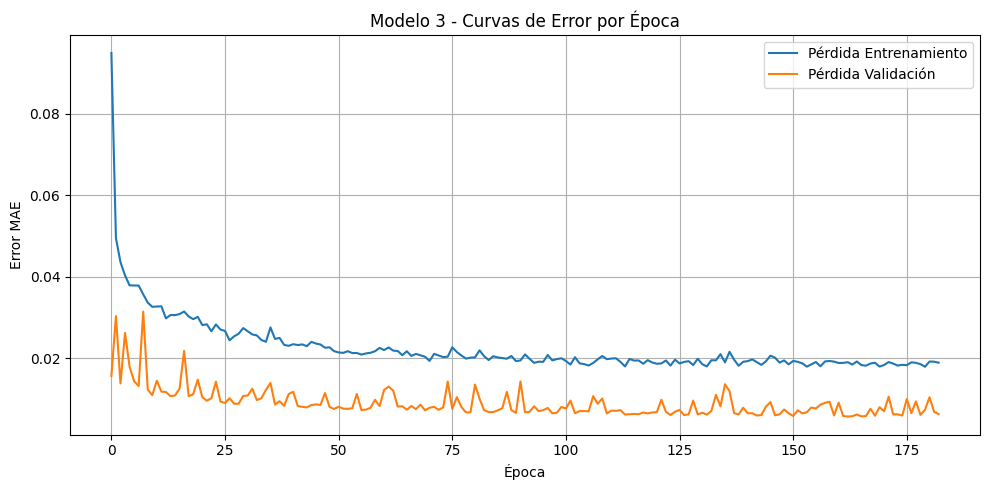

In [117]:
plt.figure(figsize=(10, 5))
plt.plot(history_model3.history["loss"], label="Pérdida Entrenamiento")
plt.plot(history_model3.history["val_loss"], label="Pérdida Validación")
plt.title("Modelo 3 - Curvas de Error por Época")
plt.xlabel("Época")
plt.ylabel("Error MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

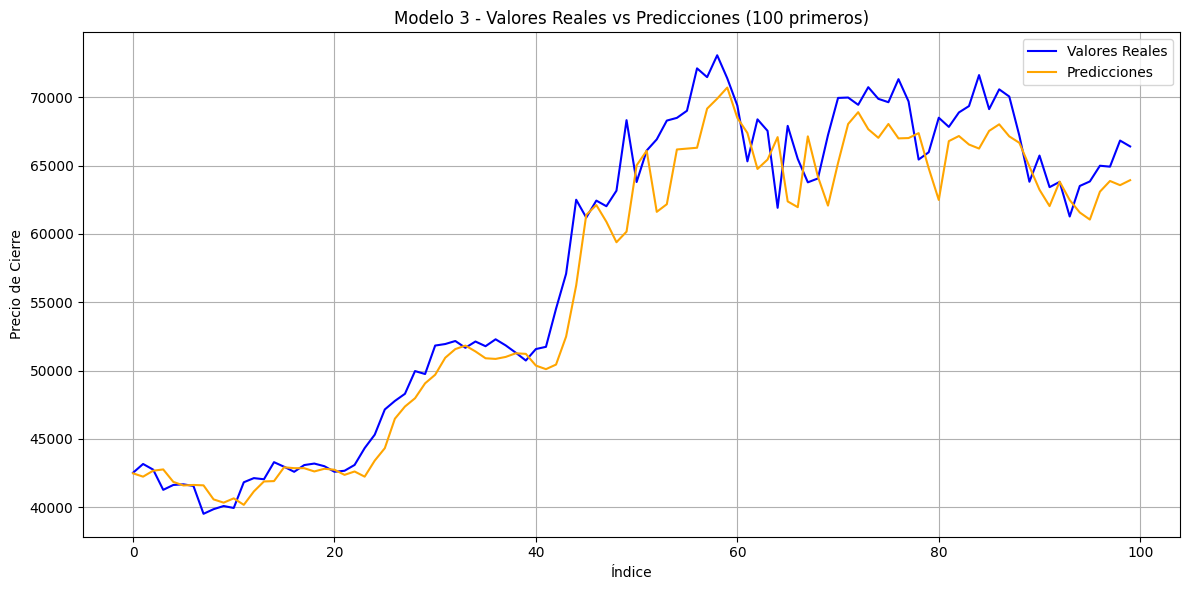

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_real[:100], label="Valores Reales", color="blue")
plt.plot(y_pred[:100], label="Predicciones", color="orange")
plt.title("Modelo 3 - Valores Reales vs Predicciones (100 primeros)")
plt.xlabel("Índice")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Resultados

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

lookbacks = {"model1": 30, "model2": 60, "model3": 30}
modelos = {"model1": model1, "model2": model2, "model3": model3}

input_data = data_model_input[["close", "volume", "marketCap"]].copy().reset_index(drop=True)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_raw = input_data[["close", "volume", "marketCap"]].values
y_raw = input_data["close"].values.reshape(-1, 1)

scaler_X.fit(X_raw)
scaler_y.fit(y_raw)

dias_pred = 7
predicciones_dict = {
    "Día": [f"Día {i+1}" for i in range(dias_pred)],
    "model1": [],
    "model2": [],
    "model3": []
}

for nombre_modelo, modelo in modelos.items():
    lookback = lookbacks[nombre_modelo]
    current_input = input_data[["close", "volume", "marketCap"]].copy()

    #solo si hay suficientes días
    if len(current_input) < lookback:
        predicciones_dict[nombre_modelo] = ["Datos insuficientes"] * dias_pred
        continue

    input_sequence = current_input[-lookback:].copy()

    preds = []
    for _ in range(dias_pred):
        scaled_input = scaler_X.transform(input_sequence)
        X_input = scaled_input.reshape(1, lookback, 3)

        pred_scaled = modelo.predict(X_input)[0][0]
        pred = scaler_y.inverse_transform([[pred_scaled]])[0][0]
        preds.append(pred)

        new_row = pd.DataFrame([[pred, input_sequence["volume"].iloc[-1], input_sequence["marketCap"].iloc[-1]]],
                               columns=["close", "volume", "marketCap"])
        input_sequence = pd.concat([input_sequence.iloc[1:], new_row], ignore_index=True)

    predicciones_dict[nombre_modelo] = preds

df_predicciones = pd.DataFrame(predicciones_dict)
display(df_predicciones)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
c:\Users\Marsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Día         model1         model2         model3
0  Día 1  106756.332127  108255.701061  109377.611060
1  Día 2  106675.175828  108728.450677  109133.467619
2  Día 3  106549.187202  109019.194535  107596.652198
3  Día 4  106409.279388  109191.361472  107189.140892
4  Día 5  106289.251990  109283.142869  106800.957539
5  Día 6  106206.440369  109321.605310  106763.280341
6  Día 7  106155.570255  109325.859487  106951.829793

Luego de evaluar tres arquitecturas diferentes de redes neuronales, seleccionamos el Modelo 2 (LSTM Mejorado) como modelo principal para predecir el precio del Bitcoin.
Este modelo demostró la mayor precisión, con un error promedio significativamente menor (MAE) y un coeficiente de determinación (R²) superior al 95%, lo que significa que puede explicar con alta fidelidad el comportamiento histórico del mercado.

A diferencia de otros modelos evaluados, el Modelo 2 utiliza una ventana de 60 días de datos para realizar sus predicciones. Esto le permite capturar mejor las tendencias de mediano plazo y suavizar la volatilidad, lo que es ideal para decisiones de inversión o análisis financiero.

En conclusión, elegimos el Modelo 2 por su equilibrio entre precisión, estabilidad y robustez frente a fluctuaciones del mercado. Es el que ofrece el mayor valor predictivo para la plataforma.

In [127]:
model2.save("modelo_2_lstm_mejorado.h5")